In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt import dummy_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from scikeras.wrappers import KerasClassifier
from skopt.space import Real, Integer, Categorical

from keras import regularizers
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


import sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam, SGD

In [63]:
def load_data(directory):
    # Load data from CSV files in the specified directory
    data = None
    for csv_file in os.listdir(directory):
        if csv_file.endswith(".csv"):
            file_path = os.path.join(directory, csv_file)
            file_data = pd.read_csv(file_path)
            if data is None:
                data = file_data
            else:
                data = pd.concat([data, file_data], axis=0, ignore_index=True)
    X = data.iloc[:, 0:78]  # Input data (columns 1 to 36)
    info = data.iloc[:,78:-1]  # Additional information
    y = data.iloc[:, -1]  # Labels (last column)
    return X, info, y

def UMA():
    # Directories for UMA training and testing data
    training_directory = r"C:\Users\Vanilson Fula\Desktop\Tese_Soft\Scripts_Datasets\dataset_original\Training\3&1.5\UMA"
    testing_directory = r"C:\Users\Vanilson Fula\Desktop\Tese_Soft\Scripts_Datasets\dataset_original\Testing\3&1.5\UMA"
    # Load UMA training and testing data
    X_train, info_train, y_train = load_data(training_directory)
    X_test, info_test, y_test = load_data(testing_directory)   
    return X_train, info_train, y_train, X_test, info_test, y_test

def WEDA():
    # Directories for WEDA training and testing data
    training_directory = r"C:\Users\Vanilson Fula\Desktop\Tese_Soft\Scripts_Datasets\dataset_original\Training\3&1.5\WEDA"
    testing_directory = r"C:\Users\Vanilson Fula\Desktop\Tese_Soft\Scripts_Datasets\dataset_original\Testing\3&1.5\WEDA"
    # Load WEDA training and testing data
    X_train, info_train, y_train = load_data(training_directory)
    X_test, info_test, y_test = load_data(testing_directory)   
    return X_train, info_train, y_train, X_test, info_test, y_test

def UP():
    # Directories for UP training and testing data
    training_directory = r"C:\Users\Vanilson Fula\Desktop\Tese_Soft\Scripts_Datasets\dataset_original\Training\3&1.5\UP"
    testing_directory = r"C:\Users\Vanilson Fula\Desktop\Tese_Soft\Scripts_Datasets\dataset_original\Testing\3&1.5\UP"
    # Load UP training and testing data
    X_train, info_train, y_train = load_data(training_directory)
    X_test, info_test, y_test = load_data(testing_directory)   
    return X_train, info_train, y_train, X_test, info_test, y_test

# Load UMA dataset
X_train_UMA, info_train_UMA, y_train_UMA, X_test_UMA, info_test_UMA, y_test_UMA = UMA()
# Load WEDA dataset
X_train_WEDA, info_train_WEDA, y_train_WEDA, X_test_WEDA, info_test_WEDA, y_test_WEDA = WEDA()
# Load UP dataset
X_train_UP, info_train_UP, y_train_UP, X_test_UP, info_test_UP, y_test_UP = UP()


In [64]:
# Print the shapes and descriptions of UMA training data
print("UMA Training Data Shapes:")
print("X_train_UMA shape:", X_train_UMA.shape)
print("info_train_UMA shape:", info_train_UMA.shape)
print("y_train_UMA shape:", y_train_UMA.shape)

# Print the shapes and descriptions of UMA testing data
print("UMA Testing Data Shapes:")
print("X_test_UMA shape:", X_test_UMA.shape)
print("info_test_UMA shape:", info_test_UMA.shape)
print("y_test_UMA shape:", y_test_UMA.shape)
print("_______________________________________________")



# Print the shapes and descriptions of WEDA training data
print("WEDA Training Data Shapes:")
print("X_train_WEDA shape:", X_train_WEDA.shape)
print("info_train_WEDA shape:", info_train_WEDA.shape)
print("y_train_WEDA shape:", y_train_WEDA.shape)

# Print the shapes and descriptions of WEDA testing data
print("WEDA Testing Data Shapes:")
print("X_test_WEDA shape:", X_test_WEDA.shape)
print("info_test_WEDA shape:", info_test_WEDA.shape)
print("y_test_WEDA shape:", y_test_WEDA.shape)
print("_______________________________________________")




# Print the shapes and descriptions of UP training data
print("UP Training Data Shapes:")
print("X_train_UP shape:", X_train_UP.shape)
print("info_train_UP shape:", info_train_UP.shape)
print("y_train_UP shape:", y_train_UP.shape)

# Print the shapes and descriptions of UP testing data
print("UP Testing Data Shapes:")
print("X_test_UP shape:", X_test_UP.shape)
print("info_test_UP shape:", info_test_UP.shape)
print("y_test_UP shape:", y_test_UP.shape)
print("_______________________________________________")


UMA Training Data Shapes:
X_train_UMA shape: (3410, 78)
info_train_UMA shape: (3410, 3)
y_train_UMA shape: (3410,)
UMA Testing Data Shapes:
X_test_UMA shape: (1480, 78)
info_test_UMA shape: (1480, 3)
y_test_UMA shape: (1480,)
_______________________________________________
WEDA Training Data Shapes:
X_train_WEDA shape: (4759, 78)
info_train_WEDA shape: (4759, 3)
y_train_WEDA shape: (4759,)
WEDA Testing Data Shapes:
X_test_WEDA shape: (1908, 78)
info_test_WEDA shape: (1908, 3)
y_test_WEDA shape: (1908,)
_______________________________________________
UP Training Data Shapes:
X_train_UP shape: (6914, 78)
info_train_UP shape: (6914, 3)
y_train_UP shape: (6914,)
UP Testing Data Shapes:
X_test_UP shape: (3210, 78)
info_test_UP shape: (3210, 3)
y_test_UP shape: (3210,)
_______________________________________________


In [65]:
# Load training, validation, and testing data
X_train = pd.concat([X_train_UMA, X_train_WEDA, X_train_UP], axis=0, ignore_index=True)
info_train = pd.concat([info_train_UMA, info_train_WEDA, info_train_UP], axis=0, ignore_index=True)
y_train = pd.concat([y_train_UMA, y_train_WEDA, y_train_UP], axis=0, ignore_index=True)
print("Training data shape:")
print("X_train shape:", X_train.shape)
print("info_train shape:", info_train.shape)
print("y_train shape:", y_train.shape)
print("_______________________________________________")


# Load testing data
X_test = pd.concat([X_test_UMA, X_test_WEDA, X_test_UP], axis=0, ignore_index=True)
info_test = pd.concat([info_test_UMA, info_test_WEDA, info_test_UP], axis=0, ignore_index=True)
y_test = pd.concat([y_test_UMA, y_test_WEDA, y_test_UP], axis=0, ignore_index=True)
print("Testing data shape:")
print("X_test shape:", X_test.shape)
print("info_test shape:", info_test.shape)
print("y_test shape:", y_test.shape)
print("_______________________________________________")


Training data shape:
X_train shape: (15083, 78)
info_train shape: (15083, 3)
y_train shape: (15083,)
_______________________________________________
Testing data shape:
X_test shape: (6598, 78)
info_test shape: (6598, 3)
y_test shape: (6598,)
_______________________________________________


In [66]:
print("_________UMA Fall_______________")
# Concatenate UMA training and testing data
X_UMA = pd.concat([X_train_UMA, X_test_UMA], axis=0, ignore_index=True)
info_UMA = pd.concat([info_train_UMA, info_test_UMA], axis=0, ignore_index=True)
y_UMA = pd.concat([y_train_UMA, y_test_UMA], axis=0, ignore_index=True)
complete_data_UMA = pd.concat([X_UMA, info_UMA, y_UMA], axis=1)

# Calculate the total number of elements
total_elements_UMA = len(complete_data_UMA)
# Check the class distribution
class_counts = complete_data_UMA['Tag'].value_counts()
neg, pos = np.bincount(complete_data_UMA['Tag'])
total = neg + pos
# Calculate the percentage of each class
class_percentages = ((class_counts / total_elements_UMA) * 100).round(2).astype(str) + '%'
# Display the total elements and the percentage of each class
print("Total Elements:", total_elements_UMA)
print("Percentage of Each Class:")
print(class_percentages)
print(neg, " Negative Samples, ", pos, " Positive Samples")

print("_________UP Fall_______________")
# Concatenate UP training and testing data
X_UP = pd.concat([X_train_UP, X_test_UP], axis=0, ignore_index=True)
info_UP = pd.concat([info_train_UP, info_test_UP], axis=0, ignore_index=True)
y_UP = pd.concat([y_train_UP, y_test_UP], axis=0, ignore_index=True)
complete_data_UP = pd.concat([X_UP, info_UP, y_UP], axis=1)

# Calculate the total number of elements
total_elements_UP = len(complete_data_UP)
# Check the class distribution
class_counts = complete_data_UP['Tag'].value_counts()
neg, pos = np.bincount(complete_data_UP['Tag'])
total = neg + pos
# Calculate the percentage of each class
class_percentages = ((class_counts / total_elements_UP) * 100).round(2).astype(str) + '%'
# Display the total elements and the percentage of each class
print("Total Elements:", total_elements_UP)
print("Percentage of Each Class:")
print(class_percentages)
print(neg, " Negative Samples, ", pos, " Positive Samples")

print("_________WEDA Fall_______________")
# Concatenate WEDA training and testing data
X_WEDA = pd.concat([X_train_WEDA, X_test_WEDA], axis=0, ignore_index=True)
info_WEDA = pd.concat([info_train_WEDA, info_test_WEDA], axis=0, ignore_index=True)
y_WEDA = pd.concat([y_train_WEDA, y_test_WEDA], axis=0, ignore_index=True)
complete_data_WEDA = pd.concat([X_WEDA, info_WEDA, y_WEDA], axis=1)

# Calculate the total number of elements
total_elements_WEDA = len(complete_data_WEDA)
# Check the class distribution
class_counts = complete_data_WEDA['Tag'].value_counts()
neg, pos = np.bincount(complete_data_WEDA['Tag'])
total = neg + pos
# Calculate the percentage of each class
class_percentages = ((class_counts / total_elements_WEDA) * 100).round(2).astype(str) + '%'
# Display the total elements and the percentage of each class
print("Total Elements:", total_elements_WEDA)
print("Percentage of Each Class:")
print(class_percentages)
print(neg, " Negative Samples, ", pos, " Positive Samples")

print("_________COMBINED_______________")
# Concatenate all training and testing data
X_all = pd.concat([X_train, X_test], axis=0, ignore_index=True)
info_all = pd.concat([info_train, info_test], axis=0, ignore_index=True)
y_all = pd.concat([y_train, y_test], axis=0, ignore_index=True)
complete_data_all = pd.concat([X_all, info_all, y_all], axis=1)

# Calculate the total number of elements
total_elements = len(complete_data_all)
# Check the class distribution
class_counts = complete_data_all['Tag'].value_counts()
neg, pos = np.bincount(complete_data_all['Tag'])
total = neg + pos
# Calculate the percentage of each class
class_percentages = ((class_counts / total_elements) * 100).round(2).astype(str) + '%'
# Display the total elements and the percentage of each class
print("Total Elements:", total_elements)
print("Percentage of Each Class:")
print(class_percentages)
print(neg, " Negative Samples, ", pos, " Positive Samples")


_________UMA Fall_______________
Total Elements: 4890
Percentage of Each Class:
Tag
0    94.42%
1     5.58%
Name: count, dtype: object
4617  Negative Samples,  273  Positive Samples
_________UP Fall_______________
Total Elements: 10124
Percentage of Each Class:
Tag
0    98.35%
1     1.65%
Name: count, dtype: object
9957  Negative Samples,  167  Positive Samples
_________WEDA Fall_______________
Total Elements: 6667
Percentage of Each Class:
Tag
0    91.14%
1     8.86%
Name: count, dtype: object
6076  Negative Samples,  591  Positive Samples
_________COMBINED_______________
Total Elements: 21681
Percentage of Each Class:
Tag
0    95.24%
1     4.76%
Name: count, dtype: object
20650  Negative Samples,  1031  Positive Samples


# # funtions

In [67]:
def split_train_test_data(data, train_percent, test_percent):
    groups = {}
    for index, row in data.iterrows():
        subject = f"Subject{row['Subject']}"
        activity = f"Activity{row['Activity']}"
        group_key = f"{subject}_{activity}"

        if group_key not in groups:
            groups[group_key] = []

        groups[group_key].append(index)  # Store the row index instead of the CSV file

    shuffled_groups = list(groups.keys())
    random.shuffle(shuffled_groups)

    total_groups = len(shuffled_groups)
    total_training = int(total_groups * train_percent)
    total_test = total_groups - total_training

    sets = {
        'training': shuffled_groups[:total_training],
        'testing': shuffled_groups[total_training:]
    }

    # Create training and testing datasets based on the indices
    training_indices = [index for group in sets['training'] for index in groups[group]]
    testing_indices = [index for group in sets['testing'] for index in groups[group]]

    training_data = data.loc[training_indices]
    testing_data = data.loc[testing_indices]

    return training_data, testing_data

METRICS = [
      keras.metrics.BinaryCrossentropy(name='Cross Entropy'),  
      keras.metrics.MeanSquaredError(name='Brier Score'),
      keras.metrics.TruePositives(name='TP'),
      keras.metrics.FalsePositives(name='FP'),
      keras.metrics.TrueNegatives(name='TN'),
      keras.metrics.FalseNegatives(name='FN'), 
      keras.metrics.BinaryAccuracy(name='Accuracy'),
      keras.metrics.Precision(name='Precision'),
      keras.metrics.Recall(name='Recall'),
      keras.metrics.AUC(name='AUC'),
      keras.metrics.AUC(name='PRC', curve='PR'), 
]

# Function to plot metrics
def plot_metrics(history):
    metrics = ['loss', 'PRC', 'Precision', 'Recall']
    plt.figure(figsize=(12, 8))  
    for n, metric in enumerate(metrics):
        name = metric.replace("_", " ").capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.epoch, history.history[metric], label='Training')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'AUC':
            plt.ylim([0.8, 1])
        else:
            plt.ylim([0, 1])
        plt.legend()

    plt.show()


# # Feature selection

In [70]:
def feature_selection(dataset, X_train, info_train, y_train, X_test, info_test, y_test):
    # Combine all datasets into a single DataFrame
    X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
    info = pd.concat([info_train, info_test], axis=0, ignore_index=True)
    y = pd.concat([y_train, y_test], axis=0, ignore_index=True)
    complete_data = pd.concat([X, info, y], axis=1)

    # Create the Extra Trees model with 'class_weight' configuration to handle imbalanced data
    extra_trees_model = ExtraTreesClassifier(n_estimators=250, random_state=0, class_weight='balanced')
    # Train the model with the training data
    extra_trees_model.fit(X, y)
    # Get feature importances after training
    importances_extra_trees = extra_trees_model.feature_importances_
    # Get indices of the most important features
    indices_extra_trees = np.argsort(importances_extra_trees)[::-1]
    # Get the ranking of the most important features (the index is the ranking)
    ranking_extra_trees = indices_extra_trees 
    
    # Create the RFE model
    rfe_decision_tree_model = RFE(estimator=DecisionTreeClassifier(class_weight='balanced'), n_features_to_select=1)
    # Train the model with the training data
    rfe_decision_tree_model.fit(X, y)
    # Get the ranking of features selected by RFE
    ranking_rfe_decision_tree = rfe_decision_tree_model.ranking_
    
    # Create the L2 LinearSVC model
    l2_linearsvc_model = LinearSVC(C=1.00, penalty="l2", dual=False, class_weight='balanced')
    # Train the model with the training data
    l2_linearsvc_model.fit(X, y)
    # Get feature importances for each model based on coefficients
    importances_l2_linearsvc = np.abs(l2_linearsvc_model.coef_)
    # Compute an importance mean for each feature
    mean_importance = np.mean(importances_l2_linearsvc, axis=0)
    # Get indices of the most important features
    important_feature_indices = np.argsort(mean_importance)[::-1]
    # Create ranking of the most important features (the indices are the ranking)
    ranking_important_features = important_feature_indices 

    # Get indices of selected features in each model
    extra_trees_indices = set(ranking_rfe_decision_tree[:30])
    rfe_decision_tree_indices = set(np.where(ranking_rfe_decision_tree > (X_train.shape[1] - 30))[0])
    l2_linearsvc_indices = set(ranking_important_features[:30])

    # Find features that appear in at least two out of three models
    common_features = list(
        extra_trees_indices.intersection(rfe_decision_tree_indices).union(
            extra_trees_indices.intersection(l2_linearsvc_indices)
        ).union(
            rfe_decision_tree_indices.intersection(l2_linearsvc_indices)
        )
    )

    # Print names of common features on separate lines
    n = 0
    print("\nNames of features that appear in at least two out of three models:")
    selected_features = [complete_data.columns[i] for i in common_features]
    for feature in selected_features:
        print(feature)
        n = n + 1
    print("\nNumber of features that appear in at least two out of three models:", n)
    
    # List of selected features
    selected_features = selected_features[:28]  # Select the top 28 features

    # List to store accuracy as a function of the number of selected features
    accuracy_per_number_of_features = []

    for num_features in range(1, len(selected_features) + 1):
        # Select the first 'num_features' features from the list
        features_subset = selected_features[:num_features]

        # Create a copy of the data with the selected features
        X_temp = X[features_subset]

        # Split the data into training and testing sets
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.2, random_state=0)

        # Train a model (e.g., Random Forest) with the temporary data
        model_temp = RandomForestClassifier(n_estimators=250, random_state=0, class_weight='balanced')
        model_temp.fit(X_train_temp, y_train_temp)

        # Make predictions and calculate accuracy
        y_pred_temp = model_temp.predict(X_test_temp)
        accuracy_temp = accuracy_score(y_test_temp, y_pred_temp)

        # Store the current accuracy
        accuracy_per_number_of_features.append(accuracy_temp)

    # Create a plot of accuracy as a function of the number of selected features
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(selected_features) + 1), accuracy_per_number_of_features)
    plt.xlabel('Número de Features Selecionadas')
    plt.ylabel('Acurácia')
    plt.title('Acurácia em Função do Número de Features Selecionadas')
    plt.grid(True)
    plt.show()

    x_train = X_train[selected_features]
    lim = x_train.shape[1]
    x_test = X_test[selected_features]
    X_test.shape, x_test.shape
    print("Train and test set shape")
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    print("Selected Features")
    print("**************** " + dataset + " ****************")
    
    return selected_features


Names of features that appear in at least two out of three models:
Accelerometer: x-axis (g)Mean
Gyroscope: z-axis (rad/s)Mean
Gyroscope: z-axis (rad/s)StandardDeviation
Accelerometer: x-axis (g)MaximalAmplitude
Accelerometer: x-axis (g)StandardDeviation
Gyroscope: z-axis (rad/s)MinimalAmplitude
Accelerometer: x-axis (g)MinimalAmplitude
Accelerometer: x-axis (g)Median
Gyroscope: z-axis (rad/s)MaximalAmplitude
Accelerometer: x-axis (g)First Quartile
Accelerometer: x-axis (g)RootMeanSquare
Accelerometer: y-axis (g)MaximalAmplitude
Accelerometer: y-axis (g)MinimalAmplitude
Accelerometer: y-axis (g)Median
Accelerometer: y-axis (g)Kurtosis
Accelerometer: z-axis (g)Mean
Accelerometer: z-axis (g)StandardDeviation
Accelerometer: z-axis (g)MinimalAmplitude
Accelerometer: z-axis (g)Autocorrelation
Accelerometer: z-axis (g)Energy
Gyroscope: x-axis (rad/s)StandardDeviation
Gyroscope: x-axis (rad/s)Autocorrelation
Gyroscope: y-axis (rad/s)Mean
Gyroscope: y-axis (rad/s)MaximalAmplitude
Gyroscope: y

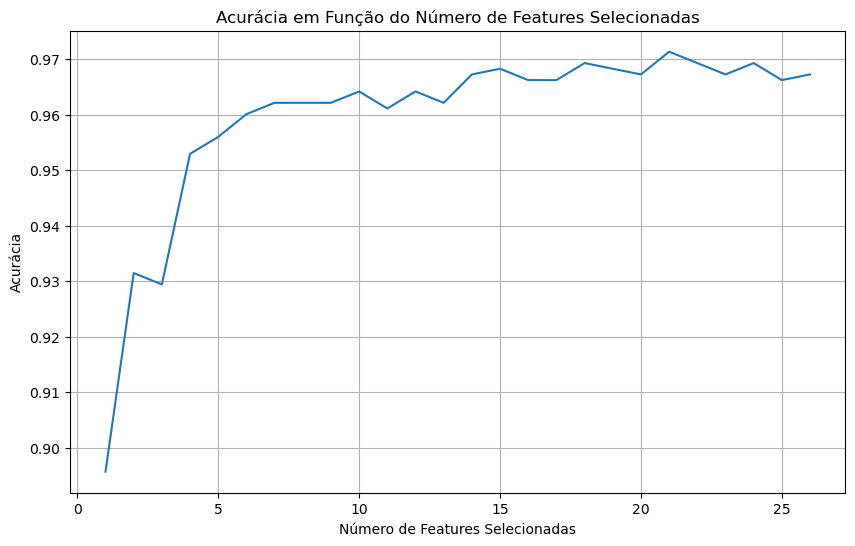

Train and test set shape
(3410, 26) (1480, 26) (3410,) (1480,)
Selected Features
**************** UMA Fall ****************


In [71]:
features_UMA = feature_selection("UMA Fall", X_train_UMA, info_train_UMA, 
                                 y_train_UMA, X_test_UMA, info_test_UMA, y_test_UMA)

In [72]:
X_train_UMA = X_train_UMA[features_UMA]
beta = X_train_UMA.shape[1]
print(beta)

X_test_UMA = X_test_UMA[features_UMA]
print("Forma conjunto de treino e de teste")
print(X_train_UMA.shape, X_test_UMA.shape, y_train_UMA.shape, y_test_UMA.shape)

26
Forma conjunto de treino e de teste
(3410, 26) (1480, 26) (3410,) (1480,)


In [9]:
X_train_UMA = X_train_UMA[features_UMA]
beta = X_train_UMA.shape[1]
print(beta)

X_test_UMA = X_test_UMA[features_UMA]
print("Forma conjunto de treino e de teste")
print(X_train_UMA.shape, X_test_UMA.shape, y_train_UMA.shape, y_test_UMA.shape)

26
Forma conjunto de treino e de teste
(3410, 26) (3210, 26) (3410,) (3210,)



Names of features that appear in at least two out of three models:
Accelerometer: x-axis (g)StandardDeviation
Accelerometer: x-axis (g)RootMeanSquare
Accelerometer: x-axis (g)MaximalAmplitude
Gyroscope: z-axis (rad/s)RootMeanSquare
Gyroscope: z-axis (rad/s)StandardDeviation
Accelerometer: x-axis (g)Median
Gyroscope: z-axis (rad/s)MinimalAmplitude
Gyroscope: z-axis (rad/s)Skewness
Accelerometer: x-axis (g)Autocorrelation
Accelerometer: y-axis (g)Mean
Accelerometer: y-axis (g)RootMeanSquare
Accelerometer: y-axis (g)MaximalAmplitude
Accelerometer: y-axis (g)MinimalAmplitude
Accelerometer: y-axis (g)First Quartile
Accelerometer: y-axis (g)Third Quartile
Accelerometer: y-axis (g)Autocorrelation
Accelerometer: z-axis (g)StandardDeviation
Accelerometer: z-axis (g)MaximalAmplitude
Accelerometer: z-axis (g)Median
Accelerometer: z-axis (g)Kurtosis
Gyroscope: x-axis (rad/s)Mean
Gyroscope: x-axis (rad/s)RootMeanSquare
Gyroscope: x-axis (rad/s)MinimalAmplitude
Gyroscope: x-axis (rad/s)Skewness
Gyr

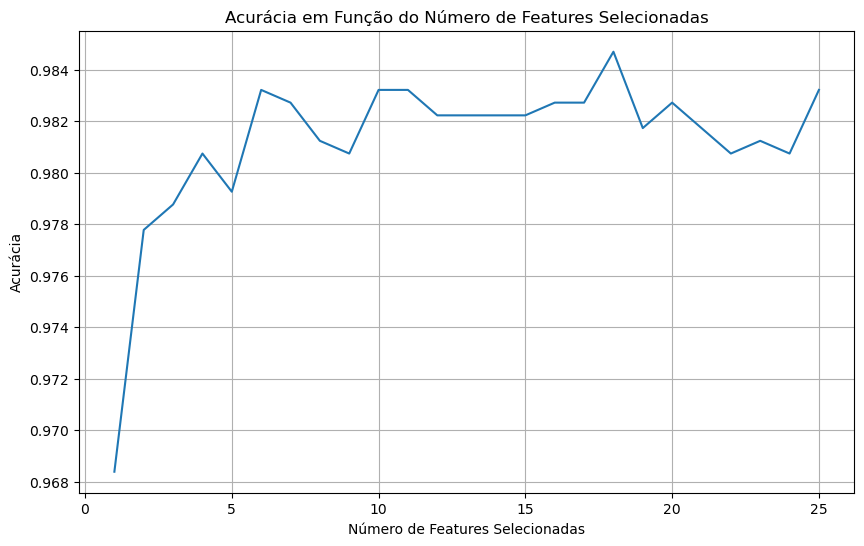

Train and test set shape
(6914, 25) (3210, 25) (6914,) (3210,)
Selected Features
**************** UP Fall ****************


In [10]:
features_UP = feature_selection("UP Fall", X_train_UP, info_train_UP, 
                                y_train_UP, X_test_UP, info_test_UP, y_test_UP)

In [11]:
X_train_UP = X_train_UP[features_UP]
beta = X_train_UP.shape[1]
print(beta)

X_test_UP = X_test_UP[features_UP]
print("Forma conjunto de treino e de teste")
print(X_train_UP.shape, X_test_UP.shape, y_train_UP.shape, y_test_UP.shape)

25
Forma conjunto de treino e de teste
(6914, 25) (3210, 25) (6914,) (3210,)



Names of features that appear in at least two out of three models:
Accelerometer: x-axis (g)Mean
Accelerometer: x-axis (g)StandardDeviation
Accelerometer: x-axis (g)RootMeanSquare
Gyroscope: z-axis (rad/s)StandardDeviation
Gyroscope: z-axis (rad/s)Mean
Gyroscope: z-axis (rad/s)MaximalAmplitude
Gyroscope: z-axis (rad/s)Median
Gyroscope: z-axis (rad/s)Skewness
Accelerometer: x-axis (g)Third Quartile
Accelerometer: y-axis (g)StandardDeviation
Accelerometer: y-axis (g)MaximalAmplitude
Accelerometer: y-axis (g)Median
Accelerometer: y-axis (g)First Quartile
Accelerometer: y-axis (g)Third Quartile
Accelerometer: z-axis (g)Mean
Accelerometer: z-axis (g)StandardDeviation
Accelerometer: z-axis (g)MaximalAmplitude
Gyroscope: x-axis (rad/s)RootMeanSquare
Gyroscope: x-axis (rad/s)MaximalAmplitude
Gyroscope: x-axis (rad/s)MinimalAmplitude
Gyroscope: x-axis (rad/s)Median
Gyroscope: x-axis (rad/s)First Quartile
Gyroscope: y-axis (rad/s)Third Quartile

Number of features that appear in at least two ou

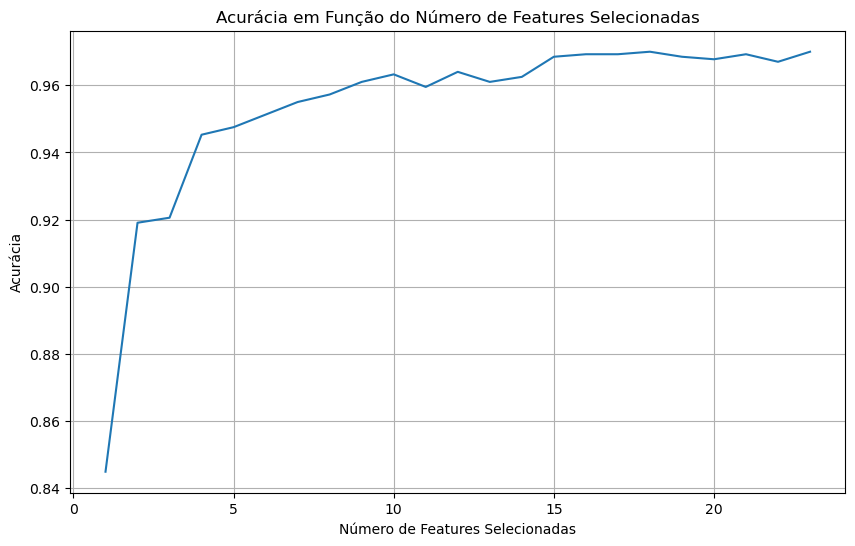

Train and test set shape
(4759, 23) (1908, 23) (4759,) (1908,)
Selected Features
**************** WEDA Fall ****************


In [12]:
features_WEDA = feature_selection("WEDA Fall", X_train_WEDA, info_train_WEDA,
                                  y_train_WEDA, X_test_WEDA, info_test_WEDA, y_test_WEDA)

In [13]:
X_train_WEDA = X_train_WEDA[features_WEDA]
beta = X_train_WEDA.shape[1]
print(beta)

X_test_WEDA = X_test_WEDA[features_WEDA]
print("Forma conjunto de treino e de teste")
print(X_train_WEDA.shape, X_test_WEDA.shape, y_train_WEDA.shape, y_test_WEDA.shape)

23
Forma conjunto de treino e de teste
(4759, 23) (1908, 23) (4759,) (1908,)



Names of features that appear in at least two out of three models:
Accelerometer: x-axis (g)StandardDeviation
Accelerometer: x-axis (g)RootMeanSquare
Gyroscope: z-axis (rad/s)RootMeanSquare
Accelerometer: x-axis (g)MaximalAmplitude
Accelerometer: x-axis (g)Median
Gyroscope: z-axis (rad/s)MinimalAmplitude
Gyroscope: z-axis (rad/s)MaximalAmplitude
Gyroscope: z-axis (rad/s)Kurtosis
Gyroscope: z-axis (rad/s)First Quartile
Accelerometer: x-axis (g)First Quartile
Accelerometer: y-axis (g)Mean
Accelerometer: y-axis (g)StandardDeviation
Accelerometer: y-axis (g)RootMeanSquare
Accelerometer: y-axis (g)MinimalAmplitude
Accelerometer: y-axis (g)Number of zero-crossing
Accelerometer: y-axis (g)First Quartile
Accelerometer: y-axis (g)Third Quartile
Accelerometer: z-axis (g)Mean
Accelerometer: z-axis (g)RootMeanSquare
Gyroscope: x-axis (rad/s)Mean
Gyroscope: x-axis (rad/s)StandardDeviation
Gyroscope: x-axis (rad/s)MinimalAmplitude
Gyroscope: x-axis (rad/s)Skewness
Gyroscope: y-axis (rad/s)StandardD

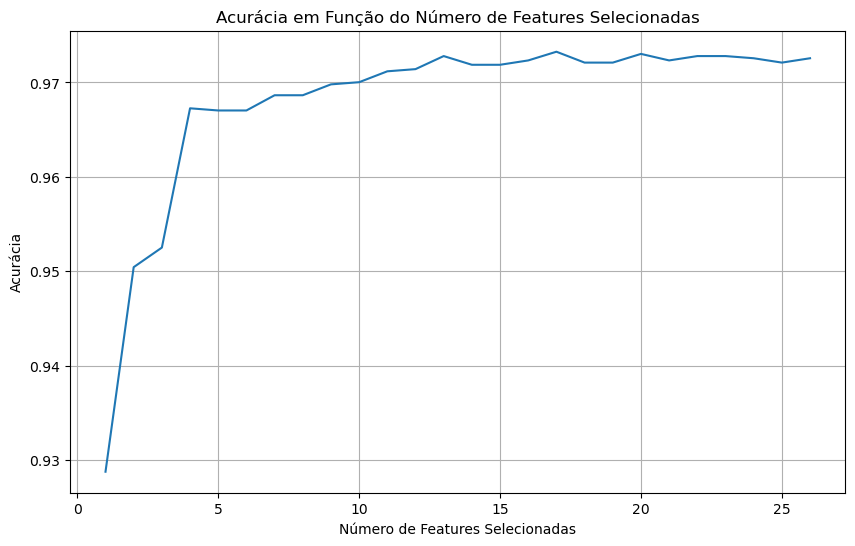

Train and test set shape
(15083, 26) (6598, 26) (15083,) (6598,)
Selected Features
**************** COMBINADO Fall ****************


In [73]:
combined_features = feature_selection("COMBINADO Fall", X_train, info_train,
                                  y_train, X_test, info_test, y_test)

In [74]:
X_train = X_train[combined_features]
beta = X_train.shape[1]
print(beta)

X_test = X_test[combined_features]
print("Forma conjunto de treino e de teste")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

26
Forma conjunto de treino e de teste
(15083, 26) (6598, 26) (15083,) (6598,)


In [15]:
X_train = X_train[combined_features]
beta = X_train.shape[1]
print(beta)

X_test = X_test[combined_features]
print("Forma conjunto de treino e de teste")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

28
Forma conjunto de treino e de teste
(15083, 28) (8328, 28) (15083,) (8328,)


# # Best parameters

In [16]:
def best_parameter(X_train, info_train, y_train, X_test, info_test, y_test):
        
        # Combine all datasets into a single DataFrame
        X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
        info = pd.concat([info_train, info_test], axis=0, ignore_index=True)
        y = pd.concat([y_train, y_test], axis=0, ignore_index=True)
        complete_data = pd.concat([X, info, y], axis=1)

        print("___________________________________________ SVM ______________________________________")
        # SVM

        # Define the evaluation function for SVM
        def evaluate_svm_model(params):
            C, kernel, degree = params    
            model = SVC(C=C, kernel=kernel, degree=degree, class_weight='balanced', random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            # Maximize ROC
            roc = roc_auc_score(y_test, y_pred)

            return -roc

        # Define the search space for SVM hyperparameters
        space = [
                Real(1e-6, 1e3, 'log-uniform'),  # Regularization parameter C
                Categorical(['poly', 'rbf']),  # Kernel
                Integer(2, 4)]  # Degree for polynomial kernel

        
        result_svm = gp_minimize(evaluate_svm_model, space, n_calls=50, n_random_starts=10, verbose=0, random_state=42)

        # Display results
        best_params = dict(zip(['C', 'kernel', 'degree', 'gamma'], result_svm.x))
        best_score = -result_svm.fun
        
        print("Best AUC-ROC Score:", best_score)
        print("Best Parameters:", best_params)
        
        
        
        
        print("__________________________________________ ANN ____________________________________________________")
        # ANN
        # Calculate the total number of elements
        total_elements = len(complete_data)
        # Check the class distribution
        class_counts = complete_data['Tag'].value_counts()
        neg, pos = np.bincount(complete_data['Tag'])
        total = neg + pos
        # Calculate the percentage of each class
        class_percentages = ((class_counts / total_elements) * 100).round(2).astype(str) + '%'
        # Display the total number of elements and the percentage of each class
        print("Total Elements:", total_elements)
        print("Percentage of Each Class:")
        print(class_percentages )

        # Class distribution in each data set
        print(f'Average class probability in training set:   {y_train.mean():.4f}')
        print(f'Average class probability in test set:       {y_test.mean():.4f}')

        # Calculation of balanced class weights
        weight_for_0 = (1 / neg) * (total / 2.0)
        weight_for_1 = (1 / pos) * (total / 2.0)
        class_weight = {0: weight_for_0, 1: weight_for_1}

        print('Weight for class 0: {:.2f}'.format(weight_for_0))
        print('Weight for class 1: {:.2f}'.format(weight_for_1))

        # Create the model with initialized output bias
        initial_bias = np.log([pos/neg])
        initial_bias

        print("Train and Test Set Shape")
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        
        def evaluate_keras_model(params):
            learning_rate, num_neurons, dropout_rate, activation, optimizer, epochs, batch_size, l2_reg = params

            # Build the Keras model with the provided parameters
            model = Sequential()
            model.add(Dense(num_neurons, input_shape=(X_train.shape[1],), activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
            model.add(Dropout(dropout_rate))
            model.add(Dense(1, activation='sigmoid'))

            # Compile the model
            if optimizer == 'adam':
                optimizer_obj = Adam(learning_rate=learning_rate)
            elif optimizer == 'SGD':
                optimizer_obj = SGD(learning_rate=learning_rate, momentum=0.9)  # If desired, you can adjust the value of momentum

            model.compile(optimizer=optimizer_obj, loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            y_pred = model.predict(X_test)
            roc_auc = roc_auc_score(y_test, y_pred)

            # Return the metric you want to optimize (e.g., -roc_auc to maximize the roc_auc_score)
            return -roc_auc

        # Define the search space for hyperparameters
        space = [(1e-4, 1e-1, 'log-uniform'),  # Learning rate
                 (64, 256),                     # Number of neurons in the hidden layer
                 (0.0, 0.5),                    # Dropout rate
                 ['relu'],                      # Activation function
                 ['adam', 'SGD'],               # Optimizer
                 (40, 600),                     # Epochs
                 (32, 512),                     # Batch size
                 (1e-6, 1e-2, 'log-uniform')]   # L2 regularization

        # Perform optimization
        result = gp_minimize(evaluate_keras_model, space, n_calls=50, n_random_starts=10, verbose=0, random_state=42)

        # Display results
        best_params = dict(zip(['learning_rate', 'num_neurons', 'dropout_rate', 'activation', 'optimizer', 'epochs', 'batch_size', 'l2_reg'], result.x))
        best_f1_score = -result.fun
        
        print("Best AUC-ROC Score:", best_f1_score)
        print("Best Parameters:", best_params)
        
        return


### UP

In [17]:
best_parameter(X_train_UP, info_train_UP, y_train_UP, X_test_UP, info_test_UP, y_test_UP)

___________________________________________ SVM ______________________________________
Best AUC-ROC Score: 0.9284431770173215
Best Parameters: {'C': 0.75991968405656, 'kernel': 'rbf', 'degree': 2}
__________________________________________ ANN ____________________________________________________
Total Elements: 10124
Percentage of Each Class:
Tag
0    98.35%
1     1.65%
Name: count, dtype: object
Average class probability in training set:   0.0163
Average class probability in test set:       0.0168
Weight for class 0: 0.51
Weight for class 1: 30.31
Train and Test Set Shape
(6914, 25) (3210, 25) (6914,) (3210,)
101/101 [==============================] - 0s 2ms/step
Best AUC-ROC Score: 0.9780195277660424
Best Parameters: {'learning_rate': 0.0011141583700686006, 'num_neurons': 64, 'dropout_rate': 0.0, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 40, 'batch_size': 32, 'l2_reg': 1.0470595636120626e-05}


### UMA

In [75]:
best_parameter(X_train_UMA, info_train_UMA, y_train_UMA, X_test_UMA, info_test_UMA, y_test_UMA)

___________________________________________ SVM ______________________________________


C:\Users\Vanilson Fula\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Vanilson Fula\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Vanilson Fula\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Vanilson Fula\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Vanilson Fula\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The object

Best AUC-ROC Score: 0.8463687150837989
Best Parameters: {'C': 233.6201393458022, 'kernel': 'rbf', 'degree': 4}
__________________________________________ ANN ____________________________________________________
Total Elements: 4890
Percentage of Each Class:
Tag
0    94.42%
1     5.58%
Name: count, dtype: object
Average class probability in training set:   0.0660
Average class probability in test set:       0.0324
Weight for class 0: 0.53
Weight for class 1: 8.96
Train and Test Set Shape
(3410, 26) (1480, 26) (3410,) (1480,)
47/47 [==============================] - 0s 1ms/step
Best AUC-ROC Score: 0.9432611731843574
Best Parameters: {'learning_rate': 0.00030304925643506237, 'num_neurons': 64, 'dropout_rate': 0.3592491457394948, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 595, 'batch_size': 78, 'l2_reg': 0.01}


### WEDA

In [19]:
best_parameter(X_train_WEDA, info_train_WEDA, y_train_WEDA, X_test_WEDA, info_test_WEDA, y_test_WEDA)

___________________________________________ SVM ______________________________________
Best AUC-ROC Score: 0.9360186806771745
Best Parameters: {'C': 45.05840485121868, 'kernel': 'poly', 'degree': 2}
__________________________________________ ANN ____________________________________________________
Total Elements: 6667
Percentage of Each Class:
Tag
0    91.14%
1     8.86%
Name: count, dtype: object
Average class probability in training set:   0.0832
Average class probability in test set:       0.1022
Weight for class 0: 0.55
Weight for class 1: 5.64
Train and Test Set Shape
(4759, 23) (1908, 23) (4759,) (1908,)
60/60 [==============================] - 0s 3ms/step
Best AUC-ROC Score: 0.9763258341191792
Best Parameters: {'learning_rate': 0.0067606736669594564, 'num_neurons': 224, 'dropout_rate': 0.08668232675388605, 'activation': 'relu', 'optimizer': 'SGD', 'epochs': 463, 'batch_size': 236, 'l2_reg': 6.7883879124212255e-06}


### Combinado

In [76]:
best_parameter(X_train, info_train, y_train, X_test, info_test, y_test)

___________________________________________ SVM ______________________________________
Best AUC-ROC Score: 0.9210135529767335
Best Parameters: {'C': 3.189649751399549, 'kernel': 'rbf', 'degree': 3}
__________________________________________ ANN ____________________________________________________
Total Elements: 21681
Percentage of Each Class:
Tag
0    95.24%
1     4.76%
Name: count, dtype: object
Average class probability in training set:   0.0487
Average class probability in test set:       0.0450
Weight for class 0: 0.52
Weight for class 1: 10.51
Train and Test Set Shape
(15083, 26) (6598, 26) (15083,) (6598,)
207/207 [==============================] - 0s 1ms/step
Best AUC-ROC Score: 0.9760718864035798
Best Parameters: {'learning_rate': 0.0001, 'num_neurons': 105, 'dropout_rate': 0.16072479906112228, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 471, 'batch_size': 32, 'l2_reg': 0.0008578095169756841}


# # Models

## SVM

In [85]:
def svm_model(C, kernel, degree, X_train, X_test, y_train, y_test):
    # Create and train the SVM model
    svm_model = SVC(C=C, kernel=kernel, degree=degree, gamma='scale', class_weight='balanced', probability=True)
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Calculate specificity
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Calculate AUC-ROC
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_prob)

    print(f"SVM Metrics for Test Data")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1-Score: {f1:.5f}")
    print(f"Specificity: {specificity:.5f}")
    print(f"AUC-ROC: {auc_roc:.5f}")
    print("Confusion Matrix:\n", conf_matrix)
    
    # Calculate the confusion matrix
    cm = conf_matrix

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a heatmap for visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return svm_model

### UP

SVM Metrics for Test Data
Accuracy: 0.92773
Precision: 0.16541
Recall: 0.81481
F1-Score: 0.27500
Specificity: 0.92966
AUC-ROC: 0.94529
Confusion Matrix:
 [[2934  222]
 [  10   44]]


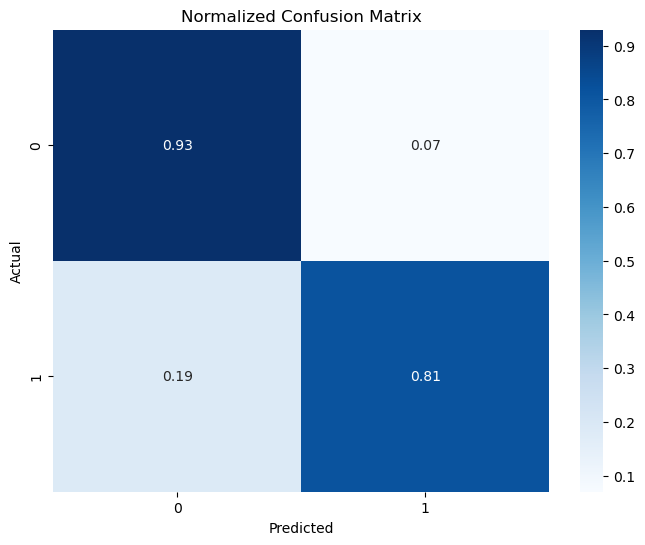

In [78]:
svm_model_UP = svm_model(0.75991968405656, 'rbf', 2, X_train_UP, X_test_UP, y_train_UP, y_test_UP)

### UMA 

SVM Metrics for Test Data
Accuracy: 0.81959
Precision: 0.13861
Recall: 0.87500
F1-Score: 0.23932
Specificity: 0.81774
AUC-ROC: 0.90987
Confusion Matrix:
 [[1171  261]
 [   6   42]]


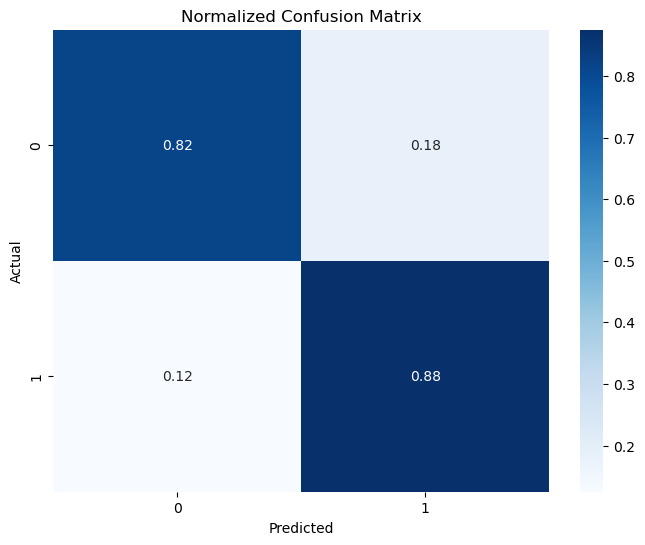

In [86]:
svm_model_UMA = svm_model(233.6201393458022, 'rbf', 4, X_train_UMA, X_test_UMA, y_train_UMA, y_test_UMA)

### WEDA

SVM Metrics for Test Data
Accuracy: 0.77463
Precision: 0.29494
Recall: 0.86667
F1-Score: 0.44010
Specificity: 0.76416
AUC-ROC: 0.90444
Confusion Matrix:
 [[1309  404]
 [  26  169]]


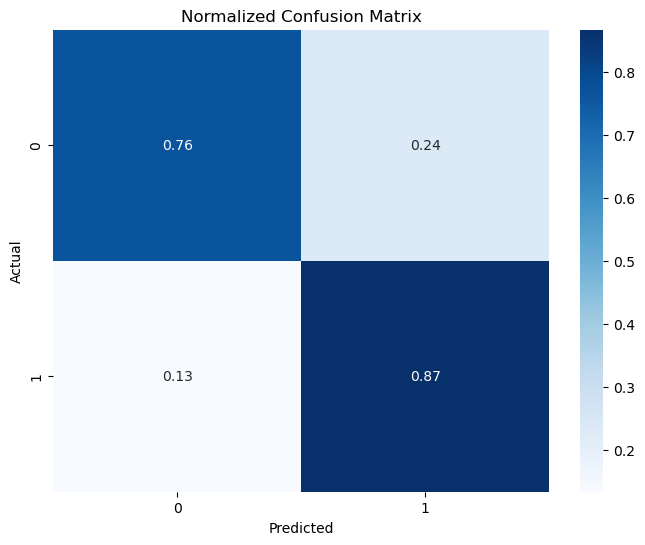

In [80]:
svm_model_WEDA = svm_model(45.05840485121868, 'poly', 2, X_train_WEDA, X_test_WEDA, y_train_WEDA, y_test_WEDA)

### Combinados

SVM Metrics for Test Data
Accuracy: 0.92574
Precision: 0.36906
Recall: 0.91582
F1-Score: 0.52611
Specificity: 0.92620
AUC-ROC: 0.96014
Confusion Matrix:
 [[5836  465]
 [  25  272]]


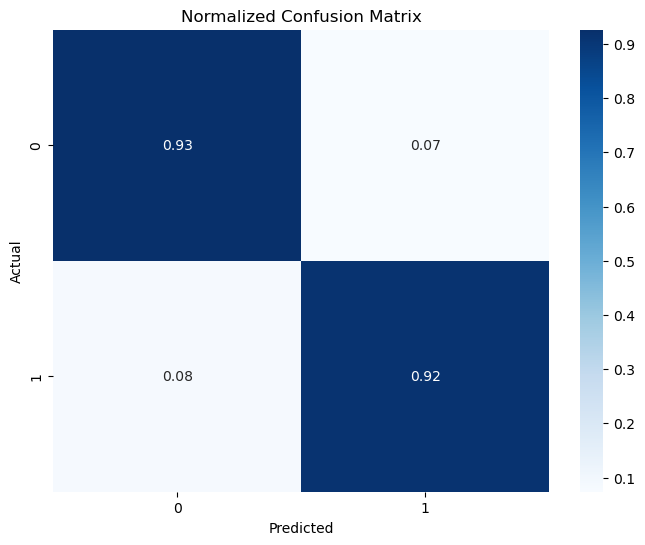

In [87]:
svm_model = svm_model(3.189649751399549, 'rbf', 3, X_train, X_test, y_train, y_test)

### ANN

In [88]:
def ann(learning_rate, num_neurons, dropout_rate, activation, optimiz, 
        epochs, batch_size, l2_reg, x_train, x_test, info_train, info_test, y_train, y_test):

    # Combine all datasets into a single DataFrame
    X = pd.concat([x_train, x_test], axis=0, ignore_index=True)
    info = pd.concat([info_train, info_test], axis=0, ignore_index=True)
    y = pd.concat([y_train, y_test], axis=0, ignore_index=True)
    complete_data = pd.concat([X, info, y], axis=1)

    # Calculate total number of elements
    total_elements = len(complete_data)
    # Check class distribution
    class_counts = complete_data['Tag'].value_counts()
    neg, pos = np.bincount(complete_data['Tag'])
    total = neg + pos
    # Calculate percentage of each class
    class_percentages = ((class_counts / total_elements) * 100).round(2).astype(str) + '%'
    # Display total elements and percentage of each class
    print("Total Elements:", total_elements)
    print("Percentage of Each Class:")
    print(class_percentages)

    # Class distribution in each dataset
    print(f'Average class probability in training set:   {y_train.mean():.4f}')
    print(f'Average class probability in test set:       {y_test.mean():.4f}')

    # Calculate balanced class weights
    weight_for_0 = (1 / neg) * (total / 2.0)
    weight_for_1 = (1 / pos) * (total / 2.0)
    class_weight = {0: weight_for_0, 1: weight_for_1}

    print('Weight for class 0: {:.2f}'.format(weight_for_0))
    print('Weight for class 1: {:.2f}'.format(weight_for_1))

    # Initialize output bias
    initial_bias = np.log([pos/neg])
    initial_bias

    # Function to plot normalized confusion matrix
    def plot_normalized_confusion_matrix(y_true, y_pred, labels):
        conf_matrix = confusion_matrix(y_true, y_pred)
        conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

        # Display normalized confusion matrix
        disp = ConfusionMatrixDisplay(conf_matrix_normalized, display_labels=labels)
        disp.plot(cmap='Blues', values_format='.4f')
        plt.show()

    def create_keras_model(metrics=METRICS, bias_initializer=None):
        model = Sequential()
        model.add(Dense(num_neurons, input_dim=x_train.shape[1], activation=activation, kernel_regularizer=l2(l2_reg)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1, activation='sigmoid'))

        if bias_initializer:
                model.layers[-1].bias.assign(bias_initializer)

        if optimiz == 'Adam':
            # Use Adam optimizer with specified learning rate
            optimizer = Adam(learning_rate=learning_rate)
        else:
            # Use SGD optimizer with specified learning rate
            optimizer = SGD(learning_rate=learning_rate)

        # Compile model with the correct optimizer
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

        return model

    EPOCHS = epochs
    BATCH_SIZE = batch_size

    # Create and summarize the model
    model = create_keras_model()
    model.summary()
    # Train weighted model
    model_history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, class_weight=class_weight, verbose=0) 
    # Plot metrics for weighted model
    plot_metrics(model_history)
    print("Test")
    # Model predictions on training and test sets
    test_predictions_model = model.predict(x_test, batch_size=BATCH_SIZE)
    # Model results
    model_results = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=0)
    for name, value in zip(model.metrics_names, model_results):
        print(name, ': ', value)
    f1 = f1_score(y_test, test_predictions_model> 0.5)
    print(f"F1-Score: {f1:.4f}")
    , ConfusionMatrixDisplay
    # Add normalized confusion matrix
    plot_normalized_confusion_matrix(y_test, test_predictions_model > 0.5, labels=[0, 1])

    print()

    print("_______________________________________________________________")

    return model, class_weight, EPOCHS, BATCH_SIZE

### UP

Total Elements: 10124
Percentage of Each Class:
Tag
0    98.35%
1     1.65%
Name: count, dtype: object
Average class probability in training set:   0.0163
Average class probability in test set:       0.0168
Weight for class 0: 0.51
Weight for class 1: 30.31
Model: "sequential_317"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_634 (Dense)           (None, 64)                5056      
                                                                 
 dropout_317 (Dropout)       (None, 64)                0         
                                                                 
 dense_635 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


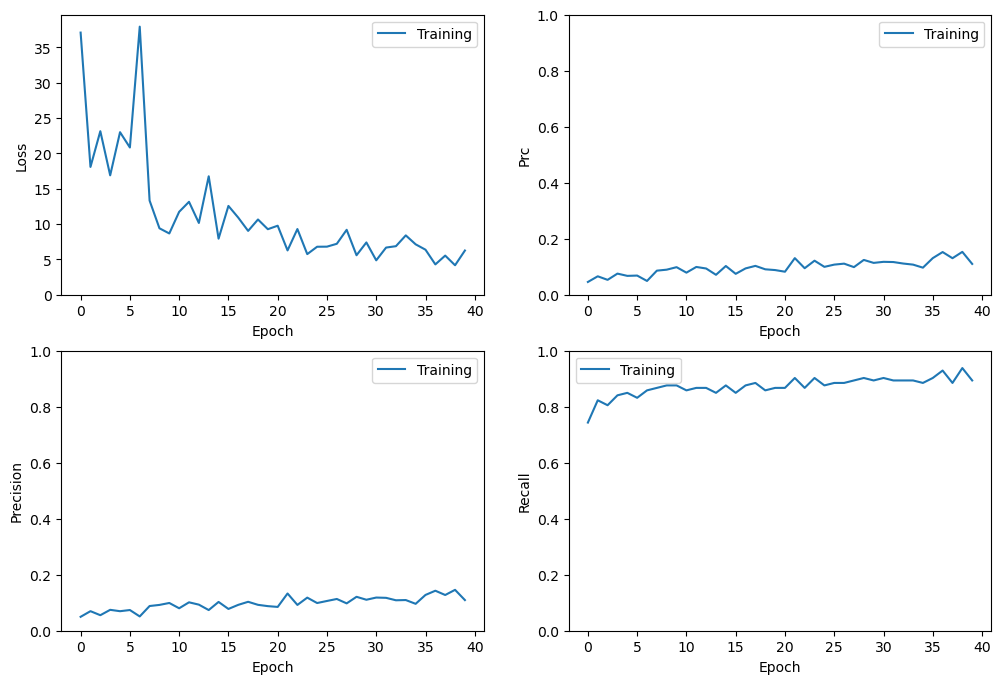

Test
101/101 [==============================] - 0s 1ms/step
loss :  9.499895095825195
Cross Entropy :  9.49417781829834
Brier Score :  0.08806709200143814
TP :  47.0
FP :  281.0
TN :  2875.0
FN :  7.0
Accuracy :  0.9102803468704224
Precision :  0.14329268038272858
Recall :  0.8703703880310059
AUC :  0.8931576609611511
PRC :  0.14069508016109467
F1-Score: 0.2461


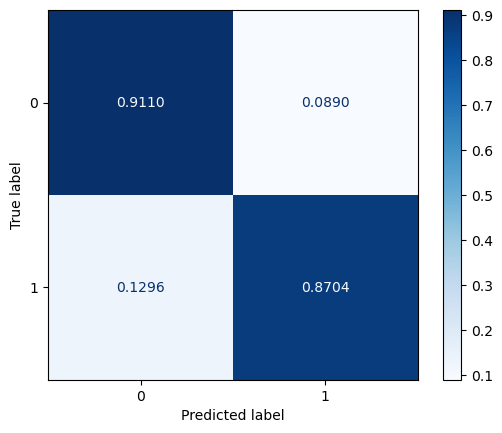


_______________________________________________________________


NameError: name 'model_2' is not defined

In [83]:
model_ann_UP, class_weight_UP, EPOCHS_UP, BATCH_SIZE_UP = ann(0.0011141583700686006, 64, 0.0, 'relu', 'Adam', 40, 32, 1.0470595636120626e-05,
                                                    X_train_UP, X_test_UP, info_train_UP, info_test_UP, y_train_UP, y_test_UP)

In [46]:
class_weight_UP

{0: 0.5083860600582505, 1: 30.311377245508982}

### UMA

Total Elements: 4890
Percentage of Each Class:
Tag
0    94.42%
1     5.58%
Name: count, dtype: object
Average class probability in training set:   0.0660
Average class probability in test set:       0.0324
Weight for class 0: 0.53
Weight for class 1: 8.96
Model: "sequential_318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_636 (Dense)           (None, 64)                1728      
                                                                 
 dropout_318 (Dropout)       (None, 64)                0         
                                                                 
 dense_637 (Dense)           (None, 1)                 65        
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


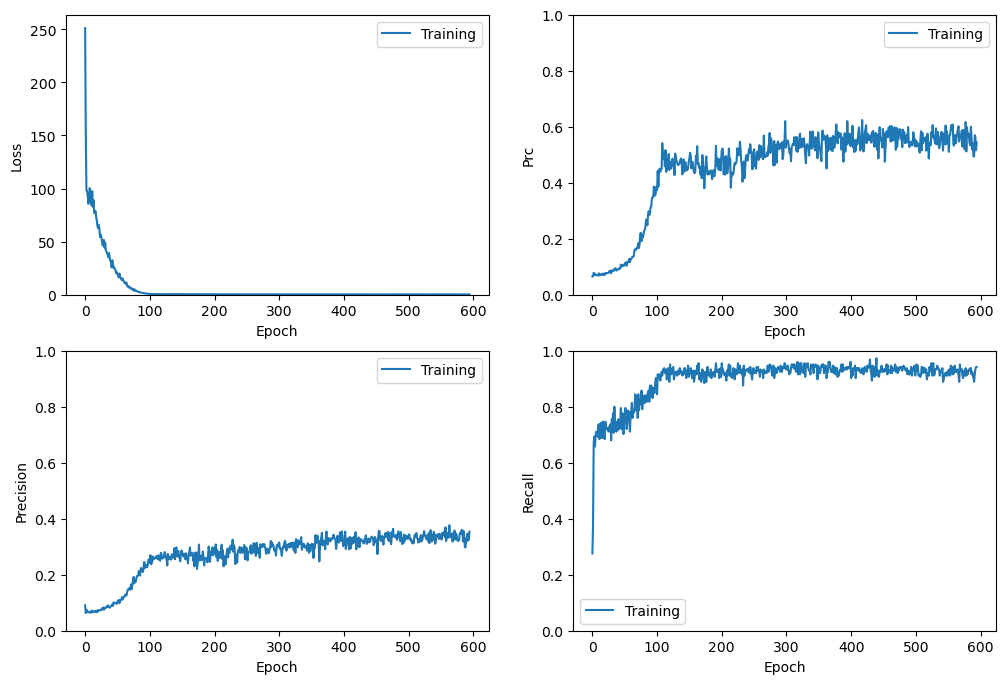

Test
19/19 [==============================] - 0s 4ms/step
loss :  0.27085617184638977
Cross Entropy :  0.2457180917263031
Brier Score :  0.06941701471805573
TP :  41.0
FP :  113.0
TN :  1319.0
FN :  7.0
Accuracy :  0.9189189076423645
Precision :  0.26623377203941345
Recall :  0.8541666865348816
AUC :  0.9226024150848389
PRC :  0.46458232402801514
F1-Score: 0.4059


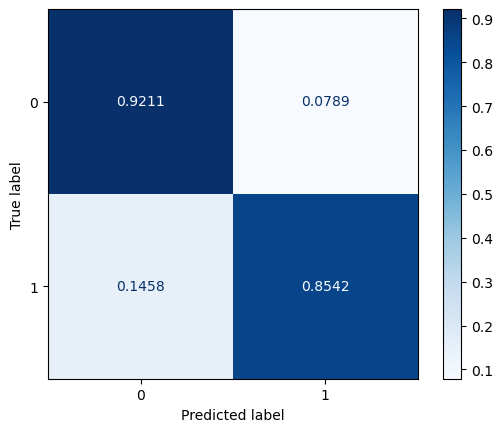


_______________________________________________________________


In [89]:
model_ann_UMA, class_weight_UMA, EPOCHS_UMA, BATCH_SIZE_UMA = ann(0.00030304925643506237, 64, 0.3592491457394948, 'relu', 'Adam', 595, 78, 0.01,
                                                                  X_train_UMA, X_test_UMA,info_train_UMA, info_test_UMA, y_train_UMA, y_test_UMA)

In [90]:
class_weight_UMA

{0: 0.5295646523716699, 1: 8.956043956043956}

### WEDA

Total Elements: 6667
Percentage of Each Class:
Tag
0    91.14%
1     8.86%
Name: count, dtype: object
Average class probability in training set:   0.0832
Average class probability in test set:       0.1022
Weight for class 0: 0.55
Weight for class 1: 5.64
Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_426 (Dense)           (None, 224)               5376      
                                                                 
 dropout_213 (Dropout)       (None, 224)               0         
                                                                 
 dense_427 (Dense)           (None, 1)                 225       
                                                                 
Total params: 5601 (21.88 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


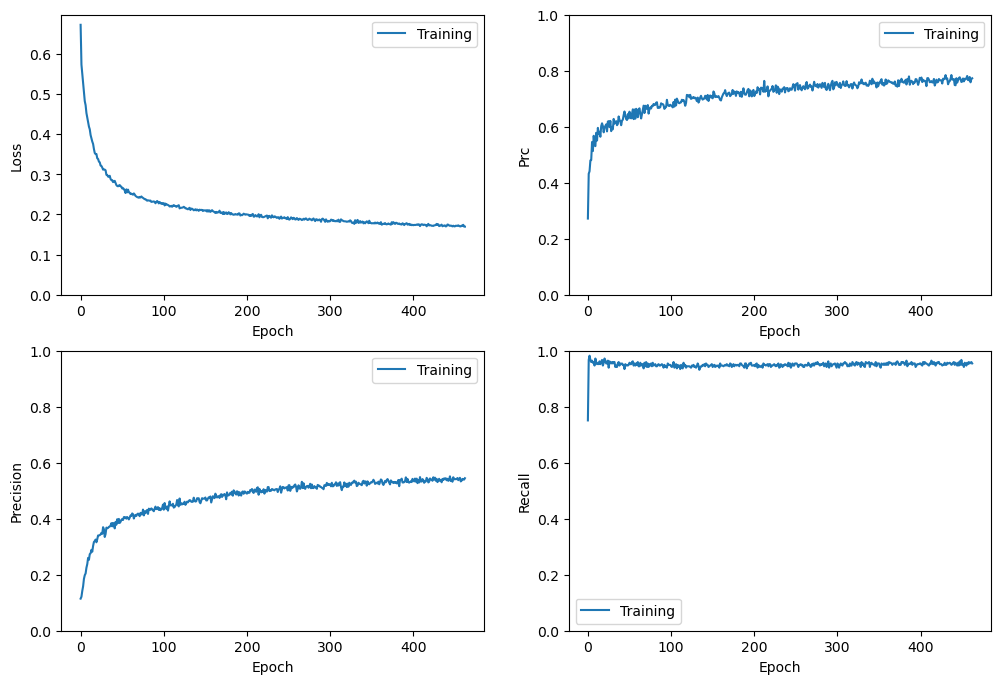

Test
9/9 [==============================] - 0s 1ms/step
loss :  0.22259779274463654
Cross Entropy :  0.22228650748729706
Brier Score :  0.06499128043651581
TP :  184.0
FP :  157.0
TN :  1556.0
FN :  11.0
Accuracy :  0.9119496941566467
Precision :  0.5395894646644592
Recall :  0.9435897469520569
AUC :  0.9678940773010254
PRC :  0.8023735284805298
F1-Score: 0.6866


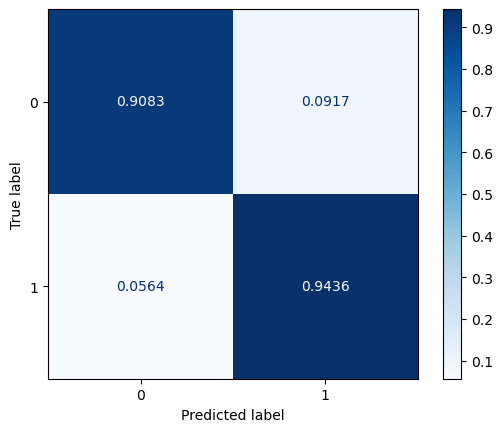


_______________________________________________________________
Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_428 (Dense)           (None, 224)               5376      
                                                                 
 dropout_214 (Dropout)       (None, 224)               0         
                                                                 
 dense_429 (Dense)           (None, 1)                 225       
                                                                 
Total params: 5601 (21.88 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


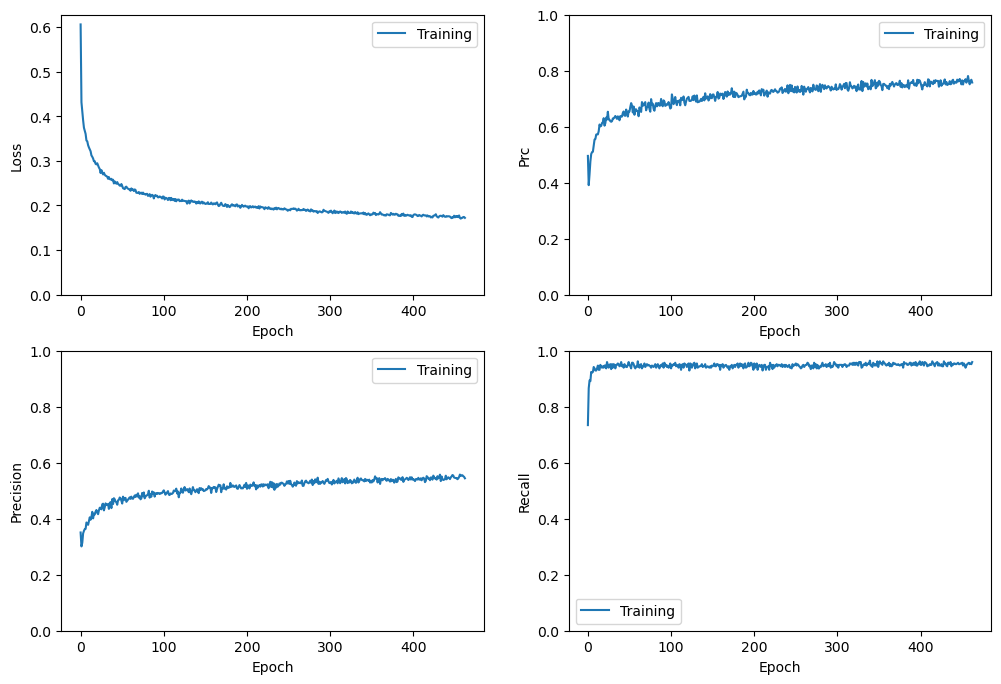

Test
9/9 [==============================] - 0s 1ms/step
loss :  0.23382790386676788
Cross Entropy :  0.23351894319057465
Brier Score :  0.06719914823770523
TP :  183.0
FP :  157.0
TN :  1556.0
FN :  12.0
Accuracy :  0.9114255905151367
Precision :  0.5382353067398071
Recall :  0.9384615421295166
AUC :  0.9665109515190125
PRC :  0.7987695336341858
F1-Score: 0.6841


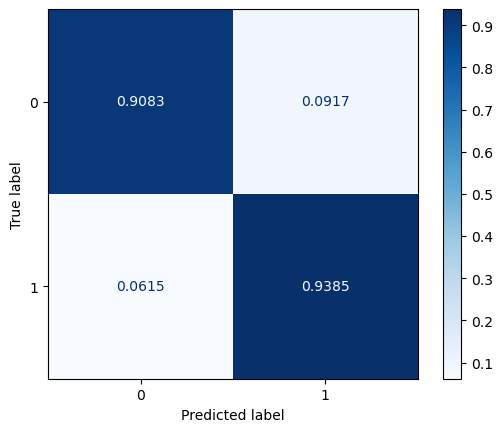

In [49]:
model_ann_WEDA, model_ann_2_WEDA,class_weight_WEDA, EPOCHS_WEDA, BATCH_SIZE_WEDA = ann(0.0067606736669594564, 224, 0.08668232675388605, 'relu', 'SGD', 463, 236, 6.7883879124212255e-06, 
                                                         X_train_WEDA, X_test_WEDA, info_train_WEDA, info_test_WEDA, y_train_WEDA, y_test_WEDA)

In [50]:
class_weight_WEDA

(<keras.src.engine.sequential.Sequential at 0x28de3e51a50>,
 {0: 0.548633969716919, 1: 5.640439932318105})

### Combinados

Total Elements: 21681
Percentage of Each Class:
Tag
0    95.24%
1     4.76%
Name: count, dtype: object
Average class probability in training set:   0.0487
Average class probability in test set:       0.0450
Weight for class 0: 0.52
Weight for class 1: 10.51
Model: "sequential_319"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_638 (Dense)           (None, 105)               2835      
                                                                 
 dropout_319 (Dropout)       (None, 105)               0         
                                                                 
 dense_639 (Dense)           (None, 1)                 106       
                                                                 
Total params: 2941 (11.49 KB)
Trainable params: 2941 (11.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


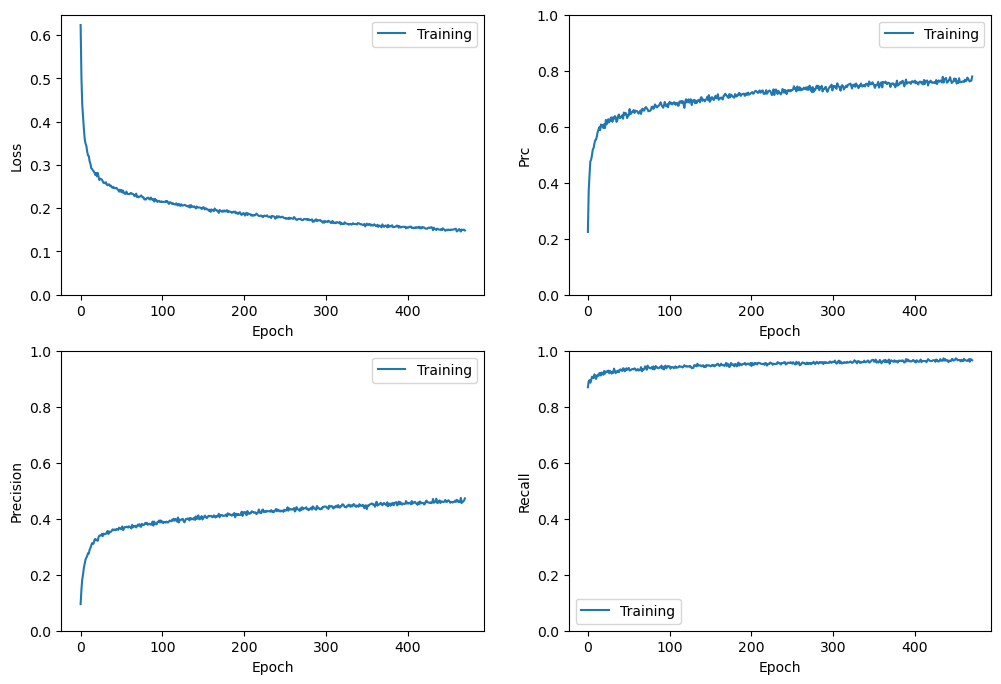

Test
207/207 [==============================] - 0s 1ms/step
loss :  0.1932660937309265
Cross Entropy :  0.1764649748802185
Brier Score :  0.05093453451991081
TP :  273.0
FP :  415.0
TN :  5886.0
FN :  24.0
Accuracy :  0.9334647059440613
Precision :  0.3968023359775543
Recall :  0.9191918969154358
AUC :  0.9737813472747803
PRC :  0.7130566835403442
F1-Score: 0.5543


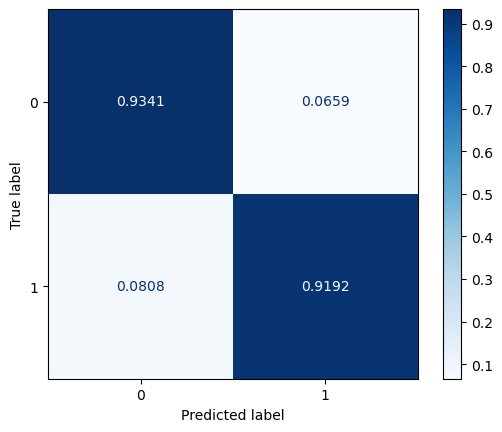


_______________________________________________________________


In [91]:
model_ann, class_weight, EPOCHS, BATCH_SIZE = ann(0.0001, 105, 0.16072479906112228, 'relu', 'Adam', 471,  32, 0.0008578095169756841,
                                                  X_train, X_test, info_train, info_test, y_train, y_test)

In [92]:
class_weight

{0: 0.5249636803874091, 1: 10.51454898157129}

In [93]:
"""
This code divides the data into training and testing sets for three different 
datasets (UMA, UP, and WEDA), repeating the process 10 times. 
Each dataset is split into training and testing using a 70% training and 30% testing ratio. 
The resulting partitions are stored in lists for later use in analysis or machine learning models.
"""


# Lists to store the partitions
partitions_UMA = []
partitions_UP = []
partitions_WEDA = []

# Repeat the process 10 times
for _ in range(10):
    # Split the data into training and testing (replace X_train, y_train, X_test, y_test with your data)
    train_UMA, test_UMA = split_train_test_data(complete_data_UMA, 0.7, 0.3)
    X_train_UMA, X_test_UMA = train_UMA.iloc[:, 0:78], test_UMA.iloc[:, 0:78]
    y_train_UMA, y_test_UMA = train_UMA.iloc[:, -1], test_UMA.iloc[:, -1]
    partitions_UMA.append((X_train_UMA, y_train_UMA, X_test_UMA, y_test_UMA))
    
    train_UP, test_UP = split_train_test_data(complete_data_UP, 0.7, 0.3)
    X_train_UP, X_test_UP = train_UP.iloc[:, 0:78], test_UP.iloc[:, 0:78]
    y_train_UP, y_test_UP = train_UP.iloc[:, -1], test_UP.iloc[:, -1]
    partitions_UP.append((X_train_UP, y_train_UP, X_test_UP, y_test_UP))

    train_WEDA, test_WEDA = split_train_test_data(complete_data_WEDA, 0.7, 0.3)
    X_train_WEDA, X_test_WEDA = train_WEDA.iloc[:, 0:78], test_WEDA.iloc[:, 0:78]
    y_train_WEDA, y_test_WEDA = train_WEDA.iloc[:, -1], test_WEDA.iloc[:, -1]
    partitions_WEDA.append((X_train_WEDA, y_train_WEDA, X_test_WEDA, y_test_WEDA))


### SVM

Matriz normalizada UMA 1


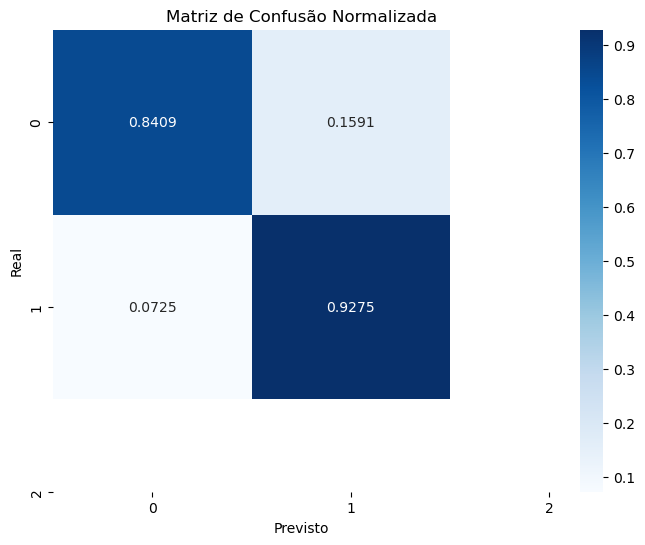

Matriz normalizada UP 1


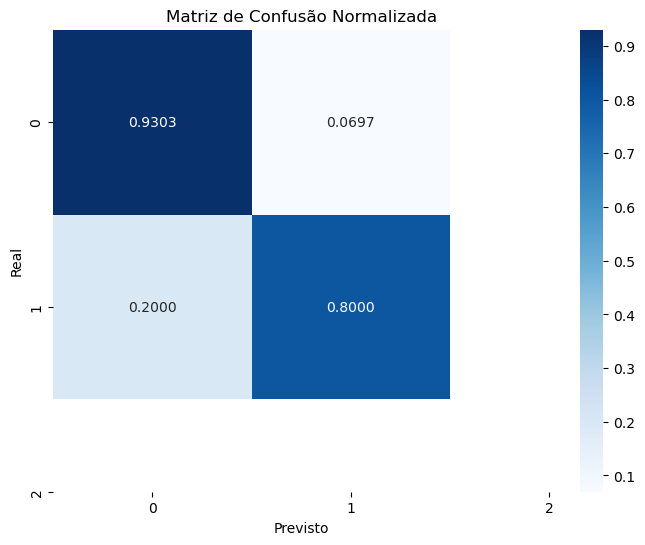

Matriz normalizada WEDA 1


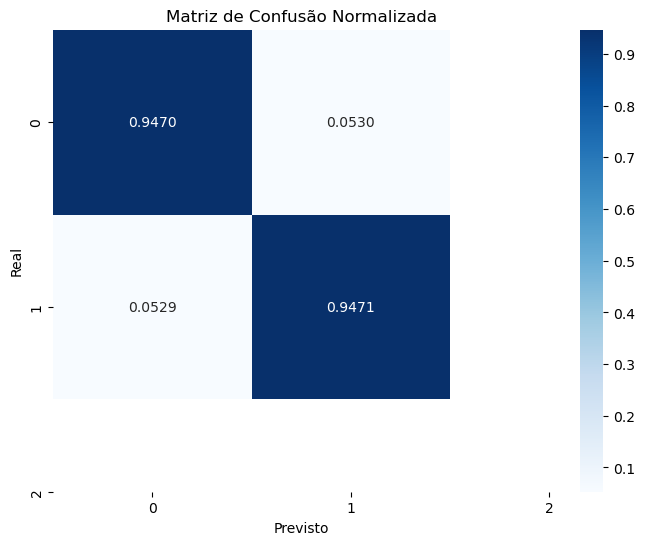

Matriz normalizada COMBINADO 1


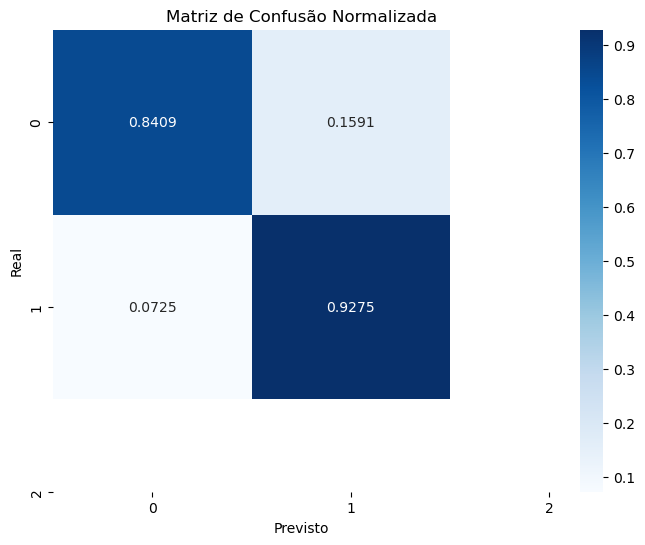

Matriz normalizada UMA 2


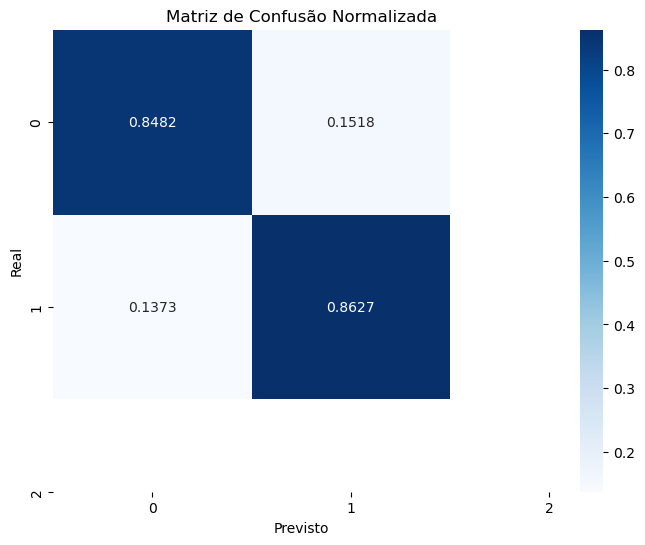

Matriz normalizada UP 2


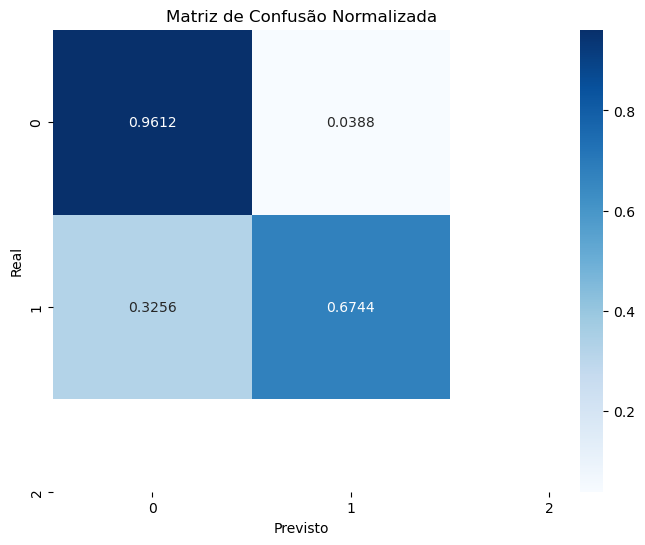

Matriz normalizada WEDA 2


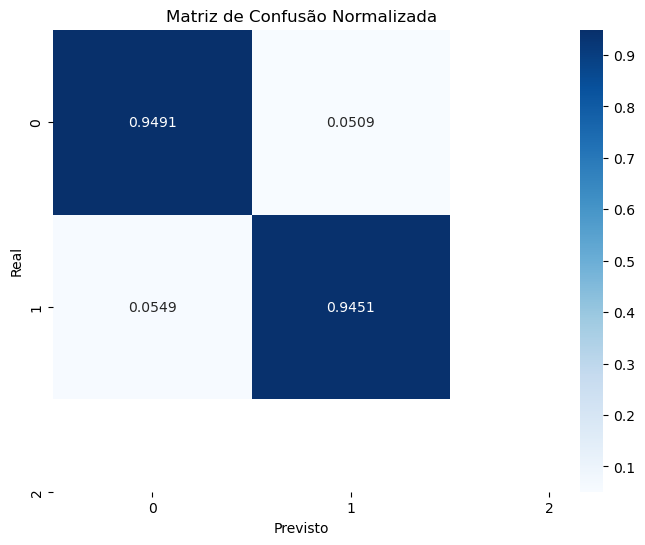

Matriz normalizada COMBINADO 2


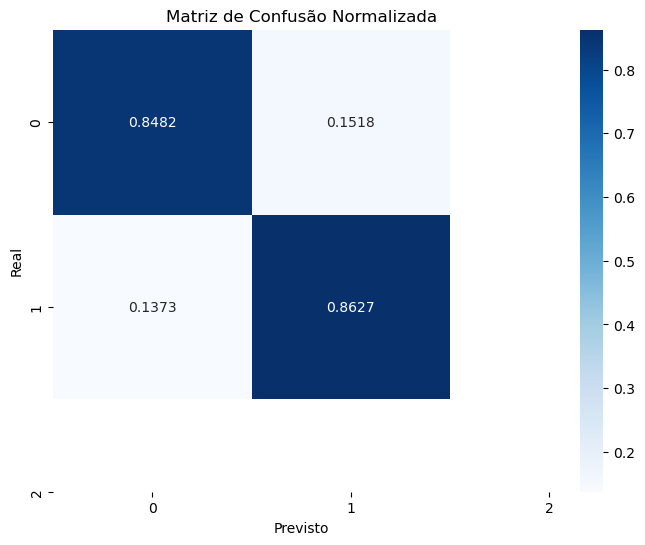

Matriz normalizada UMA 3


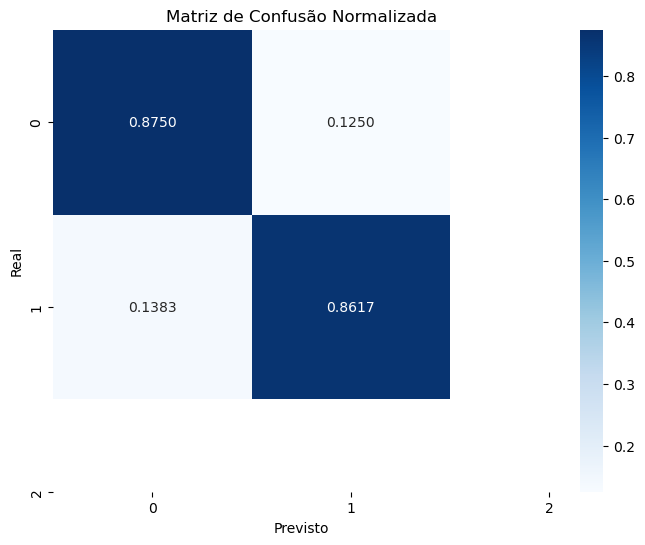

Matriz normalizada UP 3


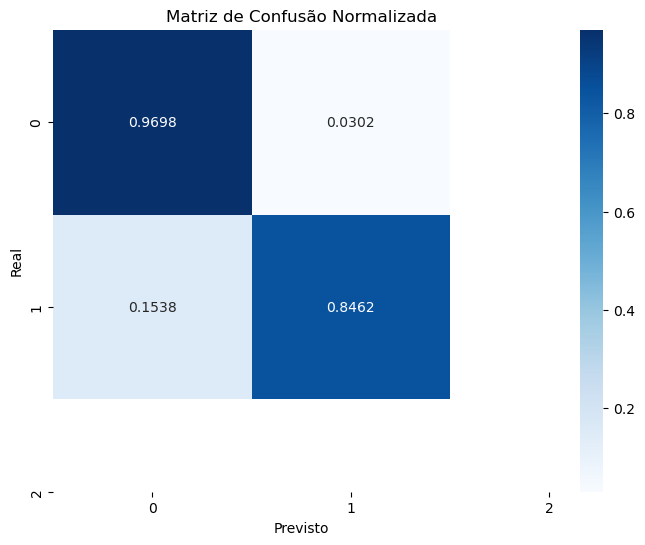

Matriz normalizada WEDA 3


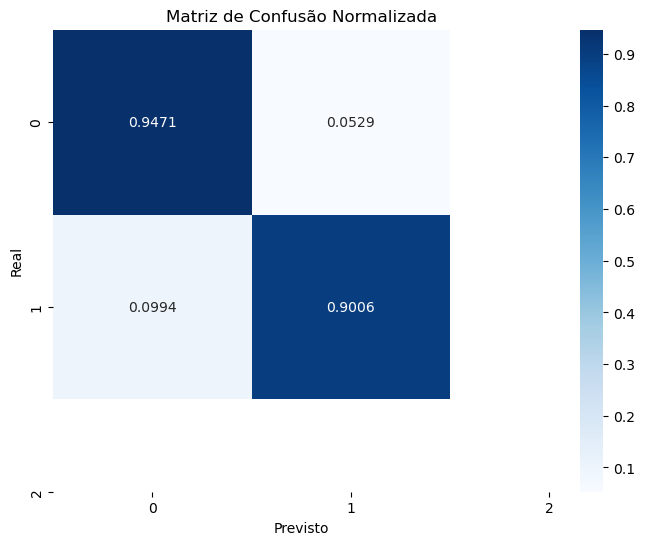

Matriz normalizada COMBINADO 3


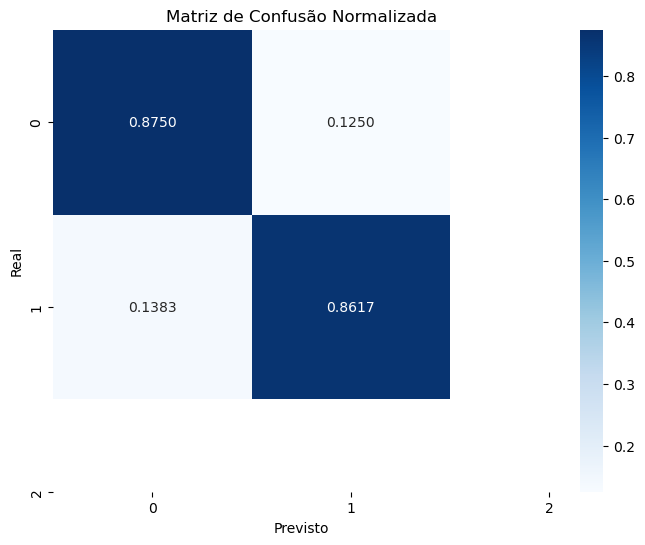

Matriz normalizada UMA 4


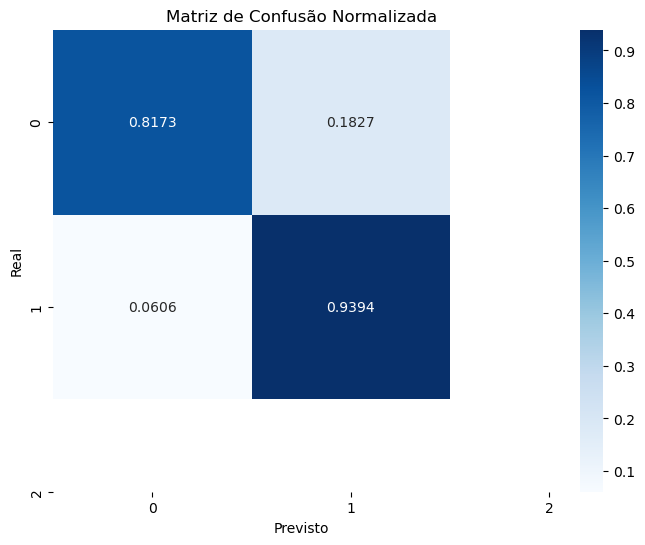

Matriz normalizada UP 4


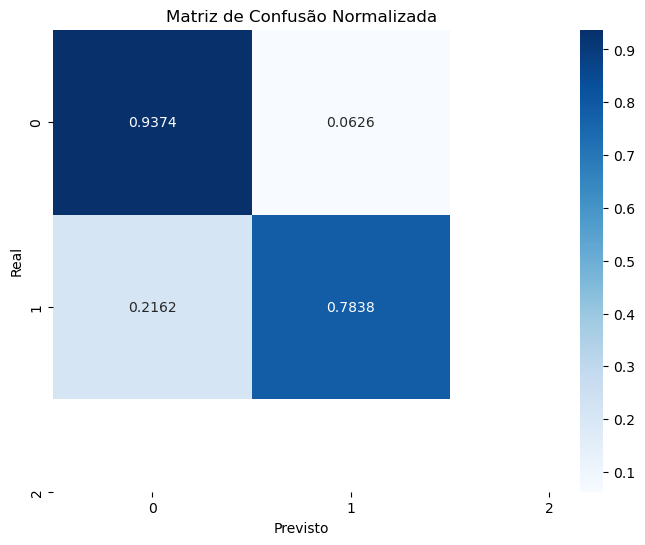

Matriz normalizada WEDA 4


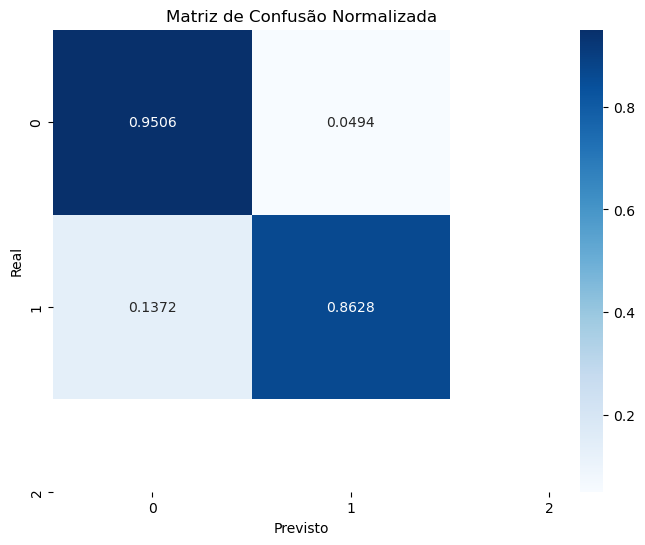

Matriz normalizada COMBINADO 4


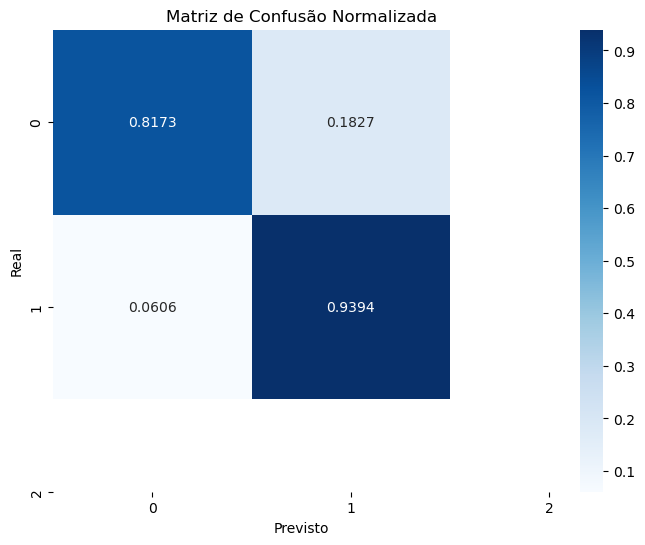

Matriz normalizada UMA 5


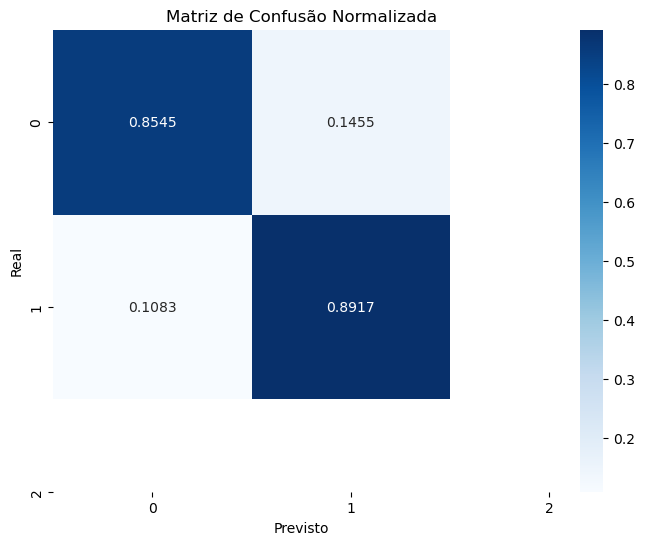

Matriz normalizada UP 5


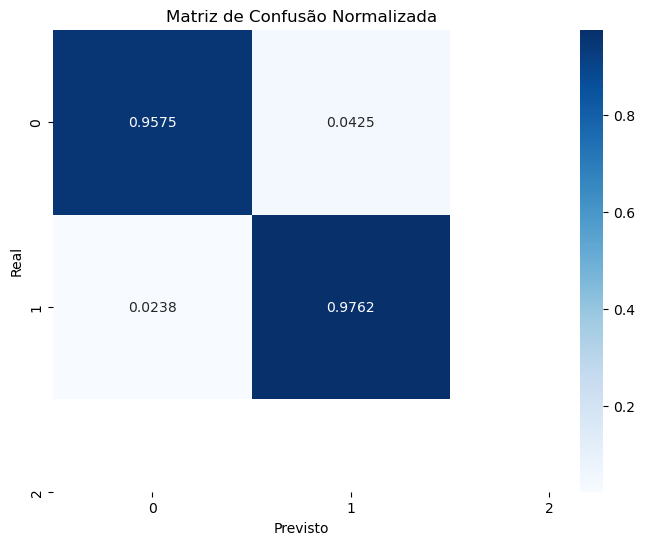

Matriz normalizada WEDA 5


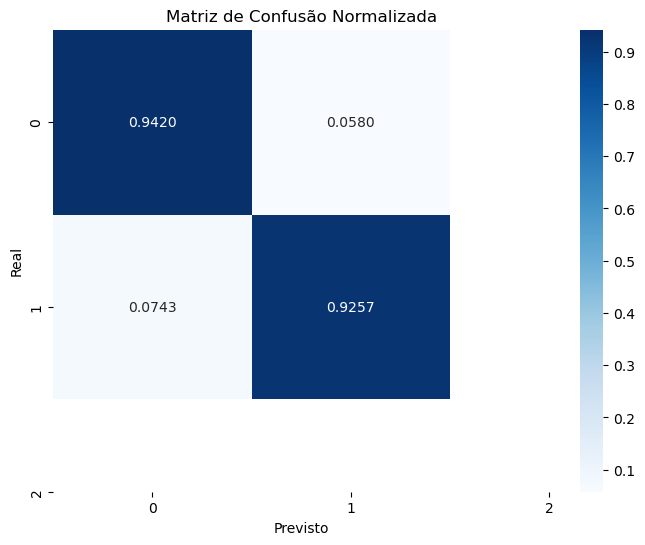

Matriz normalizada COMBINADO 5


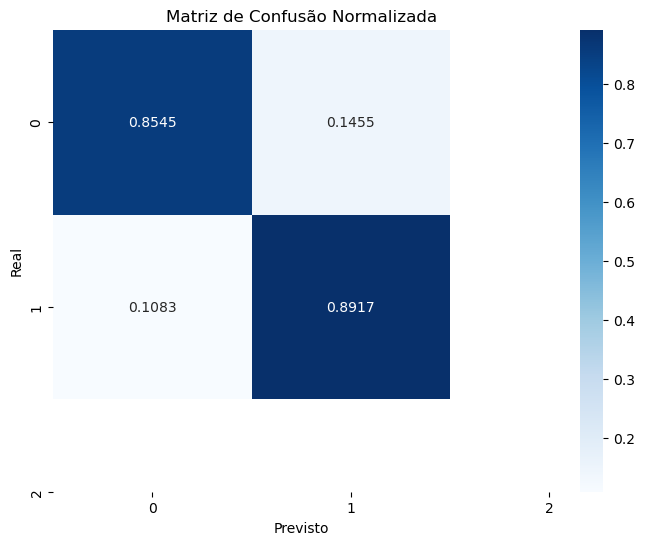

Matriz normalizada UMA 6


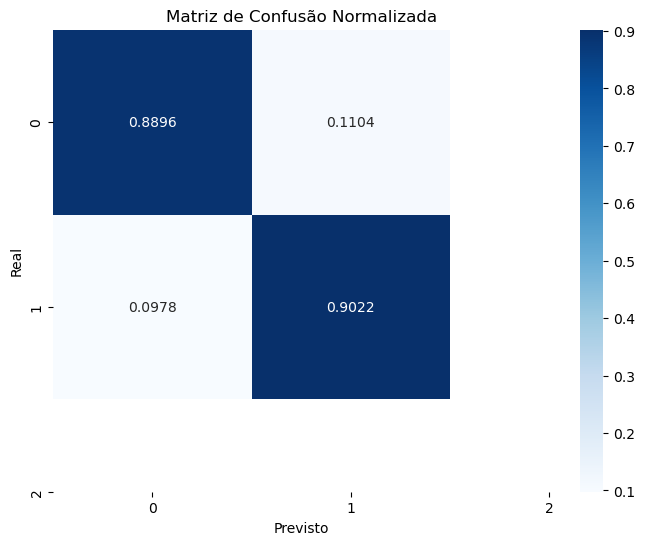

Matriz normalizada UP 6


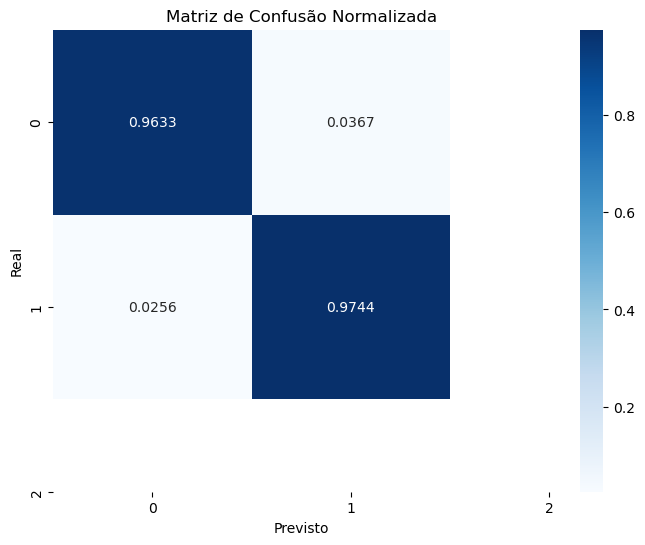

Matriz normalizada WEDA 6


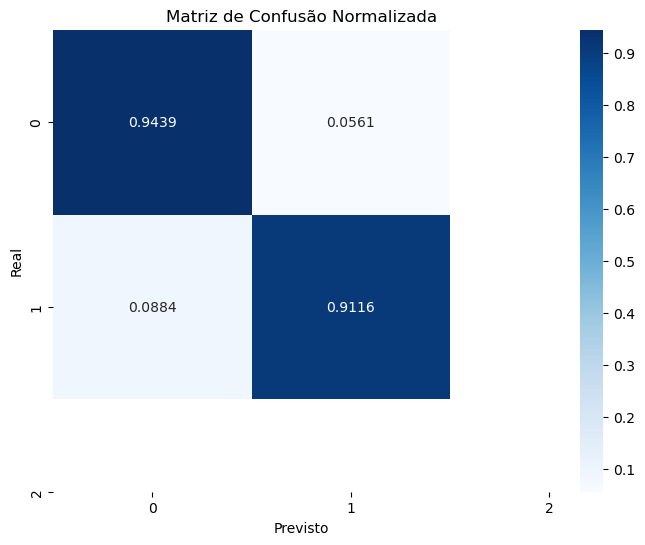

Matriz normalizada COMBINADO 6


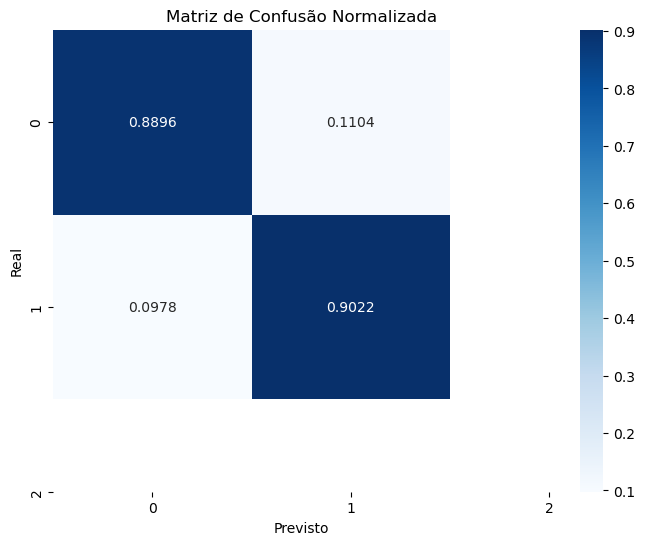

Matriz normalizada UMA 7


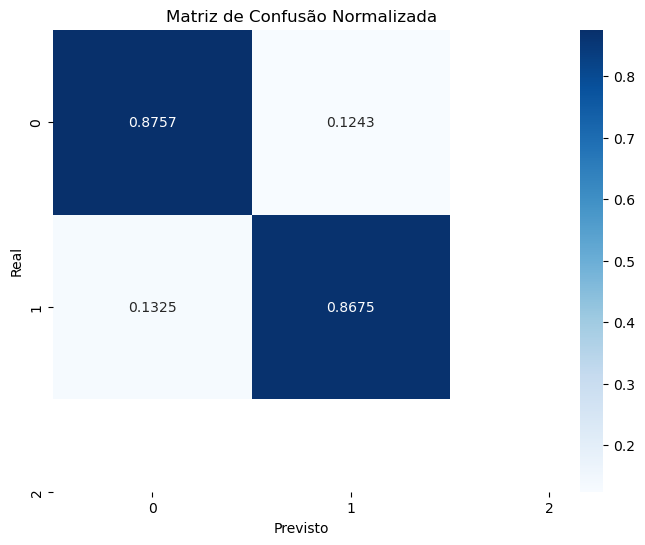

Matriz normalizada UP 7


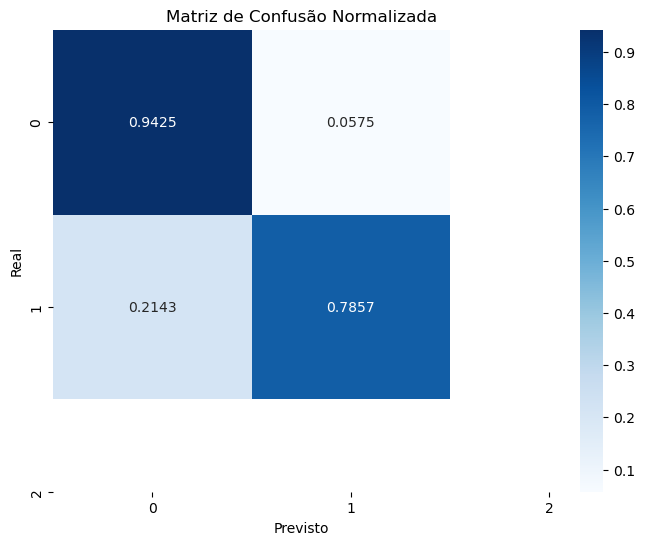

Matriz normalizada WEDA 7


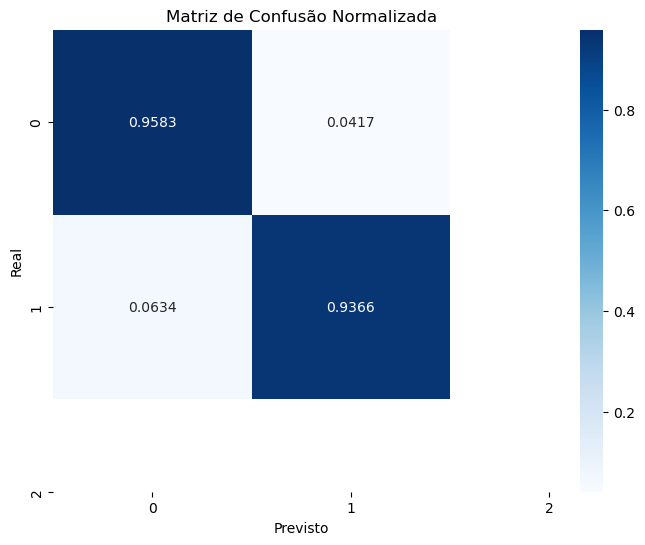

Matriz normalizada COMBINADO 7


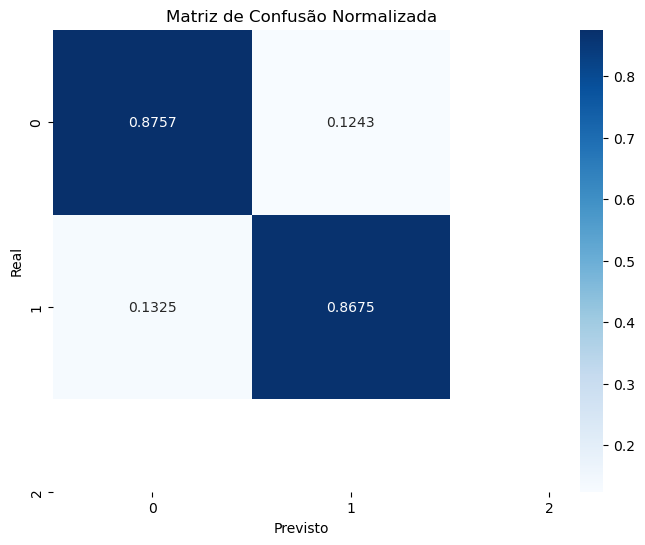

Matriz normalizada UMA 8


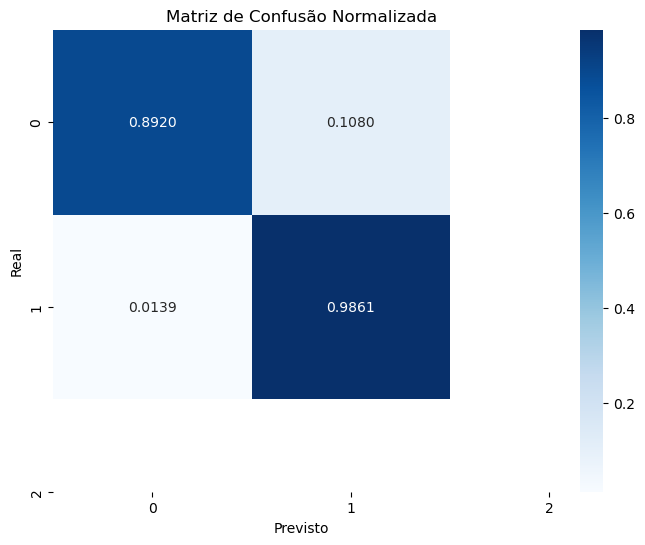

Matriz normalizada UP 8


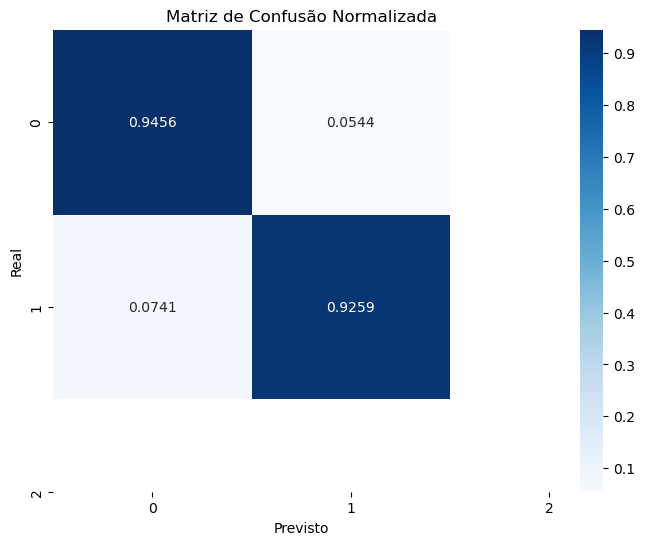

Matriz normalizada WEDA 8


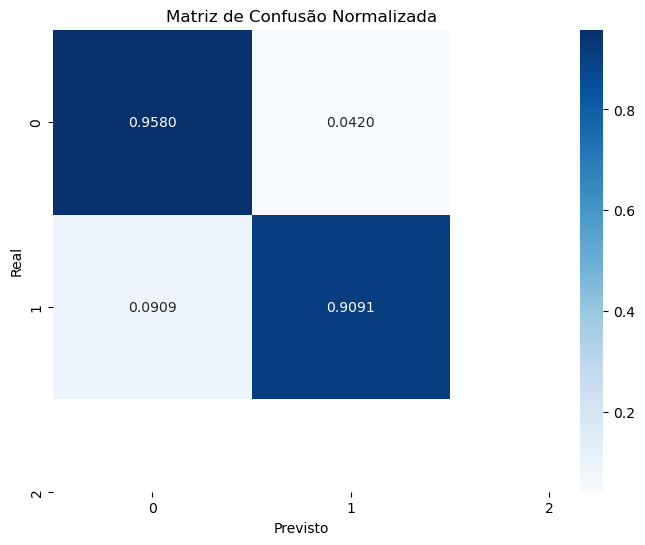

Matriz normalizada COMBINADO 8


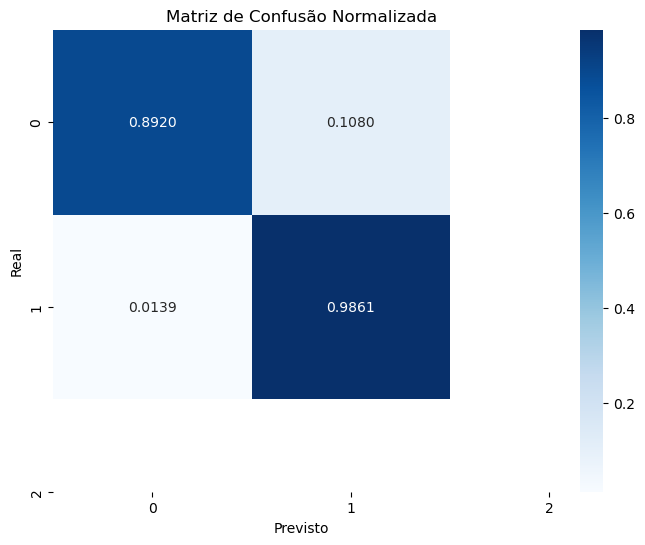

Matriz normalizada UMA 9


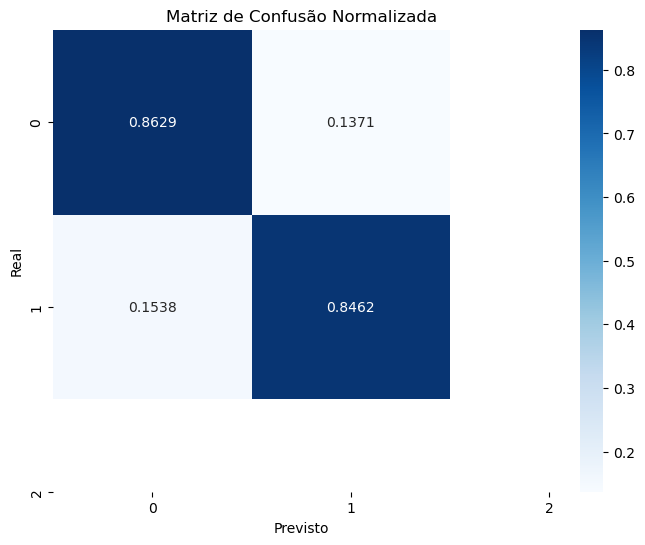

Matriz normalizada UP 9


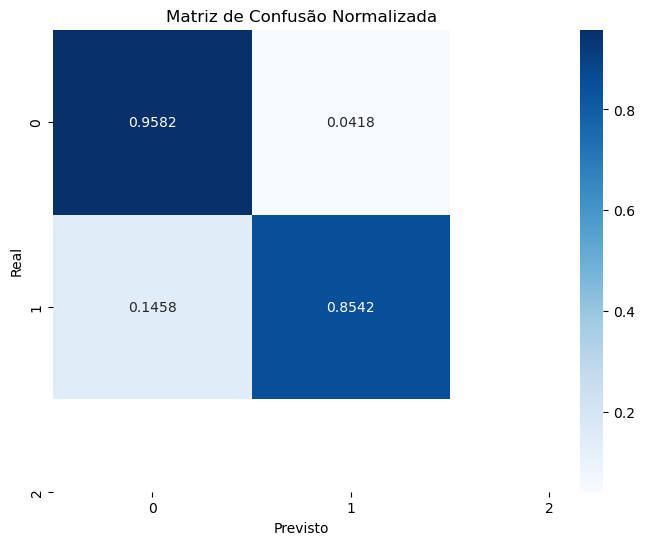

Matriz normalizada WEDA 9


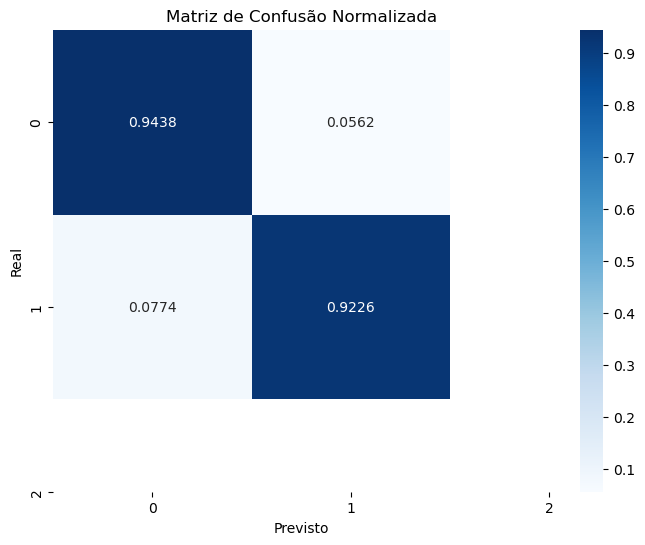

Matriz normalizada COMBINADO 9


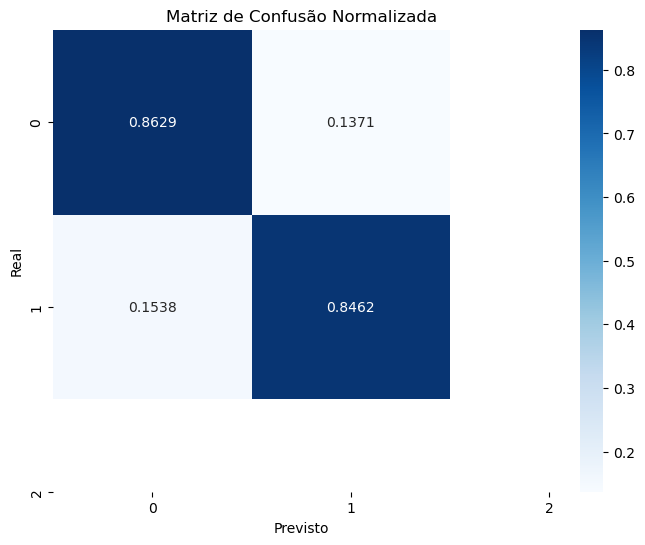

Matriz normalizada UMA 10


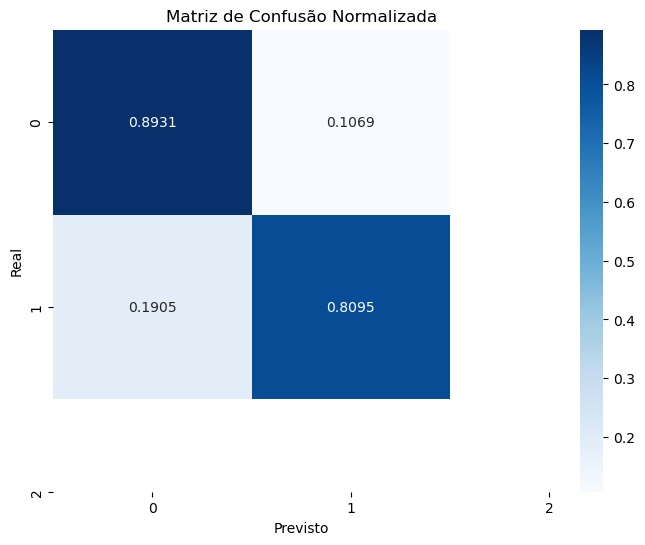

Matriz normalizada UP 10


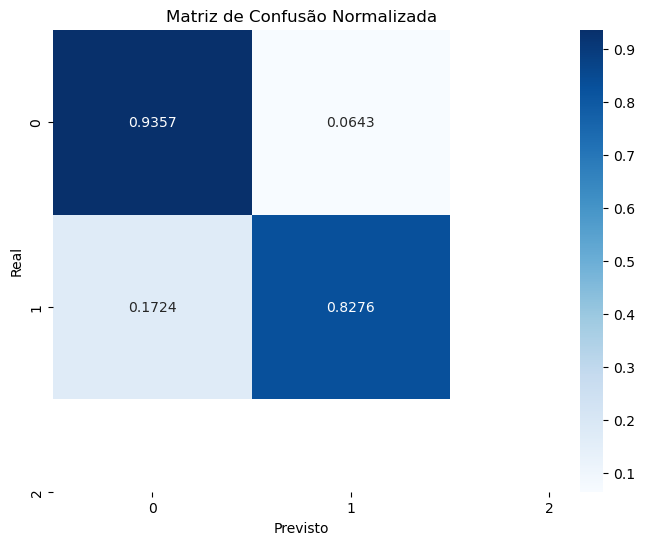

Matriz normalizada WEDA 10


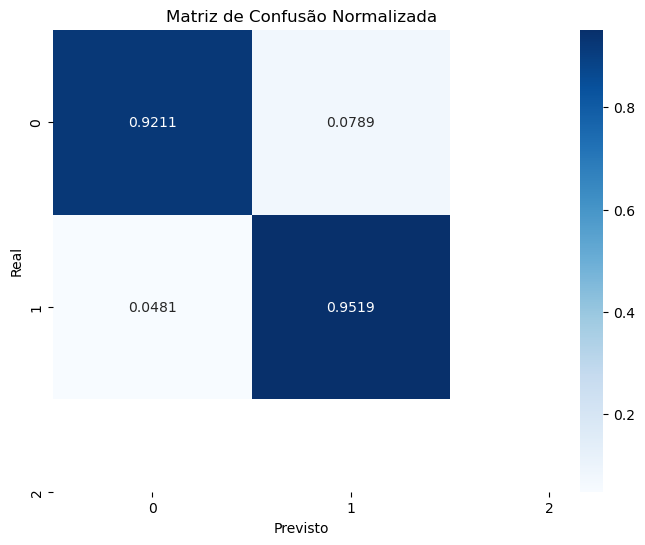

Matriz normalizada COMBINADO 10


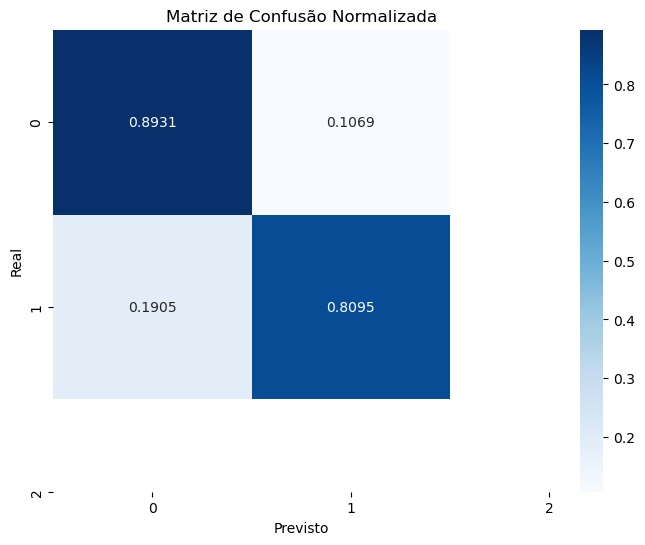

In [94]:
acuracia_UMA = []
precisao_UMA = []
recall_UMA = []
f1_UMA = []
specificity_UMA = []
auc_roc_UMA = []
matrizes_confusao_UMA = []

#### UP
acuracia_UP= []
precisao_UP= []
recall_UP= []
f1_UP= []
specificity_UP= []
auc_roc_UP= []
matrizes_confusao_UP= []


#### WEDA
acuracia_WEDA= []
precisao_WEDA= []
recall_WEDA= []
f1_WEDA= []
specificity_WEDA= []
auc_roc_WEDA= []
matrizes_confusao_WEDA= []


acuracia = []
precisao = []
recall = []
f1 = []
specificity = []
auc_roc = []
matrizes_confusao = []


matrizes_confusao_UMA_norm = []
matrizes_confusao_UP_norm = []
matrizes_confusao_WEDA_norm = []
matrizes_confusao_norm = []

# Repetir o processo 10 vezes
for i in range(10):
    # Obter as partições correspondentes
    X_train_UMA, y_train_UMA, X_test_UMA, y_test_UMA = partitions_UMA[i]
    X_train_UP, y_train_UP, X_test_UP, y_test_UP = partitions_UP[i]
    X_train_WEDA, y_train_WEDA, X_test_WEDA, y_test_WEDA = partitions_WEDA[i]
    # Carregar dados de treinamento, validação e teste
    X_train = pd.concat([X_train_UMA, X_train_WEDA, X_train_UP ], axis=0, ignore_index=True)
    y_train =  pd.concat([y_train_UMA, y_train_WEDA, y_train_UP ], axis=0, ignore_index=True)
    X_test = pd.concat([X_test_UMA, X_test_WEDA, X_test_UP ], axis=0, ignore_index=True)
    y_test =  pd.concat([y_test_UMA, y_test_WEDA, y_test_UP ], axis=0, ignore_index=True)
    
    
    
    
    X_train_UMA, X_test_UMA = X_train_UMA[features_UMA], X_test_UMA[features_UMA] 
    X_train_UP, X_test_UP = X_train_UP[features_UP], X_test_UP[features_UP] 
    X_train_WEDA, X_test_WEDA = X_train_WEDA[features_WEDA], X_test_WEDA[features_WEDA] 
    X_train, X_test = X_train[combined_features], X_test[combined_features] 
    




    #   UMA   _________________________________________________________________________________________________
    # Criar e treinar o modelo SVM
    # Treinar o modelo
    svm_model_UMA.fit(X_train_UMA, y_train_UMA)

    # Realizar previsões no conjunto de teste
    y_pred_teste_UMA = svm_model_UMA.predict(X_test_UMA)

    # Calcular métricas
    acuracia_UMA_ = accuracy_score(y_test_UMA, y_pred_teste_UMA)
    precisao_UMA_ = precision_score(y_test_UMA, y_pred_teste_UMA)
    recall_UMA_ = recall_score(y_test_UMA, y_pred_teste_UMA)
    f1_UMA_ = f1_score(y_test_UMA, y_pred_teste_UMA)
    conf_matrix_UMA_ = confusion_matrix(y_test_UMA, y_pred_teste_UMA)

    # Calcular a especificidade
    tn, fp, fn, tp = conf_matrix_UMA_.ravel()
    specificity_UMA_ = tn / (tn + fp)

    # Calcular o AUC-ROC
    y_pred_prob_UMA = svm_model_UMA.predict_proba(X_test_UMA)[:, 1]
    auc_roc_UMA_ = roc_auc_score(y_test_UMA, y_pred_prob_UMA)


    # Armazenar as métricas da execução atual
    acuracia_UMA.append(acuracia_UMA_)
    precisao_UMA.append(precisao_UMA_)
    recall_UMA.append(recall_UMA_)
    f1_UMA.append(f1_UMA_)
    specificity_UMA.append(specificity_UMA_)
    auc_roc_UMA.append(auc_roc_UMA_)
    # Armazene a matriz de confusão atual na lista
    matrizes_confusao_UMA.append(conf_matrix_UMA_)
    # Calcula a matriz de confusão normalizada
    conf_matrix_UMA_norm = conf_matrix_UMA_ / np.sum(conf_matrix_UMA_, axis=1, keepdims=True)
    matrizes_confusao_UMA_norm.append(conf_matrix_UMA_norm)
    print("Matriz normalizada UMA", i+1)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_UMA_norm, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()


    

    #  UP   ______________________________________________________________________________________________________________  
    # Criar e treinar o modelo SVM
    # Treinar o modelo
    svm_model_UP.fit(X_train_UP, y_train_UP)

    # Realizar previsões no conjunto de teste
    y_pred_teste_UP = svm_model_UP.predict(X_test_UP)

    # Calcular métricas
    acuracia_UP_ = accuracy_score(y_test_UP, y_pred_teste_UP)
    precisao_UP_ = precision_score(y_test_UP, y_pred_teste_UP)
    recall_UP_ = recall_score(y_test_UP, y_pred_teste_UP)
    f1_UP_ = f1_score(y_test_UP, y_pred_teste_UP)
    conf_matrix_UP_ = confusion_matrix(y_test_UP, y_pred_teste_UP)

    # Calcular a especificidade
    tn, fp, fn, tp = conf_matrix_UP_.ravel()
    specificity_UP_ = tn / (tn + fp)

    # Calcular o AUC-ROC
    y_pred_prob_UP = svm_model_UP.predict_proba(X_test_UP)[:, 1]
    auc_roc_UP_ = roc_auc_score(y_test_UP, y_pred_prob_UP)


    # Armazenar as métricas da execução atual
    acuracia_UP.append(acuracia_UP_)
    precisao_UP.append(precisao_UP_)
    recall_UP.append(recall_UP_)
    f1_UP.append(f1_UP_)
    specificity_UP.append(specificity_UP_)
    auc_roc_UP.append(auc_roc_UP_)
    # Armazene a matriz de confusão atual na lista
    matrizes_confusao_UP.append(conf_matrix_UP_)
    conf_matrix_UP_norm = conf_matrix_UP_ / np.sum(conf_matrix_UP_, axis=1, keepdims=True)
    matrizes_confusao_UP_norm.append(conf_matrix_UP_norm)
    print("Matriz normalizada UP", i+1)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_UP_norm, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()



    



    # WEDA  _______________________________________________________________________________________________________________
    # Criar e treinar o modelo SVM
    # Treinar o modelo
    svm_model_WEDA.fit(X_train_WEDA, y_train_WEDA)

    # Realizar previsões no conjunto de teste
    y_pred_teste_WEDA = svm_model_WEDA.predict(X_test_WEDA)

    # Calcular métricas
    acuracia_WEDA_ = accuracy_score(y_test_WEDA, y_pred_teste_WEDA)
    precisao_WEDA_ = precision_score(y_test_WEDA, y_pred_teste_WEDA)
    recall_WEDA_ = recall_score(y_test_WEDA, y_pred_teste_WEDA)
    f1_WEDA_ = f1_score(y_test_WEDA, y_pred_teste_WEDA)
    conf_matrix_WEDA_ = confusion_matrix(y_test_WEDA, y_pred_teste_WEDA)

    # Calcular a especificidade
    tn, fp, fn, tp = conf_matrix_WEDA_.ravel()
    specificity_WEDA_ = tn / (tn + fp)

    # Calcular o AUC-ROC
    y_pred_prob_WEDA = svm_model_WEDA.predict_proba(X_test_WEDA)[:, 1]
    auc_roc_WEDA_ = roc_auc_score(y_test_WEDA, y_pred_prob_WEDA)


    # Armazenar as métricas da execução atual
    acuracia_WEDA.append(acuracia_WEDA_)
    precisao_WEDA.append(precisao_WEDA_)
    recall_WEDA.append(recall_WEDA_)
    f1_WEDA.append(f1_WEDA_)
    specificity_WEDA.append(specificity_WEDA_)
    auc_roc_WEDA.append(auc_roc_WEDA_)
    # Armazene a matriz de confusão atual na lista
    matrizes_confusao_WEDA.append(conf_matrix_WEDA_)
    conf_matrix_WEDA_norm = conf_matrix_WEDA_ / np.sum(conf_matrix_WEDA_, axis=1, keepdims=True)
    matrizes_confusao_WEDA_norm.append(conf_matrix_WEDA_norm)
    print("Matriz normalizada WEDA", i+1)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_WEDA_norm, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()



    
    
    
    #_________________________________________________________________________________________________
    # Criar e treinar o modelo SVM
    model_svm.fit(X_train, y_train)

    # Realizar previsões no conjunto de teste
    y_pred_teste = model_svm.predict(X_test)

    # Calcular métricas
    acuracia_ = accuracy_score(y_test, y_pred_teste)
    precisao_ = precision_score(y_test, y_pred_teste)
    recall_ = recall_score(y_test, y_pred_teste)
    f1_ = f1_score(y_test, y_pred_teste)
    conf_matrix_ = confusion_matrix(y_test, y_pred_teste)

    # Calcular a especificidade
    tn, fp, fn, tp = conf_matrix_.ravel()
    specificity_ = tn / (tn + fp)

    # Calcular o AUC-ROC
    y_pred_prob = model_svm.predict_proba(X_test)[:, 1]
    auc_roc_ = roc_auc_score(y_test, y_pred_prob)


    # Armazenar as métricas da execução atual
    acuracia.append(acuracia_)
    precisao.append(precisao_)
    recall.append(recall_)
    f1.append(f1_)
    specificity.append(specificity_)
    auc_roc.append(auc_roc_)
    # Armazene a matriz de confusão atual na lista
    matrizes_confusao.append(conf_matrix_)
    conf_matrix_norm = conf_matrix_ / np.sum(conf_matrix_, axis=1, keepdims=True)
    matrizes_confusao_norm.append(conf_matrix_norm)
    print("Matriz normalizada COMBINADO", i+1)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_UMA_norm, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()


_________________________________________________________________________________ 
__________________________________ UMA __________________________________________ 
Média Acurácia: 0.9059373259913833
Desvio Padrão Acurácia: 0.01637530919761284
Média Precisão: 0.3166869126783751
Desvio Padrão Precisão: 0.050323348966420836
Média Recall: 0.8838928733964397
Desvio Padrão Recall: 0.030467273401545977
Média F1-Score: 0.46371166972669264
Desvio Padrão F1-Score: 0.056117086920476976
Média Especificidade: 0.9070164589713746
Desvio Padrão Especificidade: 0.017026620079746226
Média AUC-ROC: 0.93590817328203
Desvio Padrão AUC-ROC: 0.019529905930555907
Média e Desvio Padrão para UMA:
Média:
[[0.90701646 0.09298354]
 [0.11610713 0.88389287]]
Desvio Padrão:
[[0.01702662 0.01702662]
 [0.03046727 0.03046727]]



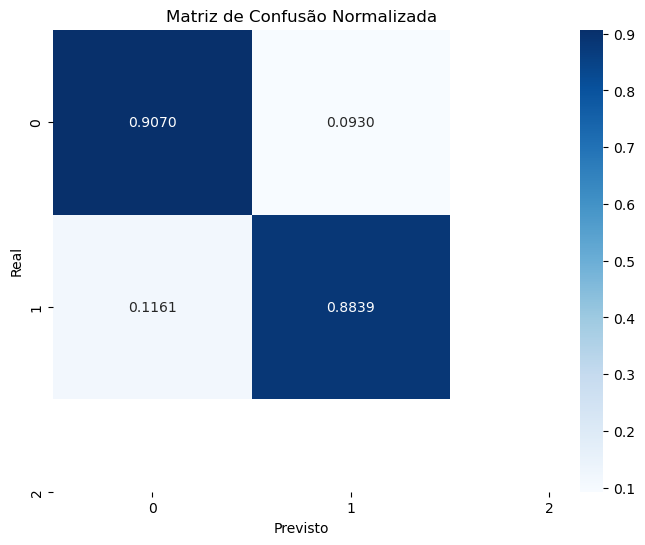

_________________________________________________________________________________ 
__________________________________ UP ___________________________________________ 
Média Acurácia: 0.9472241549621241
Desvio Padrão Acurácia: 0.011502136275991805
Média Precisão: 0.21900751266803767
Desvio Padrão Precisão: 0.05402400731356765
Média Recall: 0.8788377054523073
Desvio Padrão Recall: 0.041792174274082904
Média F1-Score: 0.34681556635532146
Desvio Padrão F1-Score: 0.06797881705065213
Média Especificidade: 0.9483283150713389
Desvio Padrão Especificidade: 0.011832516653110014
Média AUC-ROC: 0.9552140403941257
Desvio Padrão AUC-ROC: 0.007182641325344557
Média e Desvio Padrão para UP:
Média:
[[0.94832832 0.05167168]
 [0.12116229 0.87883771]]
Desvio Padrão:
[[0.01183252 0.01183252]
 [0.04179217 0.04179217]]



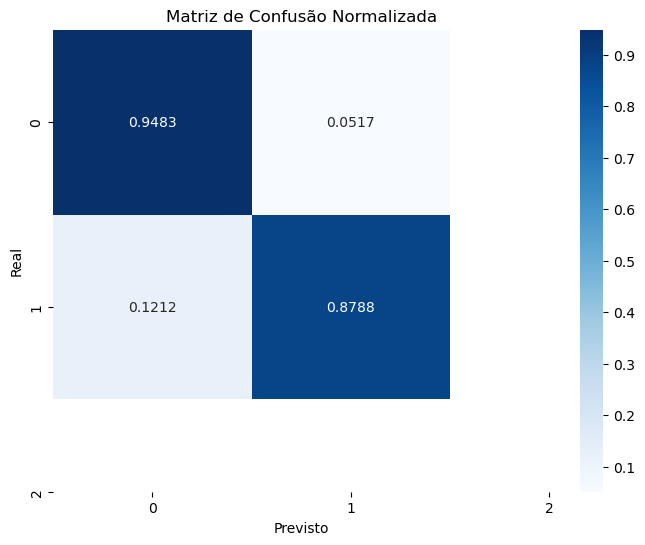

__________________________________________________________________________________ 
__________________________________ WEDA __________________________________________ 
Média Acurácia: 0.9458886085335745
Desvio Padrão Acurácia: 0.007778708808913468
Média Precisão: 0.6231598722872554
Desvio Padrão Precisão: 0.020742778646027773
Média Recall: 0.9259359145369317
Desvio Padrão Recall: 0.035012266106590875
Média F1-Score: 0.7442408470049182
Desvio Padrão F1-Score: 0.013425002861959408
Média Especificidade: 0.9477831366281084
Desvio Padrão Especificidade: 0.008530192979807312
Média AUC-ROC: 0.9763855295137409
Desvio Padrão AUC-ROC: 0.005952423315730959
Média e Desvio Padrão para WEDA:
Média:
[[0.94778314 0.05221686]
 [0.07406409 0.92593591]]
Desvio Padrão:
[[0.00853019 0.00853019]
 [0.03501227 0.03501227]]



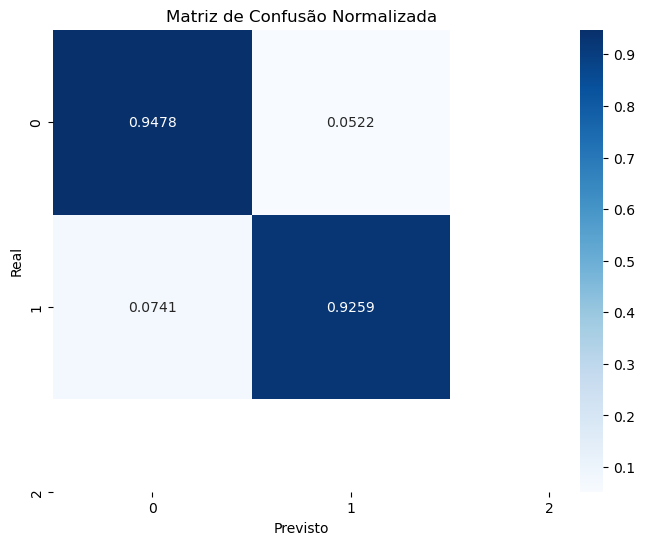

_______________________________________________________________________________________ 
__________________________________ Combinado __________________________________________ 
Média Acurácia: 0.6525228433027037
Desvio Padrão Acurácia: 0.03797793136495244
Média Precisão: 0.09643753369058732
Desvio Padrão Precisão: 0.014734979361882708
Média Recall: 0.8173017404669863
Desvio Padrão Recall: 0.06446370717457951
Média F1-Score: 0.1720781609177089
Desvio Padrão F1-Score: 0.02394365895682734
Média Especificidade: 0.6447835580856364
Desvio Padrão Especificidade: 0.04173578119401046
Média AUC-ROC: 0.8398820460302019
Desvio Padrão AUC-ROC: 0.02413201880625623
Média e Desvio Padrão para Combinado:
Média:
[[0.64478356 0.35521644]
 [0.18269826 0.81730174]]
Desvio Padrão:
[[0.04173578 0.04173578]
 [0.06446371 0.06446371]]


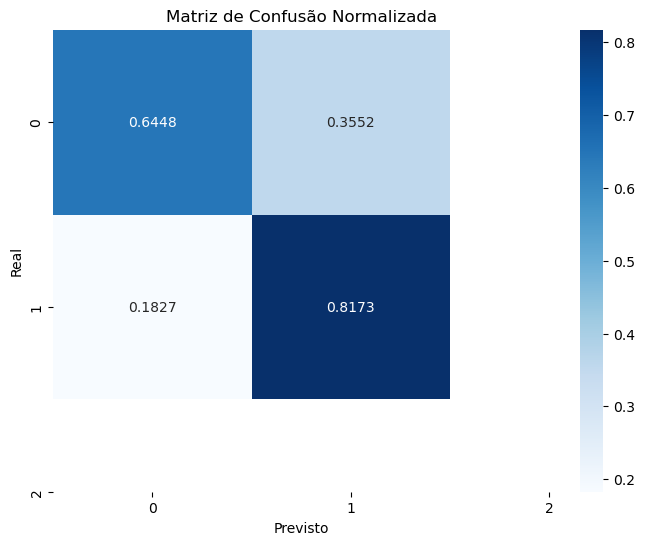

In [60]:
print("_________________________________________________________________________________ ")
print("__________________________________ UMA __________________________________________ ")

# Calcular médias e desvios padrão
media_acuracia_UMA = np.mean(acuracia_UMA)
desvio_padrao_acuracia_UMA = np.std(acuracia_UMA)
media_precisao_UMA = np.mean(precisao_UMA)
desvio_padrao_precisao_UMA = np.std(precisao_UMA)
media_recall_UMA = np.mean(recall_UMA)
desvio_padrao_recall_UMA = np.std(recall_UMA)
media_f1_UMA = np.mean(f1_UMA)
desvio_padrao_f1_UMA = np.std(f1_UMA)
media_specificity_UMA = np.mean(specificity_UMA)
desvio_padrao_specificity_UMA = np.std(specificity_UMA)
media_auc_roc_UMA = np.mean(auc_roc_UMA)
desvio_padrao_auc_roc_UMA = np.std(auc_roc_UMA)
# Calcule a média das contagens em cada célula da matriz de confusão
media_matriz_confusao_UMA = np.mean(matrizes_confusao_UMA, axis=0)
# Calcula a média e o desvio padrão para cada lista de matrizes de confusão normalizadas
media_UMA = np.mean(matrizes_confusao_UMA_norm, axis=0)
desvio_padrao_UMA = np.std(matrizes_confusao_UMA_norm, axis=0)




# Imprimir as médias e desvios padrão
print("Média Acurácia:", media_acuracia_UMA)
print("Desvio Padrão Acurácia:", desvio_padrao_acuracia_UMA)
print("Média Precisão:", media_precisao_UMA)
print("Desvio Padrão Precisão:", desvio_padrao_precisao_UMA)
print("Média Recall:", media_recall_UMA)
print("Desvio Padrão Recall:", desvio_padrao_recall_UMA)
print("Média F1-Score:", media_f1_UMA)
print("Desvio Padrão F1-Score:", desvio_padrao_f1_UMA)
print("Média Especificidade:", media_specificity_UMA)
print("Desvio Padrão Especificidade:", desvio_padrao_specificity_UMA)
print("Média AUC-ROC:", media_auc_roc_UMA)
print("Desvio Padrão AUC-ROC:", desvio_padrao_auc_roc_UMA)
# Imprime as médias e desvios padrão
print("Média e Desvio Padrão para UMA:")
print("Média:")
print(media_UMA)
print("Desvio Padrão:")
print(desvio_padrao_UMA)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media_UMA, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()




print("_________________________________________________________________________________ ")
print("__________________________________ UP ___________________________________________ ")


# Calcular médias e desvios padrão
media_acuracia_UP = np.mean(acuracia_UP)
desvio_padrao_acuracia_UP = np.std(acuracia_UP)
media_precisao_UP = np.mean(precisao_UP)
desvio_padrao_precisao_UP = np.std(precisao_UP)
media_recall_UP = np.mean(recall_UP)
desvio_padrao_recall_UP = np.std(recall_UP)
media_f1_UP = np.mean(f1_UP)
desvio_padrao_f1_UP = np.std(f1_UP)
media_specificity_UP = np.mean(specificity_UP)
desvio_padrao_specificity_UP = np.std(specificity_UP)
media_auc_roc_UP = np.mean(auc_roc_UP)
desvio_padrao_auc_roc_UP = np.std(auc_roc_UP)
# Calcule a média das contagens em cada célula da matriz de confusão
media_matriz_confusao_UP = np.mean(matrizes_confusao_UP, axis=0)
media_UP = np.mean(matrizes_confusao_UP_norm, axis=0)
desvio_padrao_UP = np.std(matrizes_confusao_UP_norm, axis=0)




# Imprimir as médias e desvios padrão
print("Média Acurácia:", media_acuracia_UP)
print("Desvio Padrão Acurácia:", desvio_padrao_acuracia_UP)
print("Média Precisão:", media_precisao_UP)
print("Desvio Padrão Precisão:", desvio_padrao_precisao_UP)
print("Média Recall:", media_recall_UP)
print("Desvio Padrão Recall:", desvio_padrao_recall_UP)
print("Média F1-Score:", media_f1_UP)
print("Desvio Padrão F1-Score:", desvio_padrao_f1_UP)
print("Média Especificidade:", media_specificity_UP)
print("Desvio Padrão Especificidade:", desvio_padrao_specificity_UP)
print("Média AUC-ROC:", media_auc_roc_UP)
print("Desvio Padrão AUC-ROC:", desvio_padrao_auc_roc_UP)
print("Média e Desvio Padrão para UP:")
print("Média:")
print(media_UP)
print("Desvio Padrão:")
print(desvio_padrao_UP)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media_UP, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()




print("__________________________________________________________________________________ ")
print("__________________________________ WEDA __________________________________________ ")


# Calcular médias e desvios padrão
media_acuracia_WEDA = np.mean(acuracia_WEDA)
desvio_padrao_acuracia_WEDA = np.std(acuracia_WEDA)
media_precisao_WEDA = np.mean(precisao_WEDA)
desvio_padrao_precisao_WEDA = np.std(precisao_WEDA)
media_recall_WEDA = np.mean(recall_WEDA)
desvio_padrao_recall_WEDA = np.std(recall_WEDA)
media_f1_WEDA = np.mean(f1_WEDA)
desvio_padrao_f1_WEDA = np.std(f1_WEDA)
media_specificity_WEDA = np.mean(specificity_WEDA)
desvio_padrao_specificity_WEDA = np.std(specificity_WEDA)
media_auc_roc_WEDA = np.mean(auc_roc_WEDA)
desvio_padrao_auc_roc_WEDA = np.std(auc_roc_WEDA)
# Calcule a média das contagens em cada célula da matriz de confusão
media_matriz_confusao_WEDA = np.mean(matrizes_confusao_WEDA, axis=0)
media_WEDA = np.mean(matrizes_confusao_WEDA_norm, axis=0)
desvio_padrao_WEDA = np.std(matrizes_confusao_WEDA_norm, axis=0)





# Imprimir as médias e desvios padrão
print("Média Acurácia:", media_acuracia_WEDA)
print("Desvio Padrão Acurácia:", desvio_padrao_acuracia_WEDA)
print("Média Precisão:", media_precisao_WEDA)
print("Desvio Padrão Precisão:", desvio_padrao_precisao_WEDA)
print("Média Recall:", media_recall_WEDA)
print("Desvio Padrão Recall:", desvio_padrao_recall_WEDA)
print("Média F1-Score:", media_f1_WEDA)
print("Desvio Padrão F1-Score:", desvio_padrao_f1_WEDA)
print("Média Especificidade:", media_specificity_WEDA)
print("Desvio Padrão Especificidade:", desvio_padrao_specificity_WEDA)
print("Média AUC-ROC:", media_auc_roc_WEDA)
print("Desvio Padrão AUC-ROC:", desvio_padrao_auc_roc_WEDA)
print("Média e Desvio Padrão para WEDA:")
print("Média:")
print(media_WEDA)
print("Desvio Padrão:")
print(desvio_padrao_WEDA)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media_WEDA, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()



print("_______________________________________________________________________________________ ")
print("__________________________________ Combinado __________________________________________ ")

# Calcular médias e desvios padrão
media_acuracia = np.mean(acuracia)
desvio_padrao_acuracia = np.std(acuracia)
media_precisao = np.mean(precisao)
desvio_padrao_precisao = np.std(precisao)
media_recall = np.mean(recall)
desvio_padrao_recall = np.std(recall)
media_f1 = np.mean(f1)
desvio_padrao_f1 = np.std(f1)
media_specificity = np.mean(specificity)
desvio_padrao_specificity = np.std(specificity)
media_auc_roc = np.mean(auc_roc)
desvio_padrao_auc_roc = np.std(auc_roc)
# Calcule a média das contagens em cada célula da matriz de confusão
media_matriz_confusao = np.mean(matrizes_confusao, axis=0)
media = np.mean(matrizes_confusao_norm, axis=0)
desvio_padrao = np.std(matrizes_confusao_norm, axis=0)


# Imprimir as médias e desvios padrão
print("Média Acurácia:", media_acuracia)
print("Desvio Padrão Acurácia:", desvio_padrao_acuracia)
print("Média Precisão:", media_precisao)
print("Desvio Padrão Precisão:", desvio_padrao_precisao)
print("Média Recall:", media_recall)
print("Desvio Padrão Recall:", desvio_padrao_recall)
print("Média F1-Score:", media_f1)
print("Desvio Padrão F1-Score:", desvio_padrao_f1)
print("Média Especificidade:", media_specificity)
print("Desvio Padrão Especificidade:", desvio_padrao_specificity)
print("Média AUC-ROC:", media_auc_roc)
print("Desvio Padrão AUC-ROC:", desvio_padrao_auc_roc)
print("Média e Desvio Padrão para Combinado:")
print("Média:")
print(media)
print("Desvio Padrão:")
print(desvio_padrao)
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

### ANN

101/101 [==============================] - 0s 3ms/step
Matriz de Confusão Normalizada UP - Fold 1:
[[0.99458943 0.00541057]
 [0.21538462 0.78461538]]


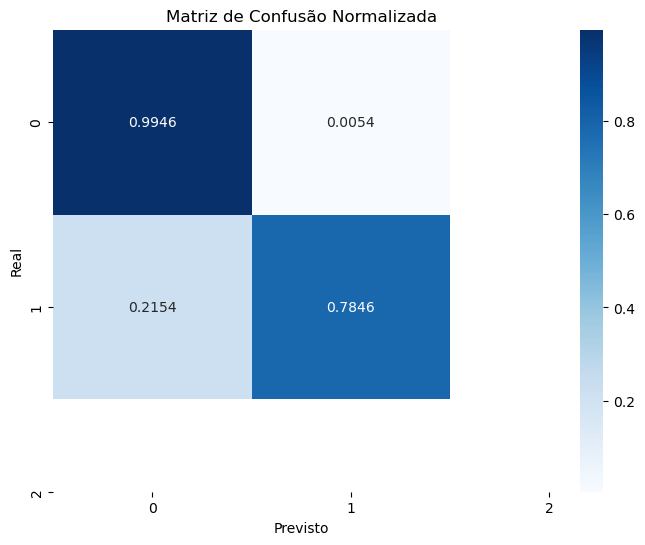


19/19 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UMA - Fold 1:
[[0.87144886 0.12855114]
 [0.01449275 0.98550725]]


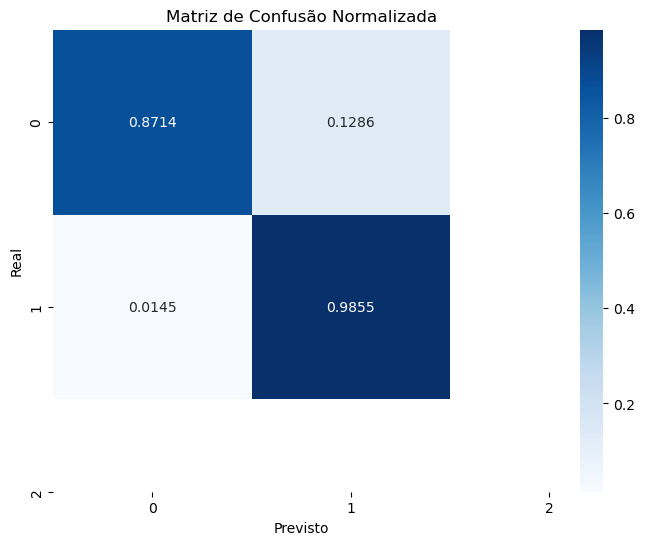


9/9 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada WEDA - Fold 1:
[[0.96077348 0.03922652]
 [0.04232804 0.95767196]]


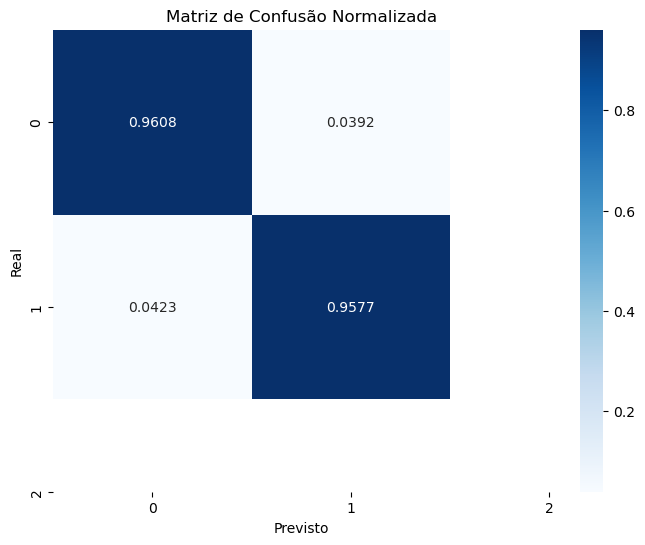


209/209 [==============================] - 1s 3ms/step
Matriz de Confusão Normalizada - Fold 1:
[[0.94292453 0.05707547]
 [0.12074303 0.87925697]]


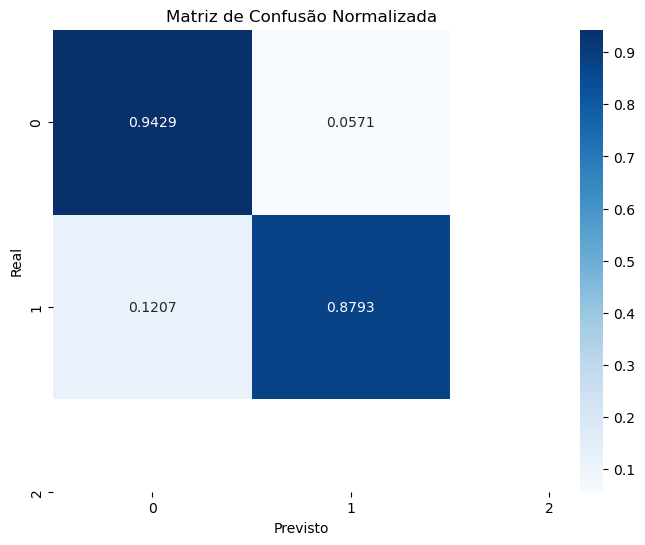


Treinamento e teste concluido: 1
98/98 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada UP - Fold 2:
[[0.99511082 0.00488918]
 [0.30232558 0.69767442]]


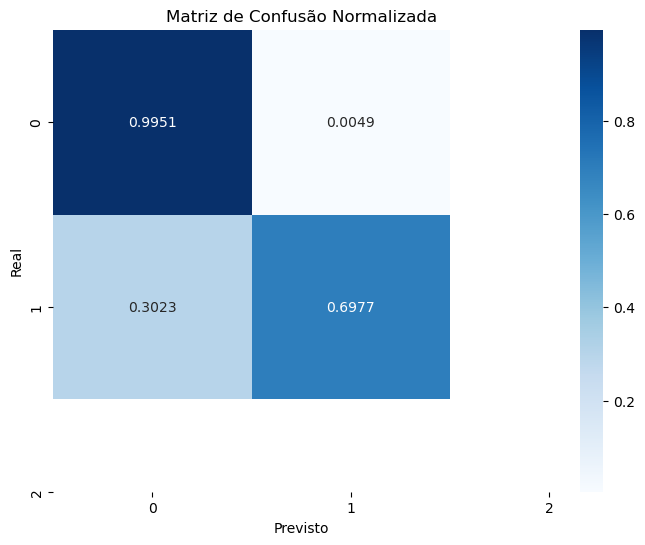


20/20 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada UMA - Fold 2:
[[0.87274042 0.12725958]
 [0.1372549  0.8627451 ]]


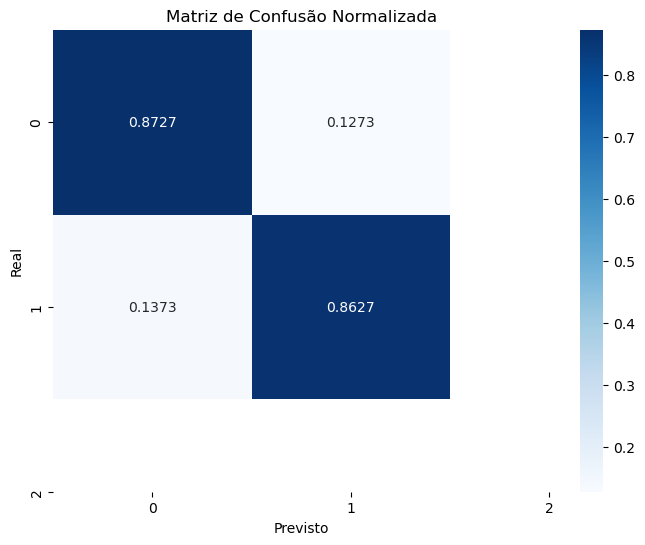


9/9 [==============================] - 0s 4ms/step
Matriz de Confusão Normalizada WEDA - Fold 2:
[[0.96923937 0.03076063]
 [0.02747253 0.97252747]]


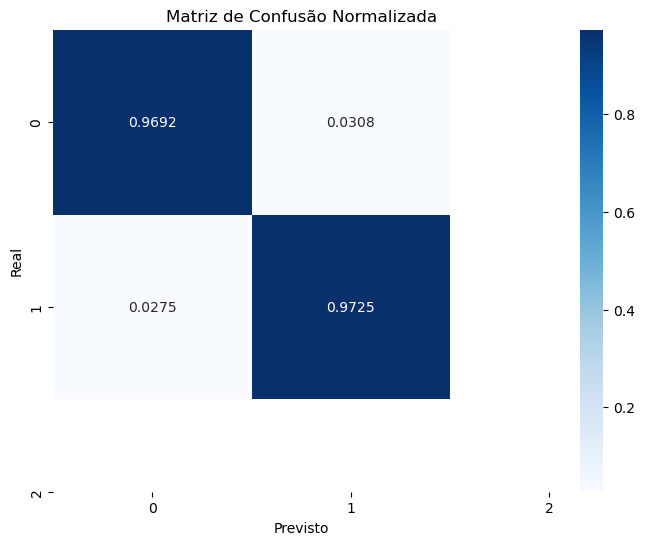


206/206 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada - Fold 2:
[[0.95816637 0.04183363]
 [0.0764526  0.9235474 ]]


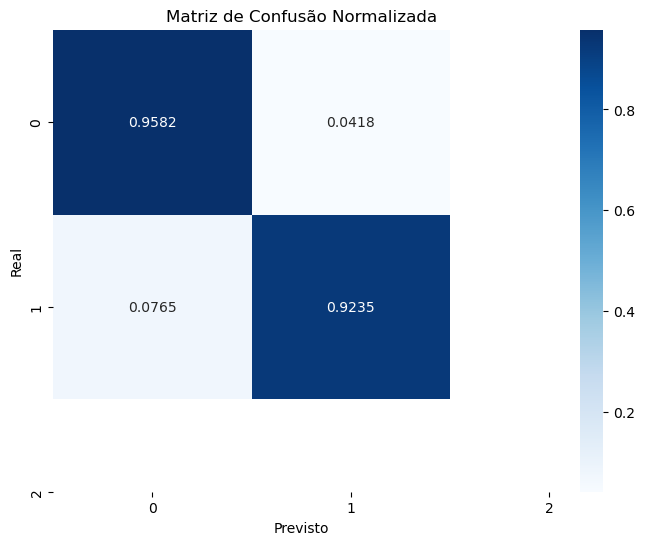


Treinamento e teste concluido: 2
111/111 [==============================] - 0s 3ms/step
Matriz de Confusão Normalizada UP - Fold 3:
[[0.9951051  0.0048949 ]
 [0.05769231 0.94230769]]


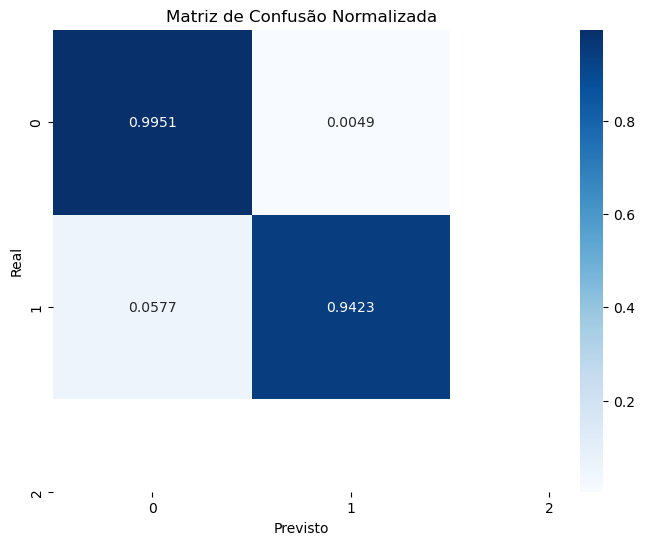


22/22 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada UMA - Fold 3:
[[0.89166667 0.10833333]
 [0.09574468 0.90425532]]


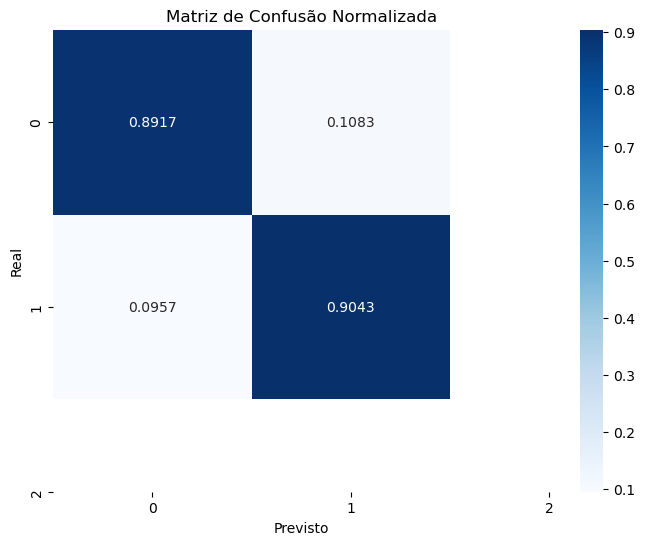


9/9 [==============================] - 0s 3ms/step
Matriz de Confusão Normalizada WEDA - Fold 3:
[[0.96260069 0.03739931]
 [0.06077348 0.93922652]]


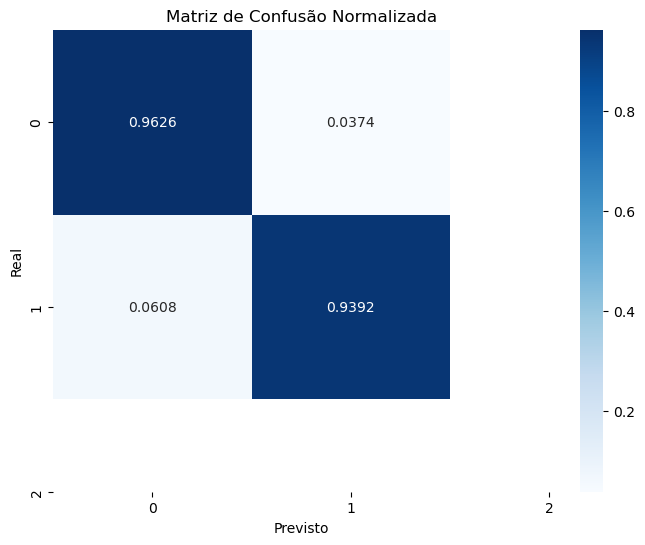


222/222 [==============================] - 1s 2ms/step
Matriz de Confusão Normalizada - Fold 3:
[[0.96425934 0.03574066]
 [0.09174312 0.90825688]]


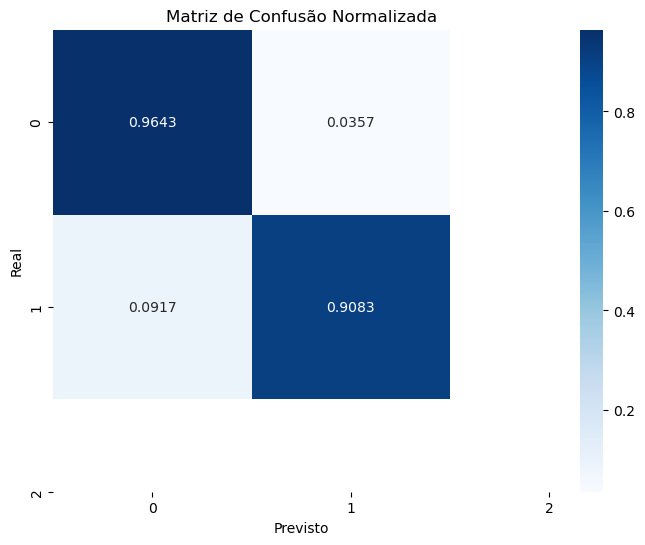


Treinamento e teste concluido: 3
99/99 [==============================] - 0s 3ms/step
Matriz de Confusão Normalizada UP - Fold 4:
[[0.9878633  0.0121367 ]
 [0.32432432 0.67567568]]


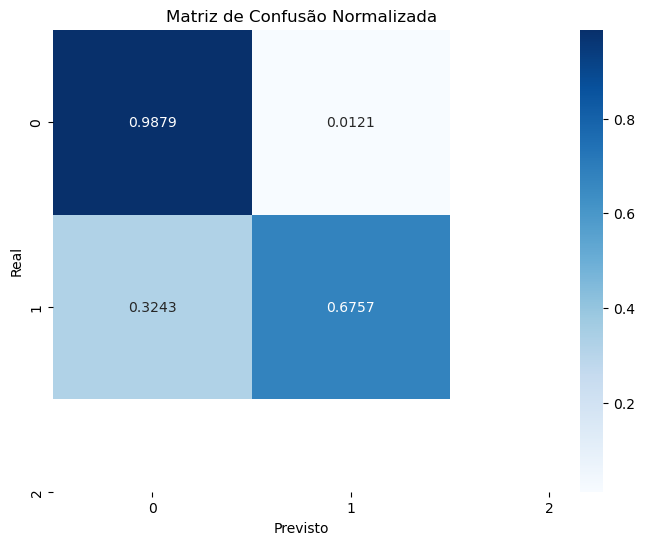


19/19 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada UMA - Fold 4:
[[0.8346628  0.1653372 ]
 [0.01515152 0.98484848]]


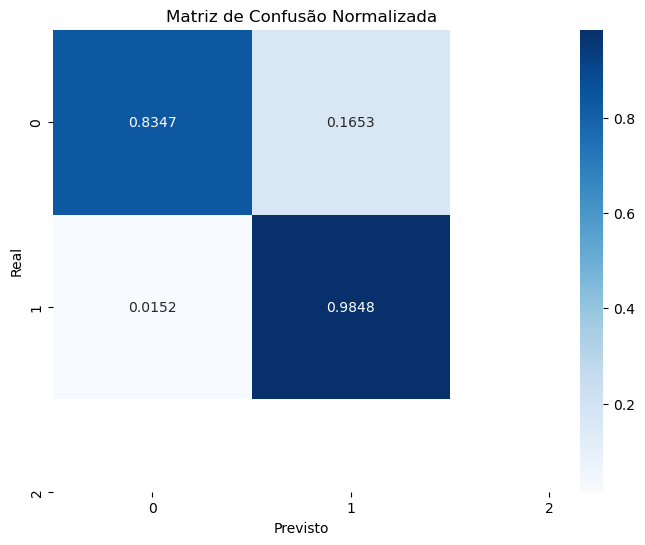


10/10 [==============================] - 0s 4ms/step
Matriz de Confusão Normalizada WEDA - Fold 4:
[[0.95674562 0.04325438]
 [0.05752212 0.94247788]]


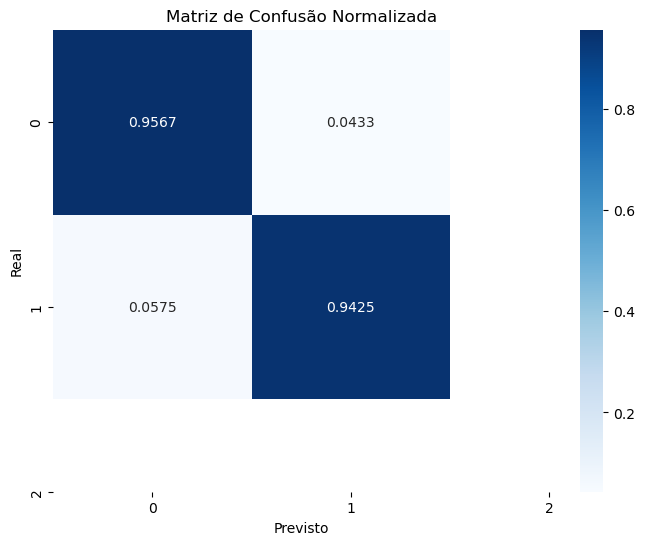


212/212 [==============================] - 1s 3ms/step
Matriz de Confusão Normalizada - Fold 4:
[[0.95582765 0.04417235]
 [0.11246201 0.88753799]]


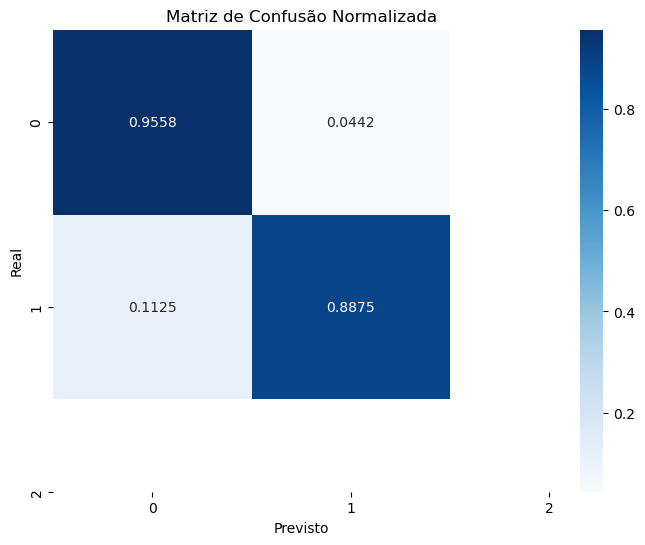


Treinamento e teste concluido: 4
95/95 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada UP - Fold 5:
[[0.99263722 0.00736278]
 [0.07142857 0.92857143]]


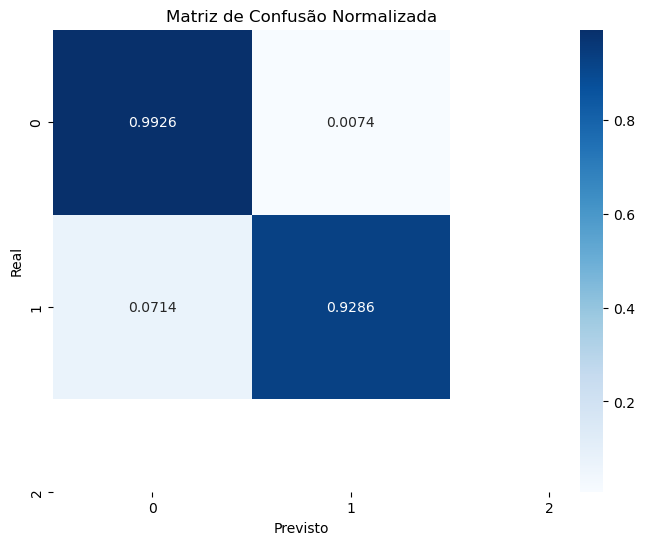


20/20 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada UMA - Fold 5:
[[0.86893555 0.13106445]
 [0.025      0.975     ]]


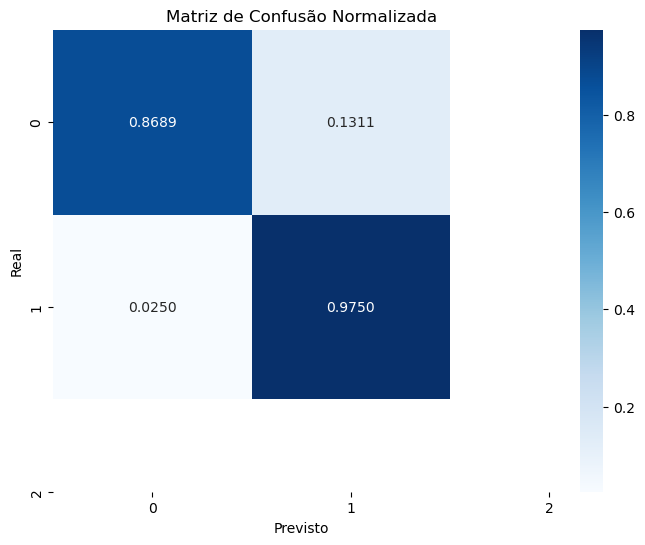


9/9 [==============================] - 0s 3ms/step
Matriz de Confusão Normalizada WEDA - Fold 5:
[[0.96273292 0.03726708]
 [0.0472973  0.9527027 ]]


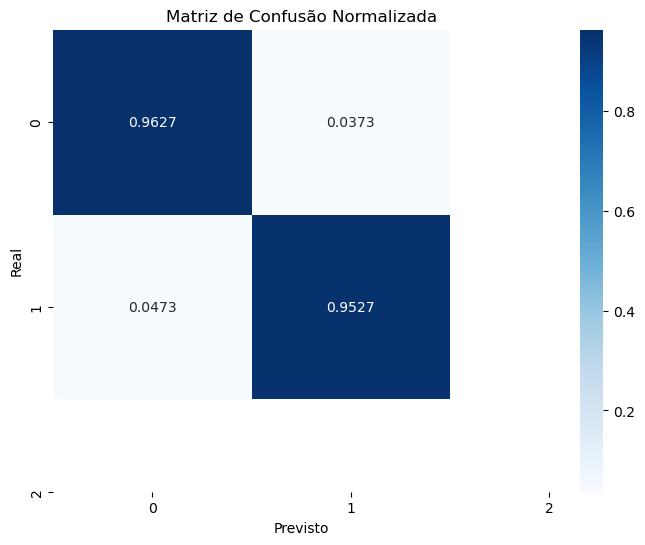


207/207 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada - Fold 5:
[[0.95334074 0.04665926]
 [0.07741935 0.92258065]]


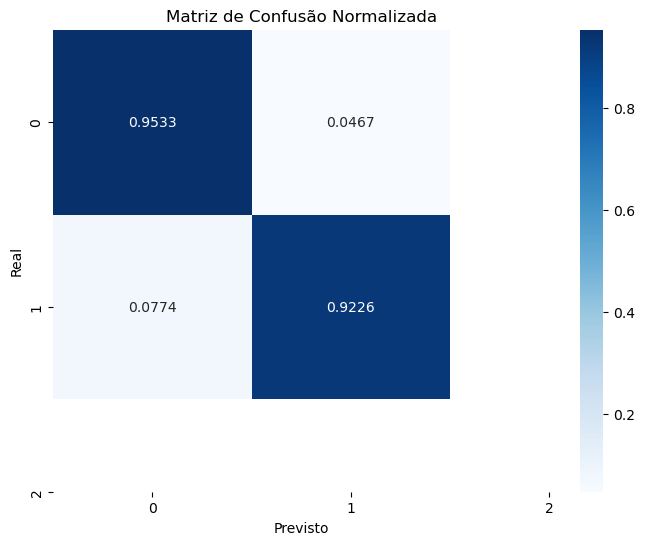


Treinamento e teste concluido: 5
99/99 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UP - Fold 6:
[[0.99002574 0.00997426]
 [0.         1.        ]]


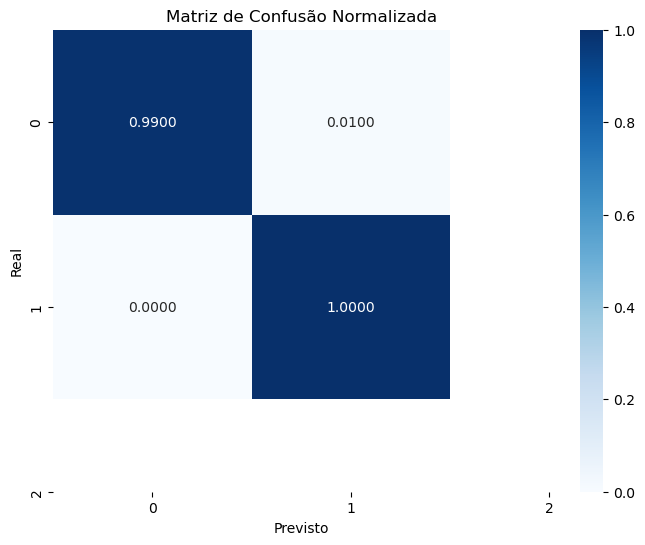


19/19 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UMA - Fold 6:
[[0.88961988 0.11038012]
 [0.08695652 0.91304348]]


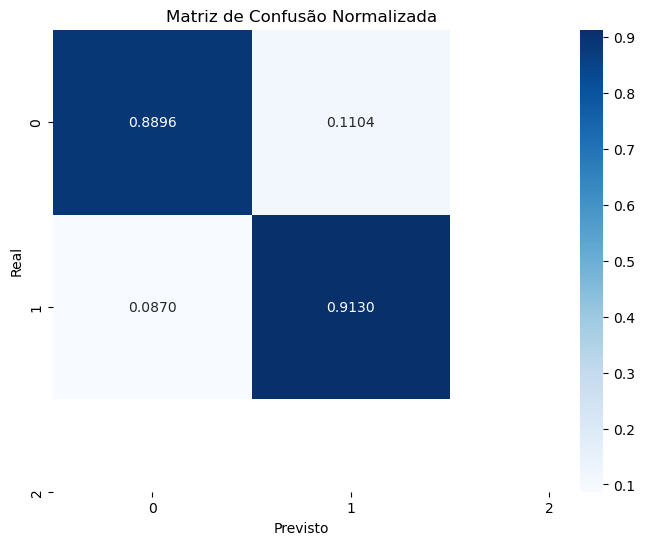


8/8 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada WEDA - Fold 6:
[[0.96343693 0.03656307]
 [0.0441989  0.9558011 ]]


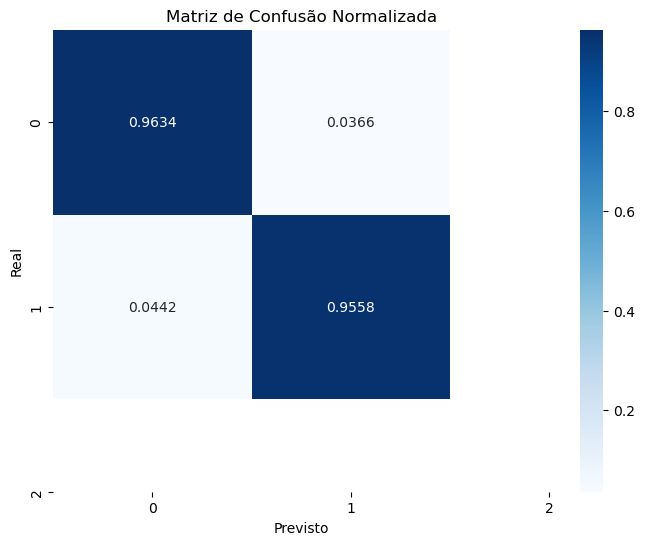


201/201 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada - Fold 6:
[[0.97400687 0.02599313]
 [0.15384615 0.84615385]]


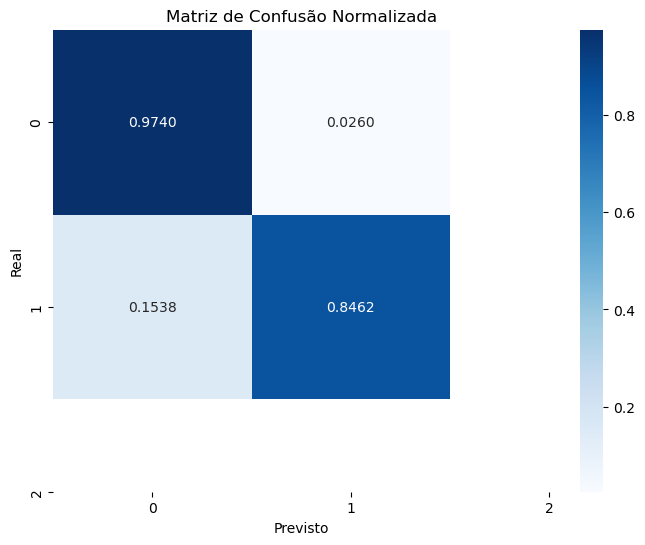


Treinamento e teste concluido: 6
90/90 [==============================] - 0s 936us/step
Matriz de Confusão Normalizada UP - Fold 7:
[[0.99751332 0.00248668]
 [0.19642857 0.80357143]]


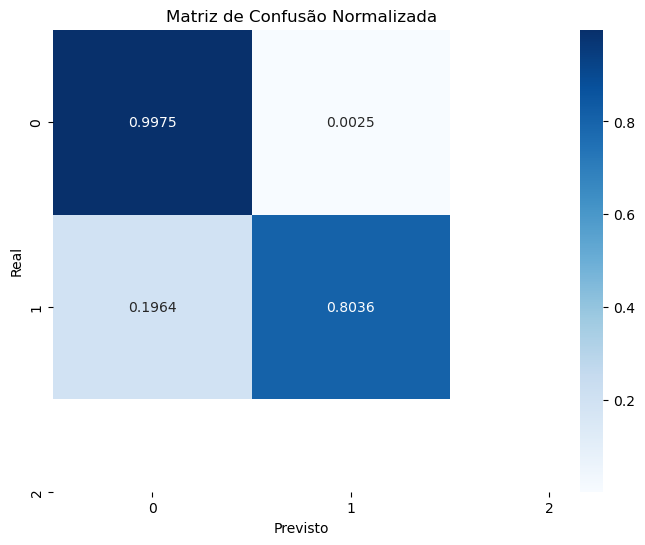


18/18 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UMA - Fold 7:
[[0.90736342 0.09263658]
 [0.26506024 0.73493976]]


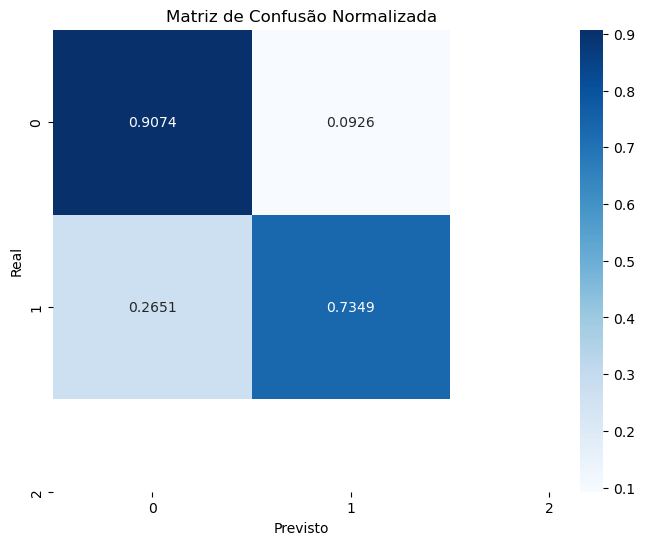


9/9 [==============================] - 0s 2ms/step
Matriz de Confusão Normalizada WEDA - Fold 7:
[[0.96763577 0.03236423]
 [0.00487805 0.99512195]]


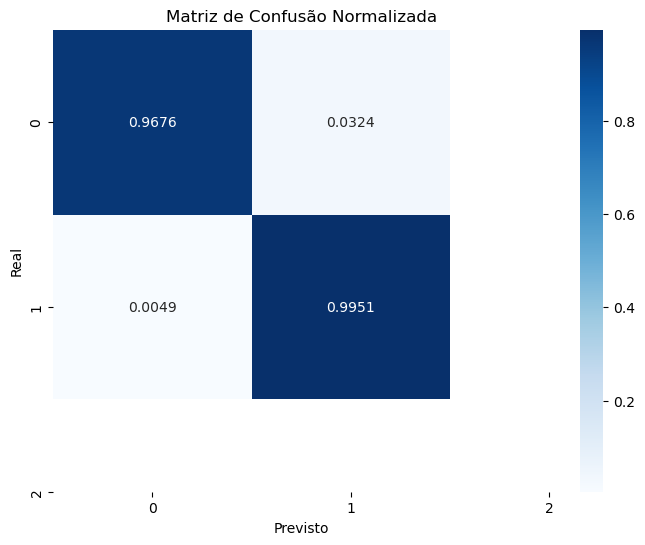


196/196 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada - Fold 7:
[[0.97576682 0.02423318]
 [0.17732558 0.82267442]]


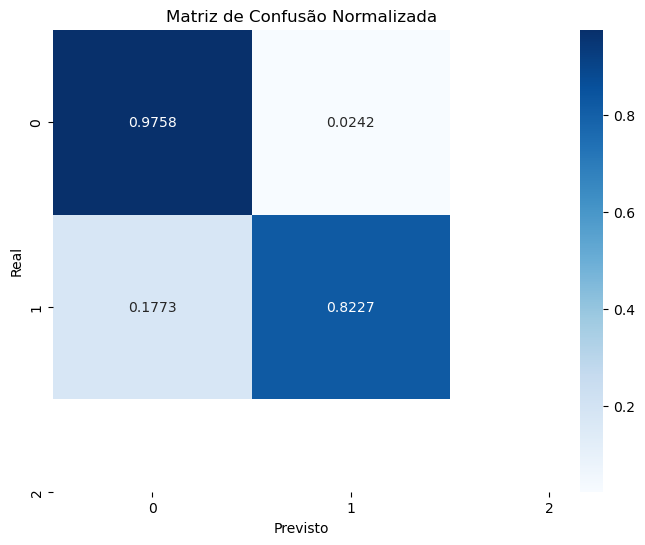


Treinamento e teste concluido: 7
80/80 [==============================] - 0s 906us/step
Matriz de Confusão Normalizada UP - Fold 8:
[[0.99355099 0.00644901]
 [0.11111111 0.88888889]]


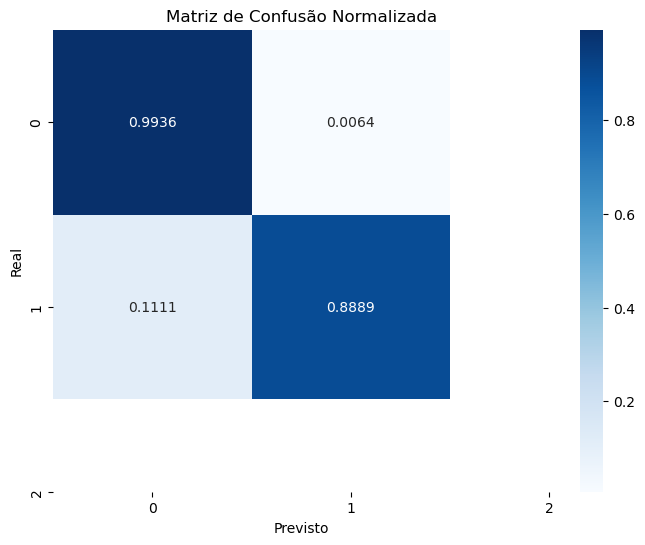


19/19 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UMA - Fold 8:
[[0.96348733 0.03651267]
 [0.05555556 0.94444444]]


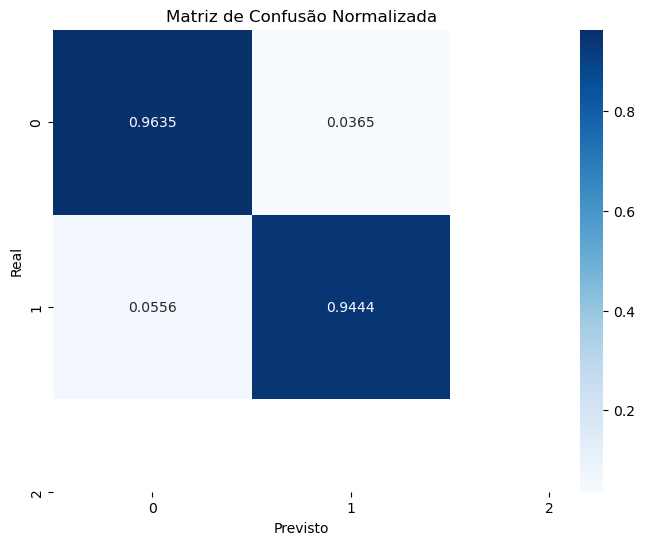


9/9 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada WEDA - Fold 8:
[[0.9739223  0.0260777 ]
 [0.02597403 0.97402597]]


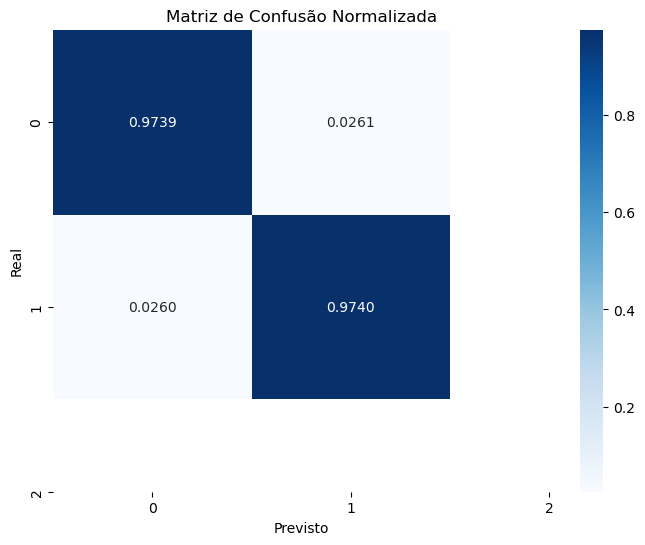


187/187 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada - Fold 8:
[[0.97667485 0.02332515]
 [0.2        0.8       ]]


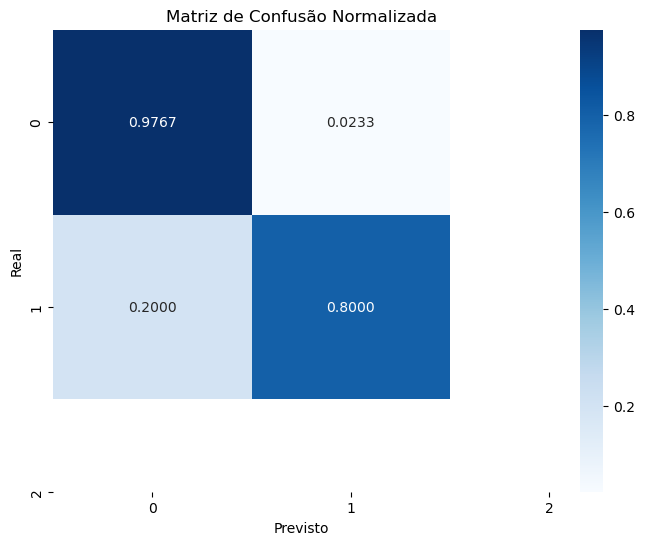


Treinamento e teste concluido: 8
104/104 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UP - Fold 9:
[[0.99725526 0.00274474]
 [0.10416667 0.89583333]]


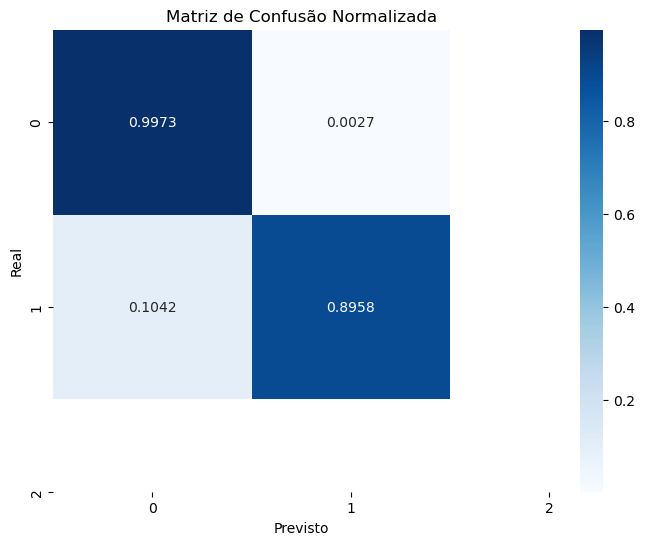


19/19 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UMA - Fold 9:
[[0.80785714 0.19214286]
 [0.05128205 0.94871795]]


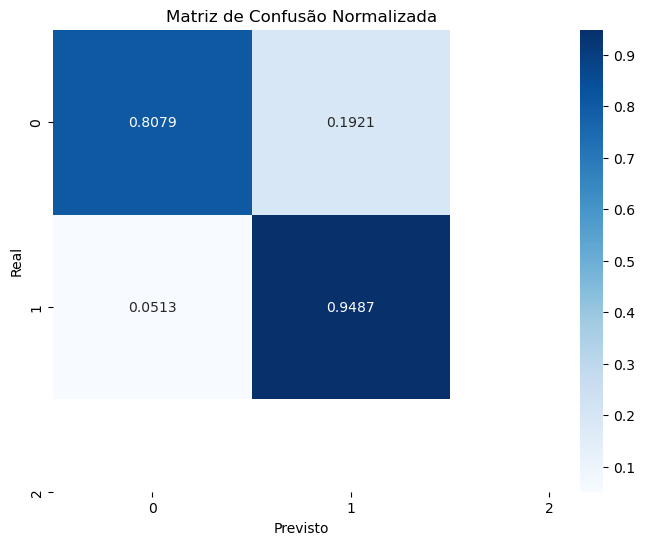


10/10 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada WEDA - Fold 9:
[[0.97446374 0.02553626]
 [0.01785714 0.98214286]]


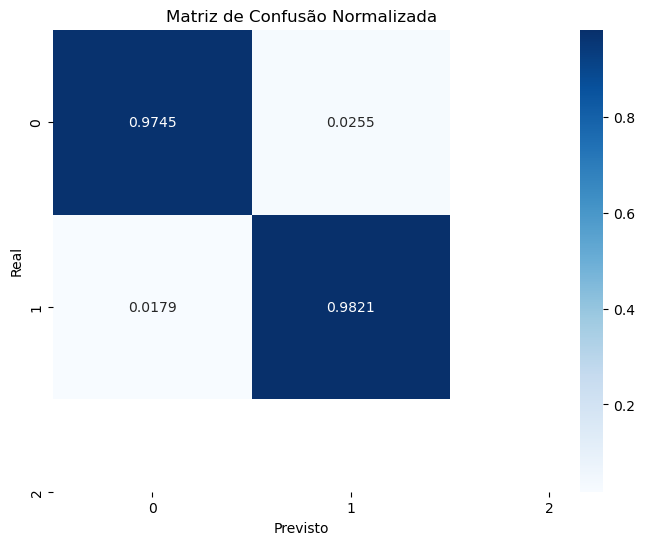


217/217 [==============================] - 0s 996us/step
Matriz de Confusão Normalizada - Fold 9:
[[0.97363267 0.02636733]
 [0.14965986 0.85034014]]


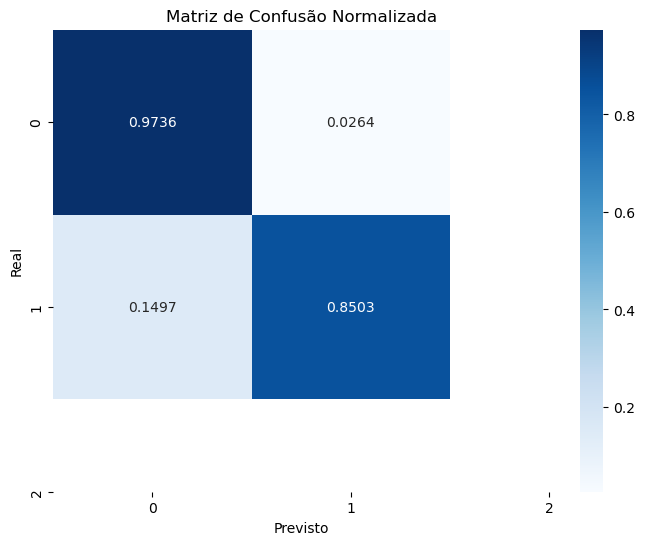


Treinamento e teste concluido: 9
95/95 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UP - Fold 10:
[[0.99764468 0.00235532]
 [0.25862069 0.74137931]]


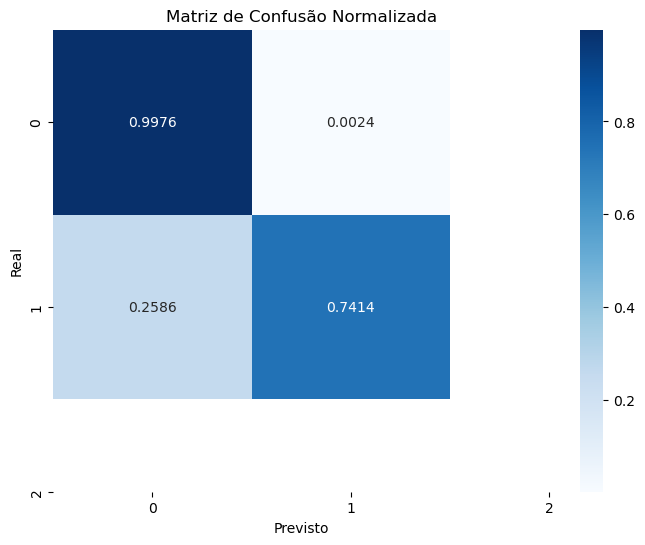


18/18 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada UMA - Fold 10:
[[0.80572289 0.19427711]
 [0.06349206 0.93650794]]


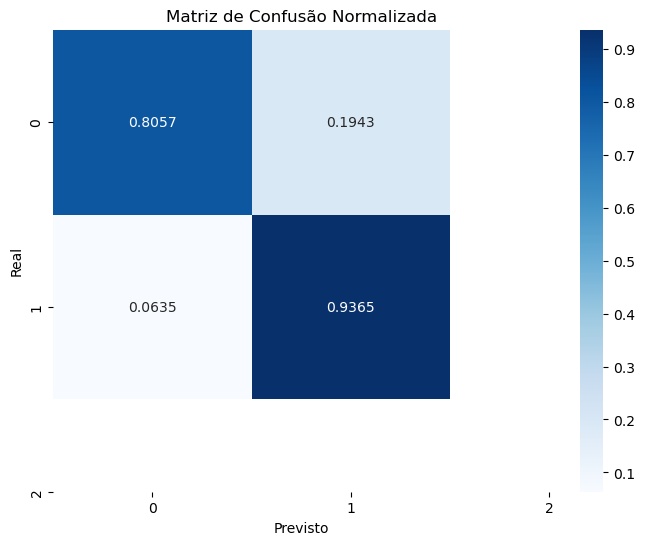


9/9 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada WEDA - Fold 10:
[[0.96111111 0.03888889]
 [0.01923077 0.98076923]]


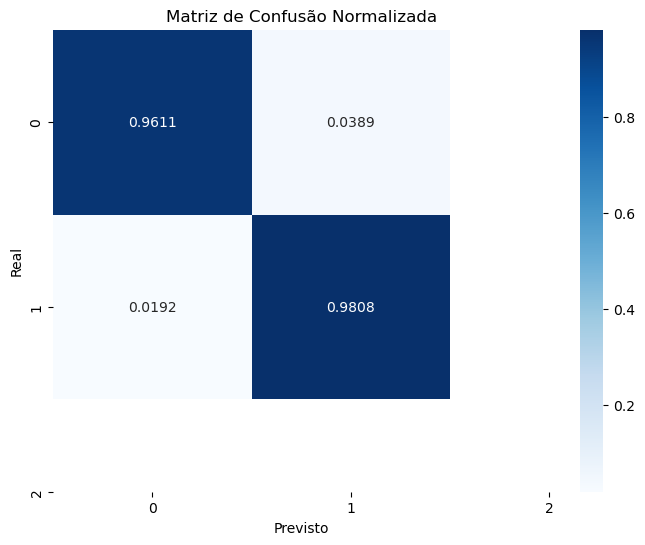


201/201 [==============================] - 0s 1ms/step
Matriz de Confusão Normalizada - Fold 10:
[[0.97147541 0.02852459]
 [0.18237082 0.81762918]]


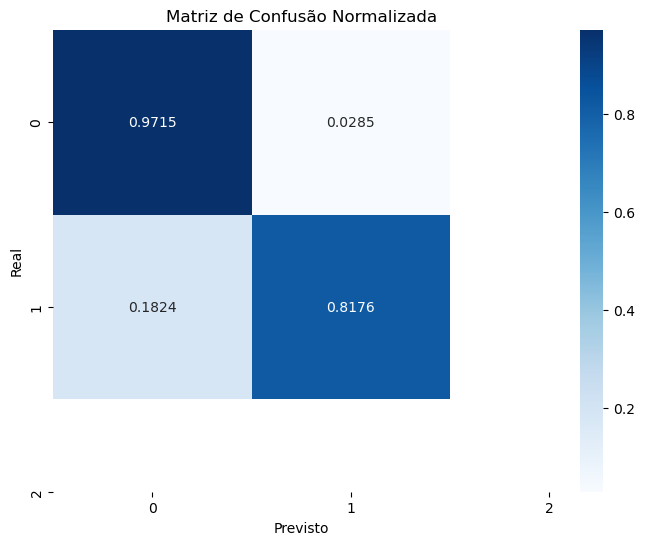


Treinamento e teste concluido: 10


In [95]:
"""
This code trains and evaluates artificial neural network models on a dataset divided into three different 
parts using three different data preprocessing methods (UMA, UP, and WEDA). The main steps of the code are as follows:

1. It initializes dictionaries and empty lists to store evaluation metrics (accuracy, precision, recall, F1-score, 
specificity, area under the ROC curve) and normalized confusion matrices for each repetition of the training and testing process.

2. It then runs a loop of 10 repetitions, where for each repetition:
   - It splits the data into training and testing sets for each preprocessing method.
   - Combines the training sets of the three methods to train a neural network model.
   - Evaluates the model on the corresponding testing sets for each preprocessing method.
   - Calculates evaluation metrics (accuracy, precision, recall, F1-score, specificity, area under the ROC curve) 
   and the normalized confusion matrix for each method.
   - Stores the metrics and normalized confusion matrices in lists for further analysis.

3. Finally, it displays the normalized confusion matrices for each preprocessing method and for the combined method, 
as well as stores the evaluation metrics in dictionaries for further analysis.
"""




# Listas para armazenar as métricas de cada repetição
metricas_repeticoes = {
    'acuracia': [],
    'precisao': [],
    'recall': [],
    'f1': [],
    'especificidade': [],
    'auc_roc': [],
    'matriz_normalizada': []
}

metricas_repeticoes_UMA = {
    'acuracia': [],
    'precisao': [],
    'recall': [],
    'f1': [],
    'especificidade': [],
    'auc_roc': [],
    'matriz_normalizada': []
}

metricas_repeticoes_UP = {
    'acuracia': [],
    'precisao': [],
    'recall': [],
    'f1': [],
    'especificidade': [],
    'auc_roc': [],
    'matriz_normalizada': []
}
metricas_repeticoes_WEDA = {
    'acuracia': [],
    'precisao': [],
    'recall': [],
    'f1': [],
    'especificidade': [],
    'auc_roc': [],
    'matriz_normalizada': []
}

matrizes_confusao_UMA_norm = []
matrizes_confusao_UP_norm = []
matrizes_confusao_WEDA_norm = []
matrizes_confusao_norm = []



# Repetir o processo 10 vezes
for i in range(10):
    # Obter as partições correspondentes
    X_train_UMA, y_train_UMA, X_test_UMA, y_test_UMA = partitions_UMA[i]
    X_train_UP, y_train_UP, X_test_UP, y_test_UP = partitions_UP[i]
    X_train_WEDA, y_train_WEDA, X_test_WEDA, y_test_WEDA = partitions_WEDA[i]
    # Carregar dados de treinamento, validação e teste
    X_train = pd.concat([X_train_UMA, X_train_WEDA, X_train_UP ], axis=0, ignore_index=True)
    y_train =  pd.concat([y_train_UMA, y_train_WEDA, y_train_UP ], axis=0, ignore_index=True)
    X_test = pd.concat([X_test_UMA, X_test_WEDA, X_test_UP ], axis=0, ignore_index=True)
    y_test =  pd.concat([y_test_UMA, y_test_WEDA, y_test_UP ], axis=0, ignore_index=True)
    
    
    
    
    X_train_UMA, X_test_UMA = X_train_UMA[features_UMA], X_test_UMA[features_UMA] 
    X_train_UP, X_test_UP = X_train_UP[features_UP], X_test_UP[features_UP] 
    X_train_WEDA, X_test_WEDA = X_train_WEDA[features_WEDA], X_test_WEDA[features_WEDA] 
    X_train, X_test = X_train[combined_features], X_test[combined_features] 
    
    
    

    #   UP   _________________________________________________________________________________________________

    # Treinamento do modelo
    model_ann_UP_history = model_ann_UP.fit(X_train_UP, y_train_UP, batch_size=BATCH_SIZE_UP,
                                            epochs=EPOCHS_UP, class_weight=class_weight_UP, verbose=0)
    # Avaliação do modelo
    teste_predictions_UP = model_ann_UP.predict(X_test_UP, batch_size=BATCH_SIZE_UP)
    
    # Calcule as métricas
    acuracia = accuracy_score(y_test_UP, teste_predictions_UP > 0.5)
    precisao = precision_score(y_test_UP, teste_predictions_UP > 0.5)
    recall = recall_score(y_test_UP, teste_predictions_UP > 0.5)
    f1 = f1_score(y_test_UP, teste_predictions_UP > 0.5)
    
    conf_matrix = confusion_matrix(y_test_UP, teste_predictions_UP > 0.5)
    tn, fp, fn, tp = conf_matrix.ravel()
    especificidade = tn / (tn + fp)
    
    y_pred_prob_UP = model_ann_UP.predict(X_test_UP, batch_size=BATCH_SIZE_UP)
    auc_roc = roc_auc_score(y_test_UP, y_pred_prob_UP)
    
    # Calcule a matriz de confusão normalizada
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    matrizes_confusao_UP_norm.append(conf_matrix_normalized)
    # Imprimir a matriz de confusão normalizada
    print(f"Matriz de Confusão Normalizada UP - Fold {i + 1}:")
    print(conf_matrix_normalized)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    print()


    
    
    # Armazenar as métricas da execução atual
    metricas_repeticoes_UP['acuracia'].append(acuracia)
    metricas_repeticoes_UP['precisao'].append(precisao)
    metricas_repeticoes_UP['recall'].append(recall)
    metricas_repeticoes_UP['f1'].append(f1)
    metricas_repeticoes_UP['especificidade'].append(especificidade)
    metricas_repeticoes_UP['auc_roc'].append(auc_roc)
    metricas_repeticoes_UP['matriz_normalizada'].append(conf_matrix_normalized)
    
    
    #   UMA   _________________________________________________________________________________________________

    # Treinamento do modelo
    model_ann_UMA_history = model_ann_UMA.fit(X_train_UMA, y_train_UMA, batch_size=BATCH_SIZE_UMA,
                                            epochs=EPOCHS_UMA, class_weight=class_weight_UMA, verbose=0)
    # Avaliação do modelo
    teste_predictions_UMA = model_ann_UMA.predict(X_test_UMA, batch_size=BATCH_SIZE_UMA)
    
    # Calcule as métricas
    acuracia = accuracy_score(y_test_UMA, teste_predictions_UMA > 0.5)
    precisao = precision_score(y_test_UMA, teste_predictions_UMA > 0.5)
    recall = recall_score(y_test_UMA, teste_predictions_UMA > 0.5)
    f1 = f1_score(y_test_UMA, teste_predictions_UMA > 0.5)
    
    conf_matrix = confusion_matrix(y_test_UMA, teste_predictions_UMA > 0.5)
    tn, fp, fn, tp = conf_matrix.ravel()
    especificidade = tn / (tn + fp)
    
    y_pred_prob_UMA = model_ann_UMA.predict(X_test_UMA, batch_size=BATCH_SIZE_UMA)
    auc_roc = roc_auc_score(y_test_UMA, y_pred_prob_UMA)
    
     # Calcule a matriz de confusão normalizada
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    matrizes_confusao_UMA_norm.append(conf_matrix_normalized)
    # Imprimir a matriz de confusão normalizada
    print(f"Matriz de Confusão Normalizada UMA - Fold {i + 1}:")
    print(conf_matrix_normalized)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    print()

    # Armazenar as métricas da execução atual
    metricas_repeticoes_UMA['acuracia'].append(acuracia)
    metricas_repeticoes_UMA['precisao'].append(precisao)
    metricas_repeticoes_UMA['recall'].append(recall)
    metricas_repeticoes_UMA['f1'].append(f1)
    metricas_repeticoes_UMA['especificidade'].append(especificidade)
    metricas_repeticoes_UMA['auc_roc'].append(auc_roc)
    metricas_repeticoes_UMA['matriz_normalizada'].append(conf_matrix_normalized)
    
    #   WEDA   _________________________________________________________________________________________________

    # Treinamento do modelo
    model_ann_WEDA_history = model_ann_WEDA.fit(X_train_WEDA, y_train_WEDA, batch_size=BATCH_SIZE_WEDA,
                                            epochs=EPOCHS_WEDA, class_weight=class_weight_WEDA, verbose=0)
    # Avaliação do modelo
    teste_predictions_WEDA = model_ann_WEDA.predict(X_test_WEDA, batch_size=BATCH_SIZE_WEDA)
    
    # Calcule as métricas
    acuracia = accuracy_score(y_test_WEDA, teste_predictions_WEDA > 0.5)
    precisao = precision_score(y_test_WEDA, teste_predictions_WEDA > 0.5)
    recall = recall_score(y_test_WEDA, teste_predictions_WEDA > 0.5)
    f1 = f1_score(y_test_WEDA, teste_predictions_WEDA > 0.5)
    
    conf_matrix = confusion_matrix(y_test_WEDA, teste_predictions_WEDA > 0.5)
    tn, fp, fn, tp = conf_matrix.ravel()
    especificidade = tn / (tn + fp)
    
    y_pred_prob_WEDA = model_ann_WEDA.predict(X_test_WEDA, batch_size=BATCH_SIZE_WEDA)
    auc_roc = roc_auc_score(y_test_WEDA, y_pred_prob_WEDA)
    
    # Calcule a matriz de confusão normalizada
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    matrizes_confusao_WEDA_norm.append(conf_matrix_normalized)
    # Imprimir a matriz de confusão normalizada
    print(f"Matriz de Confusão Normalizada WEDA - Fold {i + 1}:")
    print(conf_matrix_normalized)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    print()


    
    # Armazenar as métricas da execução atual
    metricas_repeticoes_WEDA['acuracia'].append(acuracia)
    metricas_repeticoes_WEDA['precisao'].append(precisao)
    metricas_repeticoes_WEDA['recall'].append(recall)
    metricas_repeticoes_WEDA['f1'].append(f1)
    metricas_repeticoes_WEDA['especificidade'].append(especificidade)
    metricas_repeticoes_WEDA['auc_roc'].append(auc_roc)
    metricas_repeticoes_WEDA['matriz_normalizada'].append(conf_matrix_normalized)

    
    
    #      _________________________________________________________________________________________________

    # Treinamento do modelo
    model_ann_history = model_ann.fit(X_train, y_train, batch_size=BATCH_SIZE,
                                            epochs=EPOCHS, class_weight=class_weight, verbose=0)
    # Avaliação do modelo
    teste_predictions = model_ann.predict(X_test, batch_size=BATCH_SIZE)
    
    # Calcule as métricas
    acuracia = accuracy_score(y_test, teste_predictions > 0.5)
    precisao = precision_score(y_test, teste_predictions > 0.5)
    recall = recall_score(y_test, teste_predictions > 0.5)
    f1 = f1_score(y_test, teste_predictions > 0.5)
    
    conf_matrix = confusion_matrix(y_test, teste_predictions > 0.5)
    tn, fp, fn, tp = conf_matrix.ravel()
    especificidade = tn / (tn + fp)
    
    y_pred_prob = model_ann.predict(X_test, batch_size=BATCH_SIZE)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    
    # Calcule a matriz de confusão normalizada
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    # Imprimir a matriz de confusão normalizada
    matrizes_confusao_norm.append(conf_matrix_normalized)
    
    print(f"Matriz de Confusão Normalizada - Fold {i + 1}:")
    print(conf_matrix_normalized)
    # Cria um mapa de calor para visualização
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt=".4f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    print()

    # Armazenar as métricas da execução atual
    metricas_repeticoes['acuracia'].append(acuracia)
    metricas_repeticoes['precisao'].append(precisao)
    metricas_repeticoes['recall'].append(recall)
    metricas_repeticoes['f1'].append(f1)
    metricas_repeticoes['especificidade'].append(especificidade)
    metricas_repeticoes['auc_roc'].append(auc_roc)
    metricas_repeticoes['matriz_normalizada'].append(conf_matrix_normalized)

    
    print("Treinamento e teste concluido:",i+1)







_____________________________________UP________________________________________________
Média de acuracia: 0.99153584
Média de precisao: 0.70547111
Média de recall: 0.83585176
Média de f1: 0.75553108
Média de especificidade: 0.99412959
Média de auc_roc: 0.99257917
Média de matriz_normalizada: 0.50000000
Desvio Padrão de acuracia: 0.00299124
Desvio Padrão de precisao: 0.13880751
Desvio Padrão de recall: 0.10517926
Desvio Padrão de f1: 0.10003742
Desvio Padrão de especificidade: 0.00307199
Desvio Padrão de auc_roc: 0.00892785
Desvio Padrão de matriz_normalizada: 0.42897119
Média e Desvio Padrão para UP:
Média:
[[0.99412959 0.00587041]
 [0.16414824 0.83585176]]
Desvio Padrão:
[[0.00307199 0.00307199]
 [0.10517926 0.10517926]]



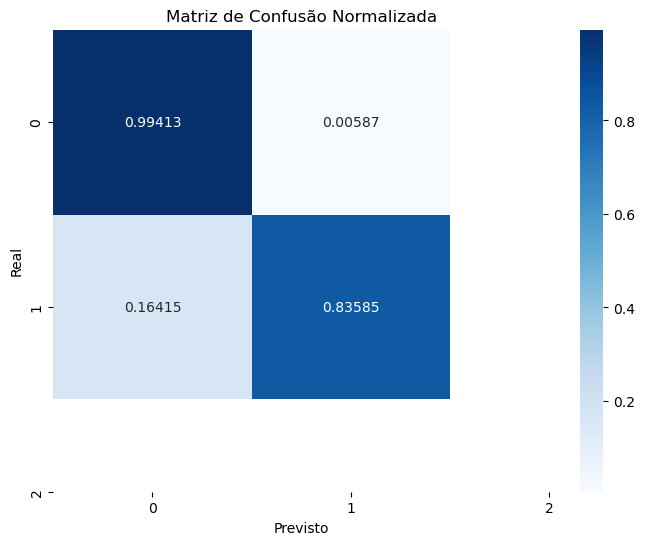

___________________________________UMA________________________________________________
Média de acuracia: 0.87374326
Média de precisao: 0.32387352
Média de recall: 0.91900097
Média de f1: 0.46818200
Média de especificidade: 0.87135050
Média de auc_roc: 0.95653215
Média de matriz_normalizada: 0.50000000
Desvio Padrão de acuracia: 0.04170645
Desvio Padrão de precisao: 0.10783553
Desvio Padrão de recall: 0.07143389
Desvio Padrão de f1: 0.11207027
Desvio Padrão de especificidade: 0.04497198
Desvio Padrão de auc_roc: 0.01837564
Desvio Padrão de matriz_normalizada: 0.40036751
Média e Desvio Padrão para UMA:
Média:
[[0.8713505  0.1286495 ]
 [0.08099903 0.91900097]]
Desvio Padrão:
[[0.04497198 0.04497198]
 [0.07143389 0.07143389]]



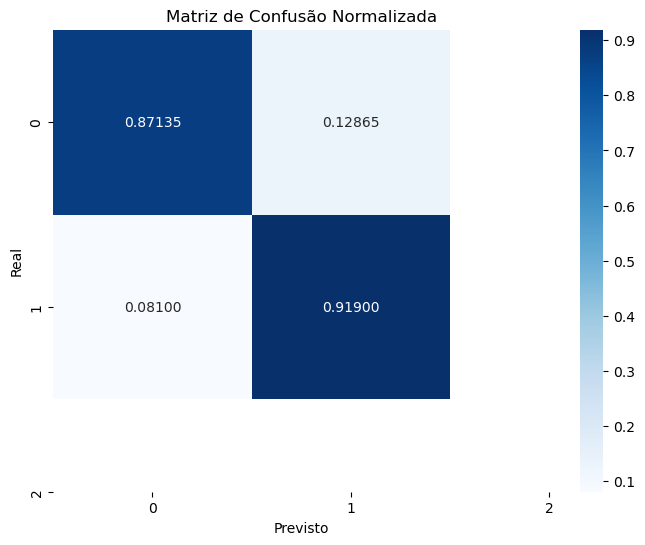

_____________________________________WEDA________________________________________________
Média de acuracia: 0.96529377
Média de precisao: 0.73676237
Média de recall: 0.96524676
Média de f1: 0.83544307
Média de especificidade: 0.96526619
Média de auc_roc: 0.99372379
Média de matriz_normalizada: 0.50000000
Desvio Padrão de acuracia: 0.00620070
Desvio Padrão de precisao: 0.03165467
Desvio Padrão de recall: 0.01745985
Desvio Padrão de f1: 0.02578094
Desvio Padrão de especificidade: 0.00554835
Desvio Padrão de auc_roc: 0.00223791
Desvio Padrão de matriz_normalizada: 0.46543679
Média e Desvio Padrão para WEDA:
Média:
[[0.96526619 0.03473381]
 [0.03475324 0.96524676]]
Desvio Padrão:
[[0.00554835 0.00554835]
 [0.01745985 0.01745985]]



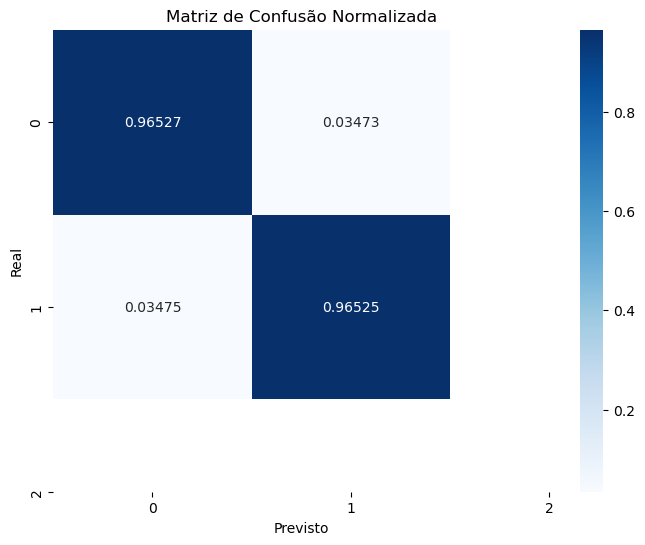

___________________________________COMBINADO________________________________________________
Média de acuracia: 0.959793
Média de precisao: 0.563689
Média de recall: 0.865798
Média de f1: 0.678645
Média de especificidade: 0.964608
Média de auc_roc: 0.977480
Média de matriz_normalizada: 0.500000
Desvio Padrão de acuracia: 0.009010
Desvio Padrão de precisao: 0.067163
Desvio Padrão de recall: 0.042603
Desvio Padrão de f1: 0.041414
Desvio Padrão de especificidade: 0.010968
Desvio Padrão de auc_roc: 0.004666
Desvio Padrão de matriz_normalizada: 0.419287
Média e Desvio Padrão:
Média:
[[0.96460752 0.03539248]
 [0.13420225 0.86579775]]
Desvio Padrão:
[[0.01096771 0.01096771]
 [0.04260268 0.04260268]]



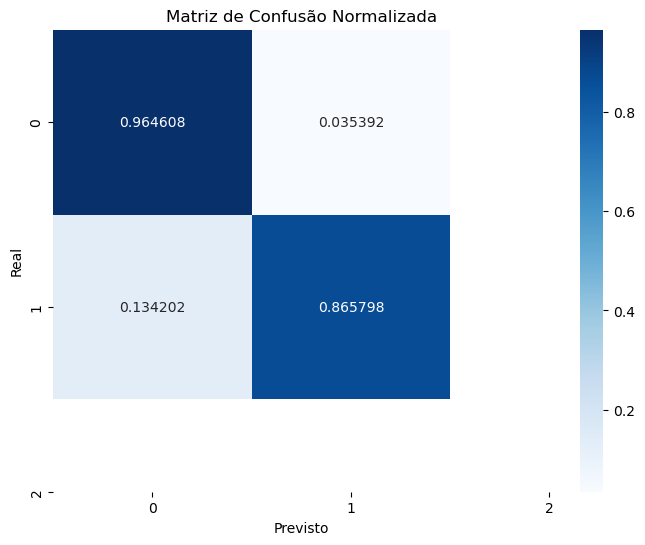

In [96]:
"""
This code calculates the mean and standard deviation for various evaluation metrics 
(accuracy, precision, recall, F1-score, specificity, area under the ROC curve) across multiple repetitions of training 
and testing neural network models. It also computes the mean and standard deviation for the normalized confusion matrices 
generated during the evaluation process for each preprocessing method (UMA, UP, WEDA) and for the combined approach. 
Finally, it visualizes the mean normalized confusion matrices using heatmaps.
"""




# Calcular a média e o desvio padrão de cada métrica
medias_metricas = {metrica: np.mean(valores) for metrica, valores in metricas_repeticoes_UP.items()}
desvios_padrao_metricas = {metrica: np.std(valores) for metrica, valores in metricas_repeticoes_UP.items()}
print("_____________________________________UP________________________________________________")
# Imprimir as médias e desvios padrão
for metrica, media in medias_metricas.items():
    print(f"Média de {metrica}: {media:.8f}")

for metrica, desvio_padrao in desvios_padrao_metricas.items():
    print(f"Desvio Padrão de {metrica}: {desvio_padrao:.8f}")
# Imprime as médias e desvios padrão
# Calcula a média e o desvio padrão para cada lista de matrizes de confusão normalizadas
media_UP = np.mean(matrizes_confusao_UP_norm, axis=0)
desvio_padrao_UP = np.std(matrizes_confusao_UP_norm, axis=0)

print("Média e Desvio Padrão para UP:")
print("Média:")
print(media_UP)
print("Desvio Padrão:")
print(desvio_padrao_UP)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media_UP, annot=True, cmap="Blues", fmt=".5f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

    
# Calcular a média e o desvio padrão de cada métrica
medias_metricas = {metrica: np.mean(valores) for metrica, valores in metricas_repeticoes_UMA.items()}
desvios_padrao_metricas = {metrica: np.std(valores) for metrica, valores in metricas_repeticoes_UMA.items()}
print("___________________________________UMA________________________________________________")
# Imprimir as médias e desvios padrão
for metrica, media in medias_metricas.items():
    print(f"Média de {metrica}: {media:.8f}")

for metrica, desvio_padrao in desvios_padrao_metricas.items():
    print(f"Desvio Padrão de {metrica}: {desvio_padrao:.8f}")
    
# Imprime as médias e desvios padrão
# Calcula a média e o desvio padrão para cada lista de matrizes de confusão normalizadas
media_UMA = np.mean(matrizes_confusao_UMA_norm, axis=0)
desvio_padrao_UMA = np.std(matrizes_confusao_UMA_norm, axis=0)

print("Média e Desvio Padrão para UMA:")
print("Média:")
print(media_UMA)
print("Desvio Padrão:")
print(desvio_padrao_UMA)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media_UMA, annot=True, cmap="Blues", fmt=".5f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

    
# Calcular a média e o desvio padrão de cada métrica
medias_metricas = {metrica: np.mean(valores) for metrica, valores in metricas_repeticoes_WEDA.items()}
desvios_padrao_metricas = {metrica: np.std(valores) for metrica, valores in metricas_repeticoes_WEDA.items()}
print("_____________________________________WEDA________________________________________________")
# Imprimir as médias e desvios padrão
for metrica, media in medias_metricas.items():
    print(f"Média de {metrica}: {media:.8f}")

for metrica, desvio_padrao in desvios_padrao_metricas.items():
    print(f"Desvio Padrão de {metrica}: {desvio_padrao:.8f}")

# Imprime as médias e desvios padrão
# Calcula a média e o desvio padrão para cada lista de matrizes de confusão normalizadas
media_WEDA = np.mean(matrizes_confusao_WEDA_norm, axis=0)
desvio_padrao_WEDA = np.std(matrizes_confusao_WEDA_norm, axis=0)

print("Média e Desvio Padrão para WEDA:")
print("Média:")
print(media_WEDA)
print("Desvio Padrão:")
print(desvio_padrao_WEDA)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media_WEDA, annot=True, cmap="Blues", fmt=".5f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

    
# Calcular a média e o desvio padrão de cada métrica
medias_metricas = {metrica: np.mean(valores) for metrica, valores in metricas_repeticoes.items()}
desvios_padrao_metricas = {metrica: np.std(valores) for metrica, valores in metricas_repeticoes.items()}
print("___________________________________COMBINADO________________________________________________")
# Imprimir as médias e desvios padrão
for metrica, media in medias_metricas.items():
    print(f"Média de {metrica}: {media:.6f}")

for metrica, desvio_padrao in desvios_padrao_metricas.items():
    print(f"Desvio Padrão de {metrica}: {desvio_padrao:.6f}")
    
# Imprime as médias e desvios padrão
# Calcula a média e o desvio padrão para cada lista de matrizes de confusão normalizadas
media = np.mean(matrizes_confusao_norm, axis=0)
desvio_padrao = np.std(matrizes_confusao_norm, axis=0)

print("Média e Desvio Padrão:")
print("Média:")
print(media)
print("Desvio Padrão:")
print(desvio_padrao)
print()
# Cria um mapa de calor para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(media, annot=True, cmap="Blues", fmt=".6f", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()




